In [1]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

#from google.colab import files
import io

train_df = pd.read_csv('data/train_df.csv')
print(train_df.head)

test_df = pd.read_csv('data/test_df.csv')
print(test_df.head)


<bound method NDFrame.head of       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
1          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
2          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
3          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
4          0.277199      -0.010098      -0.105137     -0.997335     -0.990487   
...             ...            ...            ...           ...           ...   
7346       0.299665      -0.057193      -0.181233     -0.195387      0.039905   
7347       0.273853      -0.007749      -0.147468     -0.235309      0.004816   
7348       0.273387      -0.017011      -0.045022     -0.218218     -0.103822   
7349       0.289654      -0.018843      -0.158281     -0.219139     -0.111412   
7350       0.351503      -0.012423      -0.203867     -0.269270     -0.087212  

In [2]:
print(train_df.drop(['activity_name'], axis = 1))

train_df_2 = train_df.drop(['activity_name'], axis = 1)

train_arr = train_df_2.to_numpy()

x_train = train_arr[:, 0:561]
print(x_train.shape)

print(train_arr[:, 562])
y_train = train_arr[:, 562]
print(y_train.shape)

      tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
1          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
2          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
3          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
4          0.277199      -0.010098      -0.105137     -0.997335     -0.990487   
...             ...            ...            ...           ...           ...   
7346       0.299665      -0.057193      -0.181233     -0.195387      0.039905   
7347       0.273853      -0.007749      -0.147468     -0.235309      0.004816   
7348       0.273387      -0.017011      -0.045022     -0.218218     -0.103822   
7349       0.289654      -0.018843      -0.158281     -0.219139     -0.111412   
7350       0.351503      -0.012423      -0.203867     -0.269270     -0.087212   

      tBodyAccstdZ  tBodyAc

In [3]:
#process test data
print(test_df.head)
test_df_2 = test_df.drop(['activity_name'], axis = 1)
print(test_df_2)

test_arr = test_df_2.to_numpy()

x_test = test_arr[:, 0:561]
print(x_test.shape)

print(test_arr[:, 562])
y_test = test_arr[:, 562]
print(y_test.shape)

<bound method NDFrame.head of       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.286027      -0.013163      -0.119083     -0.975415     -0.967458   
1          0.275485      -0.026050      -0.118152     -0.993819     -0.969926   
2          0.270298      -0.032614      -0.117520     -0.994743     -0.973268   
3          0.274833      -0.027848      -0.129527     -0.993852     -0.967445   
4          0.279220      -0.018620      -0.113902     -0.994455     -0.970417   
...             ...            ...            ...           ...           ...   
2941       0.310155      -0.053391      -0.099109     -0.287866     -0.140589   
2942       0.363385      -0.039214      -0.105915     -0.305388      0.028148   
2943       0.349966       0.030077      -0.115788     -0.329638     -0.042143   
2944       0.237594       0.018467      -0.096499     -0.323114     -0.229775   
2945       0.153627      -0.018437      -0.137018     -0.330046     -0.195253  

In [4]:
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

print("Machine learning libraries loaded")

Machine learning libraries loaded


In [5]:
print (x_train.shape)
print (x_test.shape)

(7351, 561)
(2946, 561)


In [6]:
input_shape = x_train.shape[1]
inputs = Input(shape=(input_shape))

#Encoder
encoded = Dense(350, activation='relu')(inputs)
encoded = Dense(150, activation='relu')(encoded)

#Decoder
decoded = Dense(350, activation='relu')(encoded)
decoded = Dense(input_shape)(decoded)

#Model setup, summary and compilation
deep_autoencoder = Model(inputs, decoded)
deep_autoencoder.summary()
deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense (Dense)                (None, 350)               196700    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               52650     
_________________________________________________________________
dense_2 (Dense)              (None, 350)               52850     
_________________________________________________________________
dense_3 (Dense)              (None, 561)               196911    
Total params: 499,111
Trainable params: 499,111
Non-trainable params: 0
_________________________________________________________________


In [7]:
#normalize data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
#x_train -= mean
#x_train /= std
#x_test -= mean
#x_test /= std

In [8]:
batch_size = 256

history = deep_autoencoder.fit(
    x_train,
    x_train,
    epochs=500,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/500
23/23 [==============================] - 0s 14ms/step - loss: 0.1682 - accuracy: 0.0406 - val_loss: 0.0460 - val_accuracy: 0.0979
Epoch 2/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0400 - accuracy: 0.1500 - val_loss: 0.0312 - val_accuracy: 0.1183
Epoch 3/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0329 - accuracy: 0.1179 - val_loss: 0.0276 - val_accuracy: 0.1666
Epoch 4/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0282 - accuracy: 0.1355 - val_loss: 0.0239 - val_accuracy: 0.1210
Epoch 5/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.1230 - val_loss: 0.0218 - val_accuracy: 0.1298
Epoch 6/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0221 - accuracy: 0.1439 - val_loss: 0.0203 - val_accuracy: 0.1693
Epoch 7/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0205 - accuracy: 0.1755 - val_loss: 0.0189 - val_accuracy: 0.1720
Epoch 8/500


Epoch 59/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 0.3158 - val_loss: 0.0060 - val_accuracy: 0.3222
Epoch 60/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.3114 - val_loss: 0.0059 - val_accuracy: 0.3052
Epoch 61/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.2986 - val_loss: 0.0060 - val_accuracy: 0.2481
Epoch 62/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.3102 - val_loss: 0.0058 - val_accuracy: 0.3304
Epoch 63/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.3134 - val_loss: 0.0057 - val_accuracy: 0.3324
Epoch 64/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3100 - val_loss: 0.0062 - val_accuracy: 0.2706
Epoch 65/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3068 - val_loss: 0.0057 - val_accuracy: 0.3433
Epoch 

23/23 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 0.3429 - val_loss: 0.0046 - val_accuracy: 0.3555
Epoch 117/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3439 - val_loss: 0.0046 - val_accuracy: 0.2787
Epoch 118/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3415 - val_loss: 0.0046 - val_accuracy: 0.3290
Epoch 119/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 0.3437 - val_loss: 0.0047 - val_accuracy: 0.3562
Epoch 120/500
23/23 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.33 - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3367 - val_loss: 0.0046 - val_accuracy: 0.3297
Epoch 121/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.3480 - val_loss: 0.0045 - val_accuracy: 0.2155
Epoch 122/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.3485 - val_loss: 0

23/23 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3616 - val_loss: 0.0041 - val_accuracy: 0.4133
Epoch 174/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3694 - val_loss: 0.0040 - val_accuracy: 0.3780
Epoch 175/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3590 - val_loss: 0.0041 - val_accuracy: 0.4215
Epoch 176/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3656 - val_loss: 0.0041 - val_accuracy: 0.3209
Epoch 177/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3602 - val_loss: 0.0044 - val_accuracy: 0.3467
Epoch 178/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.3629 - val_loss: 0.0041 - val_accuracy: 0.3215
Epoch 179/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.3779 - val_loss: 0.0040 - val_accuracy: 0.3474
Epoch 180/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.3747 - val_loss: 0.0039 - val_accuracy: 0.4120
Epoch 231/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.3590 - val_loss: 0.0045 - val_accuracy: 0.3202
Epoch 232/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.3536 - val_loss: 0.0038 - val_accuracy: 0.4092
Epoch 233/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3731 - val_loss: 0.0038 - val_accuracy: 0.4147
Epoch 234/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3923 - val_loss: 0.0038 - val_accuracy: 0.4004
Epoch 235/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.3634 - val_loss: 0.0040 - val_accuracy: 0.4942
Epoch 236/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.3752 - val_loss: 0.0038 - val_accuracy: 0.3630
Epoch 237/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3679 - val_loss: 0.0037 - val_accuracy: 0.3732
Epoch 288/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3825 - val_loss: 0.0037 - val_accuracy: 0.3256
Epoch 289/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3750 - val_loss: 0.0036 - val_accuracy: 0.3073
Epoch 290/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3696 - val_loss: 0.0036 - val_accuracy: 0.3678
Epoch 291/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3946 - val_loss: 0.0036 - val_accuracy: 0.3780
Epoch 292/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3845 - val_loss: 0.0036 - val_accuracy: 0.3596
Epoch 293/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3849 - val_loss: 0.0040 - val_accuracy: 0.3583
Epoch 294/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3801 - val_loss: 0.0035 - val_accuracy: 0.3889
Epoch 345/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3952 - val_loss: 0.0035 - val_accuracy: 0.3555
Epoch 346/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.3993 - val_loss: 0.0035 - val_accuracy: 0.3746
Epoch 347/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3906 - val_loss: 0.0036 - val_accuracy: 0.4657
Epoch 348/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3981 - val_loss: 0.0035 - val_accuracy: 0.3515
Epoch 349/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4014 - val_loss: 0.0034 - val_accuracy: 0.4079
Epoch 350/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3810 - val_loss: 0.0037 - val_accuracy: 0.3576
Epoch 351/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.3869 - val_loss: 0.0034 - val_accuracy: 0.4140
Epoch 402/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.4009 - val_loss: 0.0034 - val_accuracy: 0.2910
Epoch 403/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.3855 - val_loss: 0.0034 - val_accuracy: 0.3617
Epoch 404/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.4063 - val_loss: 0.0034 - val_accuracy: 0.3664
Epoch 405/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.3908 - val_loss: 0.0035 - val_accuracy: 0.3521
Epoch 406/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3787 - val_loss: 0.0034 - val_accuracy: 0.4283
Epoch 407/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4027 - val_loss: 0.0034 - val_accuracy: 0.4126
Epoch 408/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.3961 - val_loss: 0.0033 - val_accuracy: 0.3358
Epoch 459/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 0.4116 - val_loss: 0.0033 - val_accuracy: 0.3753
Epoch 460/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.4116 - val_loss: 0.0034 - val_accuracy: 0.3596
Epoch 461/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4049 - val_loss: 0.0033 - val_accuracy: 0.4018
Epoch 462/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 0.4112 - val_loss: 0.0033 - val_accuracy: 0.3909
Epoch 463/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 0.4172 - val_loss: 0.0033 - val_accuracy: 0.3691
Epoch 464/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.4022 - val_loss: 0.0034 - val_accuracy: 0.4228
Epoch 465/500

In [9]:
# use our encoded layer to encode the training input
def encodeX(X):
  encoder = Model(inputs, encoded)
  encoded_X = encoder(X).numpy()
  return encoded_X

encoded_X_train = encodeX(x_train)
encoded_X_test = encodeX(x_test)

print(encoded_X_train)
print(encoded_X_test)

[[0.         1.0471582  0.         ... 0.29729593 0.         0.59557176]
 [0.         0.44221714 0.         ... 0.37320003 0.         0.6874595 ]
 [0.         0.4558524  0.         ... 0.1792047  0.         0.64237136]
 ...
 [0.         0.7040098  0.48781753 ... 1.4913694  0.         1.6872096 ]
 [0.         0.93514705 0.24052875 ... 1.5075976  0.         1.3306786 ]
 [0.         0.6367688  0.28412002 ... 1.2848109  0.         1.6786509 ]]
[[0.         0.26106447 0.         ... 0.28433043 0.         0.8063319 ]
 [0.         0.8331767  0.         ... 0.17063156 0.         0.7432002 ]
 [0.         0.6076818  0.         ... 0.13405126 0.         0.66649985]
 ...
 [0.         0.31334412 0.39470822 ... 0.4879224  0.         1.9690785 ]
 [0.         0.74152887 0.11855571 ... 0.7226803  0.         1.616735  ]
 [0.         0.63939536 0.3033995  ... 0.8028471  0.         1.6533031 ]]


In [10]:
#Use the transformed data to make predictions 
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(C=10, gamma= 0.01)
#train model
svc.fit(encoded_X_train, y_train)
#test
y_pred = svc.predict(encoded_X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9131025118805159
[[474   7  15   0   0   0]
 [ 27 419  17   0   7   0]
 [ 13  39 366   0   2   0]
 [  0   2   0 425  53  11]
 [  0   4   0  39 489   0]
 [ 18   1   0   1   0 517]]
              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92       496
         2.0       0.89      0.89      0.89       470
         3.0       0.92      0.87      0.89       420
         4.0       0.91      0.87      0.89       491
         5.0       0.89      0.92      0.90       532
         6.0       0.98      0.96      0.97       537

    accuracy                           0.91      2946
   macro avg       0.91      0.91      0.91      2946
weighted avg       0.91      0.91      0.91      2946



# Look at the number of outcome nodes on classification accuracy

In [11]:
component_list = [2, 3, 4]
mid_node_list = [150, 150, 150]
for i in range(5, 100, 5):
    component_list.append(i)
    mid_node_list.append(150)
    
for i in range(100, 550, 50):
    component_list.append(i)
    mid_node_list.append(i+50)
    
for j in range(len(component_list)):
  print(str(component_list[j]) + " " + str(mid_node_list[j]))


2 150
3 150
4 150
5 150
10 150
15 150
20 150
25 150
30 150
35 150
40 150
45 150
50 150
55 150
60 150
65 150
70 150
75 150
80 150
85 150
90 150
95 150
100 150
150 200
200 250
250 300
300 350
350 400
400 450
450 500
500 550


In [12]:
#setting up models
from sklearn.metrics import explained_variance_score

def predict_y(x_train, x_test, y_train, y_test):
    #Use the transformed data to make predictions 
    from sklearn.svm import SVC
    from sklearn import metrics

    svc = SVC(C=10, gamma= 0.01)
    #train model
    svc.fit(x_train, y_train)
    #test
    y_pred = svc.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    #var = metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average')
    print(acc)
    #print(metrics.confusion_matrix(y_test, y_pred))
    #print(metrics.classification_report(y_test, y_pred))

    return acc

component_acc = []
component_var = []

for c in range(len(component_list)):
    input_shape = x_train.shape[1]
    inputs = Input(shape=(input_shape))

    #Encoder
    encoded = Dense(mid_node_list[c], activation='relu')(inputs)
    encoded = Dense(component_list[c], activation='relu')(encoded)

    #Decoder
    decoded = Dense(mid_node_list[c], activation='relu')(encoded)
    decoded = Dense(input_shape)(decoded)

    #Model setup, summary and compilation
    deep_autoencoder = Model(inputs, decoded)
    deep_autoencoder.summary()
    deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), 
                             loss=tf.keras.losses.MeanSquaredError(), 
                             metrics=['accuracy'])

    #training the models

    batch_size = 512

    history = deep_autoencoder.fit(
        x_train,
        x_train,
        epochs=500,
        batch_size=batch_size,
        validation_split=0.2
    )

    #Encode X data
    encoder = Model(inputs, encoded)
    encoded_X_train = encoder(x_train).numpy()
    encoded_X_test = encoder(x_test).numpy()
    
    #variation looks at how the encoding/decoding affects
    y_var = deep_autoencoder.predict(x_test)
    variation = metrics.explained_variance_score(x_test, y_var, multioutput='uniform_average')
    
    accuracy = predict_y(encoded_X_train, encoded_X_test, y_train, y_test)
    component_acc.append(accuracy)
    component_var.append(variation)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               84300     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 302       
_________________________________________________________________
dense_6 (Dense)              (None, 150)               450       
_________________________________________________________________
dense_7 (Dense)              (None, 561)               84711     
Total params: 169,763
Trainable params: 169,763
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
12/12 [==============================] - 0s 17ms/step - loss: 0.4568 - accuracy: 1.7007e-04 - val_loss

12/12 [==============================] - 0s 8ms/step - loss: 0.0351 - accuracy: 0.2097 - val_loss: 0.0312 - val_accuracy: 0.1360
Epoch 52/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0351 - accuracy: 0.1714 - val_loss: 0.0311 - val_accuracy: 0.1455
Epoch 53/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0351 - accuracy: 0.1845 - val_loss: 0.0311 - val_accuracy: 0.3494
Epoch 54/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0351 - accuracy: 0.1832 - val_loss: 0.0311 - val_accuracy: 0.2638
Epoch 55/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0350 - accuracy: 0.2117 - val_loss: 0.0310 - val_accuracy: 0.1264
Epoch 56/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0350 - accuracy: 0.1704 - val_loss: 0.0310 - val_accuracy: 0.3460
Epoch 57/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.2139 - val_loss: 0.0309 - val_accuracy: 0.1108
Epoch 58/500
12/12 

Epoch 109/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0334 - accuracy: 0.1986 - val_loss: 0.0296 - val_accuracy: 0.3474
Epoch 110/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0334 - accuracy: 0.2092 - val_loss: 0.0294 - val_accuracy: 0.1108
Epoch 111/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.2645 - val_loss: 0.0293 - val_accuracy: 0.3569
Epoch 112/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.1672 - val_loss: 0.0293 - val_accuracy: 0.3596
Epoch 113/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.2388 - val_loss: 0.0293 - val_accuracy: 0.1244
Epoch 114/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.2357 - val_loss: 0.0293 - val_accuracy: 0.3637
Epoch 115/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.1913 - val_loss: 0.0293 - val_accuracy: 0.3515

12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2929 - val_loss: 0.0289 - val_accuracy: 0.1196
Epoch 167/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2247 - val_loss: 0.0289 - val_accuracy: 0.3426
Epoch 168/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2808 - val_loss: 0.0290 - val_accuracy: 0.3467
Epoch 169/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2760 - val_loss: 0.0289 - val_accuracy: 0.4113
Epoch 170/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0328 - accuracy: 0.2682 - val_loss: 0.0289 - val_accuracy: 0.2937
Epoch 171/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0328 - accuracy: 0.2959 - val_loss: 0.0290 - val_accuracy: 0.2529
Epoch 172/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2544 - val_loss: 0.0289 - val_accuracy: 0.3222
Epoch 173/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.3311 - val_loss: 0.0288 - val_accuracy: 0.3379
Epoch 224/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.3066 - val_loss: 0.0290 - val_accuracy: 0.2733
Epoch 225/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.3034 - val_loss: 0.0288 - val_accuracy: 0.4473
Epoch 226/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.2844 - val_loss: 0.0288 - val_accuracy: 0.2862
Epoch 227/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.2888 - val_loss: 0.0288 - val_accuracy: 0.5003
Epoch 228/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.2867 - val_loss: 0.0288 - val_accuracy: 0.4575
Epoch 229/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.3036 - val_loss: 0.0289 - val_accuracy: 0.4058
Epoch 230/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.2988 - val_loss: 0.0287 - val_accuracy: 0.3691
Epoch 281/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.3019 - val_loss: 0.0287 - val_accuracy: 0.3141
Epoch 282/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0325 - accuracy: 0.2850 - val_loss: 0.0287 - val_accuracy: 0.4378
Epoch 283/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.2893 - val_loss: 0.0286 - val_accuracy: 0.4426
Epoch 284/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.3036 - val_loss: 0.0287 - val_accuracy: 0.3283
Epoch 285/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.3027 - val_loss: 0.0287 - val_accuracy: 0.3141
Epoch 286/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.2939 - val_loss: 0.0287 - val_accuracy: 0.4657
Epoch 287/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.3088 - val_loss: 0.0284 - val_accuracy: 0.3202
Epoch 338/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.2940 - val_loss: 0.0284 - val_accuracy: 0.3501
Epoch 339/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.3148 - val_loss: 0.0285 - val_accuracy: 0.2937
Epoch 340/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.2988 - val_loss: 0.0284 - val_accuracy: 0.3148
Epoch 341/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.2951 - val_loss: 0.0285 - val_accuracy: 0.4514
Epoch 342/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.3189 - val_loss: 0.0284 - val_accuracy: 0.4983
Epoch 343/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.2854 - val_loss: 0.0286 - val_accuracy: 0.2801
Epoch 344/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0313 - accuracy: 0.3514 - val_loss: 0.0276 - val_accuracy: 0.4473
Epoch 395/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0311 - accuracy: 0.3131 - val_loss: 0.0275 - val_accuracy: 0.3453
Epoch 396/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0310 - accuracy: 0.3218 - val_loss: 0.0276 - val_accuracy: 0.3358
Epoch 397/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0310 - accuracy: 0.3173 - val_loss: 0.0275 - val_accuracy: 0.4908
Epoch 398/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0310 - accuracy: 0.3065 - val_loss: 0.0275 - val_accuracy: 0.3868
Epoch 399/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0309 - accuracy: 0.3371 - val_loss: 0.0276 - val_accuracy: 0.3712
Epoch 400/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0308 - accuracy: 0.3277 - val_loss: 0.0275 - val_accuracy: 0.4235
Epoch 401/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0298 - accuracy: 0.3175 - val_loss: 0.0273 - val_accuracy: 0.4609
Epoch 452/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0298 - accuracy: 0.3243 - val_loss: 0.0272 - val_accuracy: 0.4602
Epoch 453/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0298 - accuracy: 0.3073 - val_loss: 0.0274 - val_accuracy: 0.3990
Epoch 454/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0298 - accuracy: 0.3165 - val_loss: 0.0273 - val_accuracy: 0.3331
Epoch 455/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0298 - accuracy: 0.3231 - val_loss: 0.0271 - val_accuracy: 0.3855
Epoch 456/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0297 - accuracy: 0.3264 - val_loss: 0.0271 - val_accuracy: 0.3392
Epoch 457/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0298 - accuracy: 0.3053 - val_loss: 0.0276 - val_accuracy: 0.3358
Epoch 458/500

12/12 [==============================] - 0s 17ms/step - loss: 0.4560 - accuracy: 0.0000e+00 - val_loss: 0.2463 - val_accuracy: 0.0911
Epoch 2/500
12/12 [==============================] - 0s 8ms/step - loss: 0.1465 - accuracy: 0.1097 - val_loss: 0.0845 - val_accuracy: 0.2481
Epoch 3/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0840 - accuracy: 0.1656 - val_loss: 0.0716 - val_accuracy: 0.2481
Epoch 4/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0765 - accuracy: 0.1051 - val_loss: 0.0681 - val_accuracy: 0.0911
Epoch 5/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0740 - accuracy: 0.1400 - val_loss: 0.0650 - val_accuracy: 0.2413
Epoch 6/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0661 - accuracy: 0.1762 - val_loss: 0.0495 - val_accuracy: 0.3249
Epoch 7/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0457 - accuracy: 0.2088 - val_loss: 0.0348 - val_accuracy: 0.3535
Epoch 8/500
12/12 [=

Epoch 59/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0307 - accuracy: 0.2986 - val_loss: 0.0270 - val_accuracy: 0.1509
Epoch 60/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0307 - accuracy: 0.2672 - val_loss: 0.0271 - val_accuracy: 0.3229
Epoch 61/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0307 - accuracy: 0.3080 - val_loss: 0.0269 - val_accuracy: 0.2835
Epoch 62/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0306 - accuracy: 0.2862 - val_loss: 0.0269 - val_accuracy: 0.4562
Epoch 63/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0306 - accuracy: 0.2990 - val_loss: 0.0269 - val_accuracy: 0.3712
Epoch 64/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.3111 - val_loss: 0.0268 - val_accuracy: 0.2719
Epoch 65/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.2600 - val_loss: 0.0269 - val_accuracy: 0.3603
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0287 - accuracy: 0.3090 - val_loss: 0.0261 - val_accuracy: 0.2910
Epoch 117/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0288 - accuracy: 0.3032 - val_loss: 0.0262 - val_accuracy: 0.3481
Epoch 118/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0287 - accuracy: 0.3078 - val_loss: 0.0260 - val_accuracy: 0.4303
Epoch 119/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.3177 - val_loss: 0.0259 - val_accuracy: 0.3012
Epoch 120/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0285 - accuracy: 0.3163 - val_loss: 0.0258 - val_accuracy: 0.3413
Epoch 121/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0284 - accuracy: 0.3143 - val_loss: 0.0259 - val_accuracy: 0.3100
Epoch 122/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0284 - accuracy: 0.3316 - val_loss: 0.0261 - val_accuracy: 0.4290
Epoch 123/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.2757 - val_loss: 0.0250 - val_accuracy: 0.4602
Epoch 174/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.3099 - val_loss: 0.0252 - val_accuracy: 0.4752
Epoch 175/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.3325 - val_loss: 0.0252 - val_accuracy: 0.4772
Epoch 176/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.2964 - val_loss: 0.0252 - val_accuracy: 0.2672
Epoch 177/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.2864 - val_loss: 0.0251 - val_accuracy: 0.2787
Epoch 178/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.2990 - val_loss: 0.0255 - val_accuracy: 0.3277
Epoch 179/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.3148 - val_loss: 0.0252 - val_accuracy: 0.2964
Epoch 180/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.2767 - val_loss: 0.0245 - val_accuracy: 0.4045
Epoch 231/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0265 - accuracy: 0.3116 - val_loss: 0.0245 - val_accuracy: 0.2957
Epoch 232/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.2956 - val_loss: 0.0245 - val_accuracy: 0.3120
Epoch 233/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.2855 - val_loss: 0.0245 - val_accuracy: 0.2053
Epoch 234/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.2898 - val_loss: 0.0245 - val_accuracy: 0.3222
Epoch 235/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.2728 - val_loss: 0.0245 - val_accuracy: 0.3324
Epoch 236/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.2650 - val_loss: 0.0245 - val_accuracy: 0.2821
Epoch 237/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.3049 - val_loss: 0.0240 - val_accuracy: 0.3059
Epoch 288/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.2913 - val_loss: 0.0240 - val_accuracy: 0.4133
Epoch 289/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.2702 - val_loss: 0.0241 - val_accuracy: 0.4344
Epoch 290/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.2614 - val_loss: 0.0239 - val_accuracy: 0.3059
Epoch 291/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 0.2968 - val_loss: 0.0240 - val_accuracy: 0.2978
Epoch 292/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 0.2810 - val_loss: 0.0241 - val_accuracy: 0.2685
Epoch 293/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 0.2600 - val_loss: 0.0240 - val_accuracy: 0.3270
Epoch 294/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.2889 - val_loss: 0.0237 - val_accuracy: 0.3508
Epoch 345/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.2942 - val_loss: 0.0237 - val_accuracy: 0.3433
Epoch 346/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.3126 - val_loss: 0.0237 - val_accuracy: 0.3508
Epoch 347/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.2842 - val_loss: 0.0237 - val_accuracy: 0.2767
Epoch 348/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.2740 - val_loss: 0.0237 - val_accuracy: 0.3515
Epoch 349/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.2821 - val_loss: 0.0237 - val_accuracy: 0.3583
Epoch 350/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.2811 - val_loss: 0.0236 - val_accuracy: 0.3107
Epoch 351/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0247 - accuracy: 0.2638 - val_loss: 0.0236 - val_accuracy: 0.2903
Epoch 402/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0248 - accuracy: 0.2784 - val_loss: 0.0235 - val_accuracy: 0.3304
Epoch 403/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0248 - accuracy: 0.2959 - val_loss: 0.0236 - val_accuracy: 0.4058
Epoch 404/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0248 - accuracy: 0.2764 - val_loss: 0.0235 - val_accuracy: 0.3120
Epoch 405/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0247 - accuracy: 0.2806 - val_loss: 0.0235 - val_accuracy: 0.3392
Epoch 406/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0247 - accuracy: 0.2656 - val_loss: 0.0235 - val_accuracy: 0.4011
Epoch 407/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0247 - accuracy: 0.2973 - val_loss: 0.0235 - val_accuracy: 0.3936
Epoch 408/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0246 - accuracy: 0.3024 - val_loss: 0.0234 - val_accuracy: 0.4697
Epoch 459/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.3141 - val_loss: 0.0234 - val_accuracy: 0.3161
Epoch 460/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.2985 - val_loss: 0.0234 - val_accuracy: 0.2590
Epoch 461/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.2571 - val_loss: 0.0235 - val_accuracy: 0.3120
Epoch 462/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.2993 - val_loss: 0.0234 - val_accuracy: 0.3134
Epoch 463/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.3202 - val_loss: 0.0234 - val_accuracy: 0.3195
Epoch 464/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.3107 - val_loss: 0.0234 - val_accuracy: 0.3528
Epoch 465/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0725 - accuracy: 0.1656 - val_loss: 0.0654 - val_accuracy: 0.2481
Epoch 9/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0717 - accuracy: 0.1658 - val_loss: 0.0647 - val_accuracy: 0.2481
Epoch 10/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0709 - accuracy: 0.1660 - val_loss: 0.0639 - val_accuracy: 0.2481
Epoch 11/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0698 - accuracy: 0.1668 - val_loss: 0.0630 - val_accuracy: 0.2481
Epoch 12/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0684 - accuracy: 0.1704 - val_loss: 0.0613 - val_accuracy: 0.2508
Epoch 13/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0659 - accuracy: 0.1774 - val_loss: 0.0587 - val_accuracy: 0.2529
Epoch 14/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0628 - accuracy: 0.1861 - val_loss: 0.0561 - val_accuracy: 0.2597
Epoch 15/500
12/12 [

Epoch 66/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0292 - accuracy: 0.2607 - val_loss: 0.0271 - val_accuracy: 0.2828
Epoch 67/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0291 - accuracy: 0.2769 - val_loss: 0.0270 - val_accuracy: 0.2903
Epoch 68/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0290 - accuracy: 0.2537 - val_loss: 0.0269 - val_accuracy: 0.2801
Epoch 69/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0289 - accuracy: 0.2434 - val_loss: 0.0266 - val_accuracy: 0.2923
Epoch 70/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0287 - accuracy: 0.2723 - val_loss: 0.0266 - val_accuracy: 0.2971
Epoch 71/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.2588 - val_loss: 0.0265 - val_accuracy: 0.3107
Epoch 72/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.2726 - val_loss: 0.0263 - val_accuracy: 0.2971
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0236 - accuracy: 0.2473 - val_loss: 0.0226 - val_accuracy: 0.2407
Epoch 124/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0236 - accuracy: 0.2446 - val_loss: 0.0225 - val_accuracy: 0.2644
Epoch 125/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0235 - accuracy: 0.2563 - val_loss: 0.0225 - val_accuracy: 0.2672
Epoch 126/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0235 - accuracy: 0.2565 - val_loss: 0.0225 - val_accuracy: 0.2366
Epoch 127/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0235 - accuracy: 0.2427 - val_loss: 0.0225 - val_accuracy: 0.2155
Epoch 128/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0234 - accuracy: 0.2502 - val_loss: 0.0225 - val_accuracy: 0.2502
Epoch 129/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0234 - accuracy: 0.2294 - val_loss: 0.0225 - val_accuracy: 0.2842
Epoch 130/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0223 - accuracy: 0.2847 - val_loss: 0.0221 - val_accuracy: 0.2379
Epoch 181/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.2616 - val_loss: 0.0222 - val_accuracy: 0.2196
Epoch 182/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.2696 - val_loss: 0.0222 - val_accuracy: 0.2746
Epoch 183/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0223 - accuracy: 0.2719 - val_loss: 0.0221 - val_accuracy: 0.2318
Epoch 184/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0223 - accuracy: 0.2554 - val_loss: 0.0221 - val_accuracy: 0.2821
Epoch 185/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.2634 - val_loss: 0.0221 - val_accuracy: 0.2814
Epoch 186/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0222 - accuracy: 0.2611 - val_loss: 0.0222 - val_accuracy: 0.3012
Epoch 187/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0217 - accuracy: 0.2711 - val_loss: 0.0220 - val_accuracy: 0.3046
Epoch 238/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.2900 - val_loss: 0.0221 - val_accuracy: 0.2923
Epoch 239/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.2874 - val_loss: 0.0220 - val_accuracy: 0.2631
Epoch 240/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.2804 - val_loss: 0.0221 - val_accuracy: 0.2930
Epoch 241/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.2634 - val_loss: 0.0220 - val_accuracy: 0.2821
Epoch 242/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0217 - accuracy: 0.2820 - val_loss: 0.0220 - val_accuracy: 0.2502
Epoch 243/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.2891 - val_loss: 0.0220 - val_accuracy: 0.3909
Epoch 244/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.2866 - val_loss: 0.0219 - val_accuracy: 0.2923
Epoch 295/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.2903 - val_loss: 0.0219 - val_accuracy: 0.3134
Epoch 296/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.2869 - val_loss: 0.0220 - val_accuracy: 0.2522
Epoch 297/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.2906 - val_loss: 0.0220 - val_accuracy: 0.2916
Epoch 298/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.2842 - val_loss: 0.0219 - val_accuracy: 0.4398
Epoch 299/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.3099 - val_loss: 0.0221 - val_accuracy: 0.3127
Epoch 300/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.2912 - val_loss: 0.0220 - val_accuracy: 0.2441
Epoch 301/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0203 - accuracy: 0.2770 - val_loss: 0.0213 - val_accuracy: 0.3073
Epoch 352/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0203 - accuracy: 0.2779 - val_loss: 0.0211 - val_accuracy: 0.3304
Epoch 353/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0203 - accuracy: 0.2736 - val_loss: 0.0211 - val_accuracy: 0.3086
Epoch 354/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2832 - val_loss: 0.0210 - val_accuracy: 0.3895
Epoch 355/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2750 - val_loss: 0.0211 - val_accuracy: 0.3202
Epoch 356/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2791 - val_loss: 0.0210 - val_accuracy: 0.3583
Epoch 357/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.2906 - val_loss: 0.0211 - val_accuracy: 0.2175
Epoch 358/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.2760 - val_loss: 0.0206 - val_accuracy: 0.3297
Epoch 409/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.2949 - val_loss: 0.0205 - val_accuracy: 0.2944
Epoch 410/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.2745 - val_loss: 0.0207 - val_accuracy: 0.2910
Epoch 411/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.2767 - val_loss: 0.0206 - val_accuracy: 0.3161
Epoch 412/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.2838 - val_loss: 0.0205 - val_accuracy: 0.2203
Epoch 413/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.2949 - val_loss: 0.0206 - val_accuracy: 0.2842
Epoch 414/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.2781 - val_loss: 0.0206 - val_accuracy: 0.3549
Epoch 415/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.2699 - val_loss: 0.0204 - val_accuracy: 0.2529
Epoch 466/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.2878 - val_loss: 0.0205 - val_accuracy: 0.2842
Epoch 467/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.2731 - val_loss: 0.0204 - val_accuracy: 0.2957
Epoch 468/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.3049 - val_loss: 0.0204 - val_accuracy: 0.3093
Epoch 469/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.2821 - val_loss: 0.0204 - val_accuracy: 0.3943
Epoch 470/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.2903 - val_loss: 0.0205 - val_accuracy: 0.2393
Epoch 471/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.2804 - val_loss: 0.0205 - val_accuracy: 0.2896
Epoch 472/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0653 - accuracy: 0.1668 - val_loss: 0.0582 - val_accuracy: 0.2481
Epoch 16/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0593 - accuracy: 0.1694 - val_loss: 0.0445 - val_accuracy: 0.1400
Epoch 17/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0430 - accuracy: 0.1007 - val_loss: 0.0342 - val_accuracy: 0.1339
Epoch 18/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0375 - accuracy: 0.1145 - val_loss: 0.0320 - val_accuracy: 0.2005
Epoch 19/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 0.2134 - val_loss: 0.0313 - val_accuracy: 0.2345
Epoch 20/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0352 - accuracy: 0.1946 - val_loss: 0.0307 - val_accuracy: 0.3100
Epoch 21/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0347 - accuracy: 0.1815 - val_loss: 0.0303 - val_accuracy: 0.2359
Epoch 22/500
12/12 

Epoch 73/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.2371 - val_loss: 0.0235 - val_accuracy: 0.2828
Epoch 74/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0251 - accuracy: 0.2333 - val_loss: 0.0235 - val_accuracy: 0.2101
Epoch 75/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.2405 - val_loss: 0.0234 - val_accuracy: 0.2447
Epoch 76/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.2422 - val_loss: 0.0235 - val_accuracy: 0.2189
Epoch 77/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.2330 - val_loss: 0.0235 - val_accuracy: 0.2801
Epoch 78/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.2435 - val_loss: 0.0238 - val_accuracy: 0.3086
Epoch 79/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.2406 - val_loss: 0.0235 - val_accuracy: 0.2352
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.2337 - val_loss: 0.0230 - val_accuracy: 0.2182
Epoch 131/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.2456 - val_loss: 0.0230 - val_accuracy: 0.3311
Epoch 132/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.2716 - val_loss: 0.0230 - val_accuracy: 0.3970
Epoch 133/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.2949 - val_loss: 0.0230 - val_accuracy: 0.2305
Epoch 134/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.2571 - val_loss: 0.0230 - val_accuracy: 0.2366
Epoch 135/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.2714 - val_loss: 0.0229 - val_accuracy: 0.2998
Epoch 136/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.2670 - val_loss: 0.0230 - val_accuracy: 0.2923
Epoch 137/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.2770 - val_loss: 0.0227 - val_accuracy: 0.3018
Epoch 188/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.2849 - val_loss: 0.0226 - val_accuracy: 0.2359
Epoch 189/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.2656 - val_loss: 0.0226 - val_accuracy: 0.2141
Epoch 190/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.2781 - val_loss: 0.0226 - val_accuracy: 0.3317
Epoch 191/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.2810 - val_loss: 0.0226 - val_accuracy: 0.3202
Epoch 192/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.2592 - val_loss: 0.0225 - val_accuracy: 0.2515
Epoch 193/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.2810 - val_loss: 0.0226 - val_accuracy: 0.2862
Epoch 194/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0219 - accuracy: 0.2862 - val_loss: 0.0224 - val_accuracy: 0.3168
Epoch 245/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0219 - accuracy: 0.2961 - val_loss: 0.0224 - val_accuracy: 0.2441
Epoch 246/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0219 - accuracy: 0.2818 - val_loss: 0.0225 - val_accuracy: 0.2243
Epoch 247/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0219 - accuracy: 0.2741 - val_loss: 0.0224 - val_accuracy: 0.3984
Epoch 248/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 0.2798 - val_loss: 0.0226 - val_accuracy: 0.2767
Epoch 249/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 0.2614 - val_loss: 0.0225 - val_accuracy: 0.3202
Epoch 250/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 0.2879 - val_loss: 0.0224 - val_accuracy: 0.2604
Epoch 251/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.2745 - val_loss: 0.0222 - val_accuracy: 0.2461
Epoch 302/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.2833 - val_loss: 0.0222 - val_accuracy: 0.2971
Epoch 303/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.2849 - val_loss: 0.0222 - val_accuracy: 0.2454
Epoch 304/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.2417 - val_loss: 0.0222 - val_accuracy: 0.2107
Epoch 305/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.2605 - val_loss: 0.0221 - val_accuracy: 0.2570
Epoch 306/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.2782 - val_loss: 0.0221 - val_accuracy: 0.2339
Epoch 307/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.2553 - val_loss: 0.0223 - val_accuracy: 0.2495
Epoch 308/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.2823 - val_loss: 0.0219 - val_accuracy: 0.2678
Epoch 359/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.2646 - val_loss: 0.0218 - val_accuracy: 0.4004
Epoch 360/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.2799 - val_loss: 0.0219 - val_accuracy: 0.2950
Epoch 361/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.2571 - val_loss: 0.0219 - val_accuracy: 0.2339
Epoch 362/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.2587 - val_loss: 0.0218 - val_accuracy: 0.2685
Epoch 363/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.2849 - val_loss: 0.0218 - val_accuracy: 0.3521
Epoch 364/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.2888 - val_loss: 0.0217 - val_accuracy: 0.2101
Epoch 365/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0205 - accuracy: 0.3027 - val_loss: 0.0216 - val_accuracy: 0.2386
Epoch 416/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0204 - accuracy: 0.2573 - val_loss: 0.0217 - val_accuracy: 0.3426
Epoch 417/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0204 - accuracy: 0.2825 - val_loss: 0.0217 - val_accuracy: 0.2787
Epoch 418/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0204 - accuracy: 0.2759 - val_loss: 0.0217 - val_accuracy: 0.3202
Epoch 419/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0204 - accuracy: 0.2954 - val_loss: 0.0217 - val_accuracy: 0.2828
Epoch 420/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0204 - accuracy: 0.2776 - val_loss: 0.0216 - val_accuracy: 0.4086
Epoch 421/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0204 - accuracy: 0.2821 - val_loss: 0.0218 - val_accuracy: 0.3447
Epoch 422/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2886 - val_loss: 0.0216 - val_accuracy: 0.2651
Epoch 473/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2798 - val_loss: 0.0216 - val_accuracy: 0.3970
Epoch 474/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.3049 - val_loss: 0.0216 - val_accuracy: 0.3188
Epoch 475/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2844 - val_loss: 0.0217 - val_accuracy: 0.3277
Epoch 476/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2990 - val_loss: 0.0217 - val_accuracy: 0.2685
Epoch 477/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2969 - val_loss: 0.0216 - val_accuracy: 0.2638
Epoch 478/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.2769 - val_loss: 0.0217 - val_accuracy: 0.4242
Epoch 479/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0225 - accuracy: 0.1942 - val_loss: 0.0211 - val_accuracy: 0.1897
Epoch 23/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0223 - accuracy: 0.1932 - val_loss: 0.0210 - val_accuracy: 0.2475
Epoch 24/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0221 - accuracy: 0.1930 - val_loss: 0.0210 - val_accuracy: 0.3120
Epoch 25/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0219 - accuracy: 0.2041 - val_loss: 0.0208 - val_accuracy: 0.2610
Epoch 26/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 0.2219 - val_loss: 0.0208 - val_accuracy: 0.2910
Epoch 27/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.2190 - val_loss: 0.0206 - val_accuracy: 0.2801
Epoch 28/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.2299 - val_loss: 0.0205 - val_accuracy: 0.2930
Epoch 29/500
12/12 

Epoch 80/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0182 - accuracy: 0.2685 - val_loss: 0.0184 - val_accuracy: 0.3419
Epoch 81/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0182 - accuracy: 0.2752 - val_loss: 0.0184 - val_accuracy: 0.3787
Epoch 82/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.2707 - val_loss: 0.0183 - val_accuracy: 0.3617
Epoch 83/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.2753 - val_loss: 0.0183 - val_accuracy: 0.2835
Epoch 84/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.2546 - val_loss: 0.0184 - val_accuracy: 0.3283
Epoch 85/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.2765 - val_loss: 0.0183 - val_accuracy: 0.3073
Epoch 86/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0180 - accuracy: 0.2662 - val_loss: 0.0183 - val_accuracy: 0.3249
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.2770 - val_loss: 0.0181 - val_accuracy: 0.2971
Epoch 138/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.2789 - val_loss: 0.0181 - val_accuracy: 0.3474
Epoch 139/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.2913 - val_loss: 0.0181 - val_accuracy: 0.2706
Epoch 140/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.2648 - val_loss: 0.0180 - val_accuracy: 0.2379
Epoch 141/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.2750 - val_loss: 0.0180 - val_accuracy: 0.3426
Epoch 142/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.2733 - val_loss: 0.0181 - val_accuracy: 0.3154
Epoch 143/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.2668 - val_loss: 0.0181 - val_accuracy: 0.2903
Epoch 144/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.3012 - val_loss: 0.0180 - val_accuracy: 0.3052
Epoch 195/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.2986 - val_loss: 0.0181 - val_accuracy: 0.2746
Epoch 196/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.2898 - val_loss: 0.0181 - val_accuracy: 0.2780
Epoch 197/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0169 - accuracy: 0.2900 - val_loss: 0.0181 - val_accuracy: 0.2774
Epoch 198/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 0.2820 - val_loss: 0.0180 - val_accuracy: 0.3073
Epoch 199/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.2804 - val_loss: 0.0180 - val_accuracy: 0.3243
Epoch 200/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.2997 - val_loss: 0.0181 - val_accuracy: 0.3080
Epoch 201/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.3007 - val_loss: 0.0182 - val_accuracy: 0.3902
Epoch 252/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.3150 - val_loss: 0.0181 - val_accuracy: 0.2536
Epoch 253/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.3071 - val_loss: 0.0181 - val_accuracy: 0.3080
Epoch 254/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.3138 - val_loss: 0.0181 - val_accuracy: 0.2475
Epoch 255/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.3046 - val_loss: 0.0180 - val_accuracy: 0.2515
Epoch 256/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.3007 - val_loss: 0.0180 - val_accuracy: 0.3059
Epoch 257/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.3158 - val_loss: 0.0181 - val_accuracy: 0.3603
Epoch 258/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0163 - accuracy: 0.3068 - val_loss: 0.0181 - val_accuracy: 0.2604
Epoch 309/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.2973 - val_loss: 0.0180 - val_accuracy: 0.2128
Epoch 310/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.3088 - val_loss: 0.0181 - val_accuracy: 0.3623
Epoch 311/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0162 - accuracy: 0.3177 - val_loss: 0.0180 - val_accuracy: 0.3093
Epoch 312/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.3165 - val_loss: 0.0181 - val_accuracy: 0.3569
Epoch 313/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0162 - accuracy: 0.3247 - val_loss: 0.0182 - val_accuracy: 0.2923
Epoch 314/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0162 - accuracy: 0.3190 - val_loss: 0.0180 - val_accuracy: 0.3107
Epoch 315/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0160 - accuracy: 0.3260 - val_loss: 0.0181 - val_accuracy: 0.3195
Epoch 366/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.3299 - val_loss: 0.0181 - val_accuracy: 0.3936
Epoch 367/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.3252 - val_loss: 0.0180 - val_accuracy: 0.2794
Epoch 368/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.3262 - val_loss: 0.0182 - val_accuracy: 0.3345
Epoch 369/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.3156 - val_loss: 0.0181 - val_accuracy: 0.3637
Epoch 370/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0160 - accuracy: 0.3192 - val_loss: 0.0180 - val_accuracy: 0.3997
Epoch 371/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0160 - accuracy: 0.3364 - val_loss: 0.0180 - val_accuracy: 0.3651
Epoch 372/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.3349 - val_loss: 0.0181 - val_accuracy: 0.4392
Epoch 423/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.3354 - val_loss: 0.0180 - val_accuracy: 0.3399
Epoch 424/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.3248 - val_loss: 0.0180 - val_accuracy: 0.2678
Epoch 425/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.3141 - val_loss: 0.0181 - val_accuracy: 0.3263
Epoch 426/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.3241 - val_loss: 0.0180 - val_accuracy: 0.3657
Epoch 427/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.3452 - val_loss: 0.0180 - val_accuracy: 0.2563
Epoch 428/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.3250 - val_loss: 0.0180 - val_accuracy: 0.3902
Epoch 429/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.3342 - val_loss: 0.0181 - val_accuracy: 0.3909
Epoch 480/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.3342 - val_loss: 0.0180 - val_accuracy: 0.2794
Epoch 481/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.3388 - val_loss: 0.0180 - val_accuracy: 0.3467
Epoch 482/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.3304 - val_loss: 0.0180 - val_accuracy: 0.3508
Epoch 483/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0155 - accuracy: 0.3233 - val_loss: 0.0180 - val_accuracy: 0.3766
Epoch 484/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.3245 - val_loss: 0.0181 - val_accuracy: 0.2957
Epoch 485/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.3272 - val_loss: 0.0180 - val_accuracy: 0.3623
Epoch 486/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.2597 - val_loss: 0.0204 - val_accuracy: 0.2597
Epoch 30/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0212 - accuracy: 0.2517 - val_loss: 0.0204 - val_accuracy: 0.2740
Epoch 31/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0211 - accuracy: 0.2735 - val_loss: 0.0203 - val_accuracy: 0.2515
Epoch 32/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0210 - accuracy: 0.2600 - val_loss: 0.0202 - val_accuracy: 0.2821
Epoch 33/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 0.2724 - val_loss: 0.0202 - val_accuracy: 0.2230
Epoch 34/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.2685 - val_loss: 0.0200 - val_accuracy: 0.2257
Epoch 35/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0206 - accuracy: 0.2534 - val_loss: 0.0199 - val_accuracy: 0.2536
Epoch 36/500
12/12 

Epoch 87/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0169 - accuracy: 0.2619 - val_loss: 0.0174 - val_accuracy: 0.2801
Epoch 88/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0169 - accuracy: 0.2701 - val_loss: 0.0174 - val_accuracy: 0.2910
Epoch 89/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0169 - accuracy: 0.2762 - val_loss: 0.0174 - val_accuracy: 0.2638
Epoch 90/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0169 - accuracy: 0.2665 - val_loss: 0.0174 - val_accuracy: 0.2332
Epoch 91/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.2832 - val_loss: 0.0173 - val_accuracy: 0.2706
Epoch 92/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0167 - accuracy: 0.2730 - val_loss: 0.0173 - val_accuracy: 0.2529
Epoch 93/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0167 - accuracy: 0.2696 - val_loss: 0.0173 - val_accuracy: 0.2801
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.3031 - val_loss: 0.0170 - val_accuracy: 0.3256
Epoch 145/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.3252 - val_loss: 0.0171 - val_accuracy: 0.2291
Epoch 146/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.3027 - val_loss: 0.0170 - val_accuracy: 0.2508
Epoch 147/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.2986 - val_loss: 0.0169 - val_accuracy: 0.2828
Epoch 148/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.3056 - val_loss: 0.0170 - val_accuracy: 0.2175
Epoch 149/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.3002 - val_loss: 0.0170 - val_accuracy: 0.2814
Epoch 150/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.3088 - val_loss: 0.0170 - val_accuracy: 0.2916
Epoch 151/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0155 - accuracy: 0.3100 - val_loss: 0.0169 - val_accuracy: 0.2087
Epoch 202/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.3043 - val_loss: 0.0169 - val_accuracy: 0.3834
Epoch 203/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.3255 - val_loss: 0.0170 - val_accuracy: 0.1985
Epoch 204/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.2997 - val_loss: 0.0169 - val_accuracy: 0.3127
Epoch 205/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.3000 - val_loss: 0.0169 - val_accuracy: 0.2298
Epoch 206/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.2973 - val_loss: 0.0169 - val_accuracy: 0.2780
Epoch 207/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.3039 - val_loss: 0.0169 - val_accuracy: 0.3012
Epoch 208/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.3116 - val_loss: 0.0169 - val_accuracy: 0.3331
Epoch 259/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.3296 - val_loss: 0.0169 - val_accuracy: 0.2692
Epoch 260/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.3155 - val_loss: 0.0168 - val_accuracy: 0.3270
Epoch 261/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.3240 - val_loss: 0.0168 - val_accuracy: 0.2508
Epoch 262/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.3238 - val_loss: 0.0168 - val_accuracy: 0.2658
Epoch 263/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.3274 - val_loss: 0.0169 - val_accuracy: 0.2352
Epoch 264/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.3102 - val_loss: 0.0168 - val_accuracy: 0.2896
Epoch 265/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.3228 - val_loss: 0.0168 - val_accuracy: 0.2556
Epoch 316/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.3202 - val_loss: 0.0169 - val_accuracy: 0.2950
Epoch 317/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.3145 - val_loss: 0.0169 - val_accuracy: 0.2305
Epoch 318/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.3243 - val_loss: 0.0169 - val_accuracy: 0.3508
Epoch 319/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.3066 - val_loss: 0.0168 - val_accuracy: 0.3012
Epoch 320/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.3202 - val_loss: 0.0168 - val_accuracy: 0.3936
Epoch 321/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.3267 - val_loss: 0.0169 - val_accuracy: 0.2468
Epoch 322/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.3158 - val_loss: 0.0168 - val_accuracy: 0.2821
Epoch 373/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.3044 - val_loss: 0.0168 - val_accuracy: 0.3345
Epoch 374/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.3310 - val_loss: 0.0168 - val_accuracy: 0.3012
Epoch 375/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.3357 - val_loss: 0.0168 - val_accuracy: 0.2678
Epoch 376/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.3048 - val_loss: 0.0168 - val_accuracy: 0.2570
Epoch 377/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.3252 - val_loss: 0.0169 - val_accuracy: 0.3005
Epoch 378/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.3267 - val_loss: 0.0168 - val_accuracy: 0.3148
Epoch 379/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.3136 - val_loss: 0.0168 - val_accuracy: 0.2828
Epoch 430/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.3238 - val_loss: 0.0167 - val_accuracy: 0.3583
Epoch 431/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.3354 - val_loss: 0.0167 - val_accuracy: 0.2726
Epoch 432/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.3333 - val_loss: 0.0168 - val_accuracy: 0.3073
Epoch 433/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.3457 - val_loss: 0.0167 - val_accuracy: 0.2998
Epoch 434/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.3218 - val_loss: 0.0167 - val_accuracy: 0.3107
Epoch 435/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.3262 - val_loss: 0.0169 - val_accuracy: 0.2903
Epoch 436/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3434 - val_loss: 0.0167 - val_accuracy: 0.3780
Epoch 487/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.3391 - val_loss: 0.0167 - val_accuracy: 0.3515
Epoch 488/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.3493 - val_loss: 0.0167 - val_accuracy: 0.3025
Epoch 489/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3088 - val_loss: 0.0167 - val_accuracy: 0.3773
Epoch 490/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.3398 - val_loss: 0.0167 - val_accuracy: 0.3351
Epoch 491/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.3264 - val_loss: 0.0168 - val_accuracy: 0.2903
Epoch 492/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.3291 - val_loss: 0.0167 - val_accuracy: 0.3379
Epoch 493/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0184 - accuracy: 0.2391 - val_loss: 0.0181 - val_accuracy: 0.1903
Epoch 37/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0182 - accuracy: 0.2349 - val_loss: 0.0181 - val_accuracy: 0.2067
Epoch 38/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.2447 - val_loss: 0.0180 - val_accuracy: 0.2508
Epoch 39/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.2480 - val_loss: 0.0179 - val_accuracy: 0.2203
Epoch 40/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0179 - accuracy: 0.2631 - val_loss: 0.0178 - val_accuracy: 0.1917
Epoch 41/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0178 - accuracy: 0.2507 - val_loss: 0.0177 - val_accuracy: 0.1876
Epoch 42/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0177 - accuracy: 0.2507 - val_loss: 0.0177 - val_accuracy: 0.2175
Epoch 43/500
12/12 

Epoch 94/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.2964 - val_loss: 0.0159 - val_accuracy: 0.3256
Epoch 95/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.2964 - val_loss: 0.0158 - val_accuracy: 0.3249
Epoch 96/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0150 - accuracy: 0.2929 - val_loss: 0.0159 - val_accuracy: 0.3154
Epoch 97/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.2966 - val_loss: 0.0158 - val_accuracy: 0.2910
Epoch 98/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.2995 - val_loss: 0.0159 - val_accuracy: 0.2869
Epoch 99/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.2871 - val_loss: 0.0158 - val_accuracy: 0.3134
Epoch 100/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.2956 - val_loss: 0.0159 - val_accuracy: 0.3025
Epoch

12/12 [==============================] - 0s 8ms/step - loss: 0.0142 - accuracy: 0.3077 - val_loss: 0.0154 - val_accuracy: 0.2814
Epoch 152/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0142 - accuracy: 0.2983 - val_loss: 0.0154 - val_accuracy: 0.3317
Epoch 153/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.3228 - val_loss: 0.0154 - val_accuracy: 0.2889
Epoch 154/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0142 - accuracy: 0.3026 - val_loss: 0.0153 - val_accuracy: 0.3025
Epoch 155/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0141 - accuracy: 0.3139 - val_loss: 0.0153 - val_accuracy: 0.3379
Epoch 156/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.3226 - val_loss: 0.0153 - val_accuracy: 0.2529
Epoch 157/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0141 - accuracy: 0.3129 - val_loss: 0.0153 - val_accuracy: 0.3182
Epoch 158/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.3328 - val_loss: 0.0149 - val_accuracy: 0.2257
Epoch 209/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.3231 - val_loss: 0.0149 - val_accuracy: 0.2305
Epoch 210/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.3037 - val_loss: 0.0149 - val_accuracy: 0.2475
Epoch 211/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.2947 - val_loss: 0.0148 - val_accuracy: 0.3148
Epoch 212/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.3179 - val_loss: 0.0149 - val_accuracy: 0.2284
Epoch 213/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.3027 - val_loss: 0.0148 - val_accuracy: 0.3086
Epoch 214/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0135 - accuracy: 0.3049 - val_loss: 0.0150 - val_accuracy: 0.3025
Epoch 215/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.3044 - val_loss: 0.0146 - val_accuracy: 0.3215
Epoch 266/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.3306 - val_loss: 0.0146 - val_accuracy: 0.2631
Epoch 267/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.3114 - val_loss: 0.0146 - val_accuracy: 0.1978
Epoch 268/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.3163 - val_loss: 0.0146 - val_accuracy: 0.2876
Epoch 269/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.3306 - val_loss: 0.0146 - val_accuracy: 0.2264
Epoch 270/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.3177 - val_loss: 0.0147 - val_accuracy: 0.2978
Epoch 271/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.3211 - val_loss: 0.0147 - val_accuracy: 0.3100
Epoch 272/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.3233 - val_loss: 0.0145 - val_accuracy: 0.3046
Epoch 323/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.3126 - val_loss: 0.0145 - val_accuracy: 0.3447
Epoch 324/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.3463 - val_loss: 0.0145 - val_accuracy: 0.2461
Epoch 325/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.3259 - val_loss: 0.0145 - val_accuracy: 0.3528
Epoch 326/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.3216 - val_loss: 0.0145 - val_accuracy: 0.2760
Epoch 327/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0128 - accuracy: 0.3301 - val_loss: 0.0145 - val_accuracy: 0.3012
Epoch 328/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0128 - accuracy: 0.3189 - val_loss: 0.0145 - val_accuracy: 0.3644
Epoch 329/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 0.3289 - val_loss: 0.0144 - val_accuracy: 0.2876
Epoch 380/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3257 - val_loss: 0.0144 - val_accuracy: 0.3012
Epoch 381/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 0.3325 - val_loss: 0.0145 - val_accuracy: 0.2407
Epoch 382/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 0.3344 - val_loss: 0.0144 - val_accuracy: 0.3807
Epoch 383/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 0.3286 - val_loss: 0.0144 - val_accuracy: 0.2454
Epoch 384/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3383 - val_loss: 0.0144 - val_accuracy: 0.2862
Epoch 385/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3437 - val_loss: 0.0144 - val_accuracy: 0.3012
Epoch 386/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3316 - val_loss: 0.0144 - val_accuracy: 0.2855
Epoch 437/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3291 - val_loss: 0.0145 - val_accuracy: 0.2508
Epoch 438/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3367 - val_loss: 0.0144 - val_accuracy: 0.2685
Epoch 439/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.3281 - val_loss: 0.0144 - val_accuracy: 0.2835
Epoch 440/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.3393 - val_loss: 0.0145 - val_accuracy: 0.2604
Epoch 441/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.3323 - val_loss: 0.0144 - val_accuracy: 0.3161
Epoch 442/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.3238 - val_loss: 0.0145 - val_accuracy: 0.3182
Epoch 443/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.3362 - val_loss: 0.0144 - val_accuracy: 0.2876
Epoch 494/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.3388 - val_loss: 0.0143 - val_accuracy: 0.2944
Epoch 495/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.3340 - val_loss: 0.0144 - val_accuracy: 0.2502
Epoch 496/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.3214 - val_loss: 0.0144 - val_accuracy: 0.2984
Epoch 497/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.3440 - val_loss: 0.0143 - val_accuracy: 0.3297
Epoch 498/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.3376 - val_loss: 0.0144 - val_accuracy: 0.3324
Epoch 499/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.3267 - val_loss: 0.0143 - val_accuracy: 0.3501
Epoch 500/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.2726 - val_loss: 0.0157 - val_accuracy: 0.2665
Epoch 44/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.2810 - val_loss: 0.0157 - val_accuracy: 0.2617
Epoch 45/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0155 - accuracy: 0.2685 - val_loss: 0.0157 - val_accuracy: 0.2624
Epoch 46/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0154 - accuracy: 0.2765 - val_loss: 0.0156 - val_accuracy: 0.2536
Epoch 47/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.2713 - val_loss: 0.0155 - val_accuracy: 0.2570
Epoch 48/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.2685 - val_loss: 0.0154 - val_accuracy: 0.2848
Epoch 49/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.2694 - val_loss: 0.0153 - val_accuracy: 0.2753
Epoch 50/500
12/12 

Epoch 101/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.3153 - val_loss: 0.0136 - val_accuracy: 0.3141
Epoch 102/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3177 - val_loss: 0.0137 - val_accuracy: 0.3379
Epoch 103/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3192 - val_loss: 0.0137 - val_accuracy: 0.3161
Epoch 104/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.2983 - val_loss: 0.0136 - val_accuracy: 0.3222
Epoch 105/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3119 - val_loss: 0.0137 - val_accuracy: 0.3474
Epoch 106/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3153 - val_loss: 0.0137 - val_accuracy: 0.3052
Epoch 107/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3204 - val_loss: 0.0136 - val_accuracy: 0.2665

12/12 [==============================] - 0s 9ms/step - loss: 0.0124 - accuracy: 0.3294 - val_loss: 0.0135 - val_accuracy: 0.2978
Epoch 159/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0124 - accuracy: 0.3116 - val_loss: 0.0134 - val_accuracy: 0.3841
Epoch 160/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0124 - accuracy: 0.3230 - val_loss: 0.0133 - val_accuracy: 0.3120
Epoch 161/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0123 - accuracy: 0.3214 - val_loss: 0.0134 - val_accuracy: 0.3263
Epoch 162/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0123 - accuracy: 0.3395 - val_loss: 0.0133 - val_accuracy: 0.3467
Epoch 163/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0123 - accuracy: 0.3298 - val_loss: 0.0134 - val_accuracy: 0.2835
Epoch 164/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0123 - accuracy: 0.3145 - val_loss: 0.0133 - val_accuracy: 0.3589
Epoch 165/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.3199 - val_loss: 0.0130 - val_accuracy: 0.3297
Epoch 216/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.3104 - val_loss: 0.0129 - val_accuracy: 0.2325
Epoch 217/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.3068 - val_loss: 0.0130 - val_accuracy: 0.3324
Epoch 218/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.2957 - val_loss: 0.0130 - val_accuracy: 0.2590
Epoch 219/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.3162 - val_loss: 0.0130 - val_accuracy: 0.1584
Epoch 220/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.2781 - val_loss: 0.0129 - val_accuracy: 0.2658
Epoch 221/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.2966 - val_loss: 0.0129 - val_accuracy: 0.3651
Epoch 222/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3412 - val_loss: 0.0128 - val_accuracy: 0.3678
Epoch 273/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3245 - val_loss: 0.0129 - val_accuracy: 0.3209
Epoch 274/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3401 - val_loss: 0.0129 - val_accuracy: 0.3141
Epoch 275/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3349 - val_loss: 0.0129 - val_accuracy: 0.3249
Epoch 276/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.3296 - val_loss: 0.0128 - val_accuracy: 0.2148
Epoch 277/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3197 - val_loss: 0.0128 - val_accuracy: 0.3481
Epoch 278/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3485 - val_loss: 0.0128 - val_accuracy: 0.3746
Epoch 279/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.3330 - val_loss: 0.0128 - val_accuracy: 0.2944
Epoch 330/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.3270 - val_loss: 0.0128 - val_accuracy: 0.4201
Epoch 331/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.3440 - val_loss: 0.0128 - val_accuracy: 0.3474
Epoch 332/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.3384 - val_loss: 0.0128 - val_accuracy: 0.4256
Epoch 333/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.3432 - val_loss: 0.0128 - val_accuracy: 0.3535
Epoch 334/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.3451 - val_loss: 0.0127 - val_accuracy: 0.3399
Epoch 335/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.3537 - val_loss: 0.0127 - val_accuracy: 0.3644
Epoch 336/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3461 - val_loss: 0.0128 - val_accuracy: 0.2889
Epoch 387/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3478 - val_loss: 0.0126 - val_accuracy: 0.4324
Epoch 388/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3423 - val_loss: 0.0126 - val_accuracy: 0.3501
Epoch 389/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3520 - val_loss: 0.0126 - val_accuracy: 0.3222
Epoch 390/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3340 - val_loss: 0.0127 - val_accuracy: 0.3542
Epoch 391/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3566 - val_loss: 0.0127 - val_accuracy: 0.3182
Epoch 392/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.3349 - val_loss: 0.0127 - val_accuracy: 0.3535
Epoch 393/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3597 - val_loss: 0.0126 - val_accuracy: 0.3317
Epoch 444/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.3332 - val_loss: 0.0127 - val_accuracy: 0.3080
Epoch 445/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.3556 - val_loss: 0.0126 - val_accuracy: 0.3725
Epoch 446/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3281 - val_loss: 0.0126 - val_accuracy: 0.2978
Epoch 447/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3473 - val_loss: 0.0126 - val_accuracy: 0.3351
Epoch 448/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0110 - accuracy: 0.3549 - val_loss: 0.0127 - val_accuracy: 0.3236
Epoch 449/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3507 - val_loss: 0.0126 - val_accuracy: 0.3317
Epoch 450/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.3347 - val_loss: 0.0125 - val_accuracy: 0.4222
0.8727087576374746
Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_36 (Dense)             (None, 150)               84300     
_________________________________________________________________
dense_37 (Dense)             (None, 30)                4530      
_________________________________________________________________
dense_38 (Dense)             (None, 150)               4650      
_________________________________________________________________
dense_39 (Dense)             (None, 561)               84711     
Total params: 178,191
Trainable params: 178,191
Non-trainable params: 0
_______________________________

12/12 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.2777 - val_loss: 0.0161 - val_accuracy: 0.2468
Epoch 51/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.2680 - val_loss: 0.0161 - val_accuracy: 0.2604
Epoch 52/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 0.2740 - val_loss: 0.0161 - val_accuracy: 0.2542
Epoch 53/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.2752 - val_loss: 0.0160 - val_accuracy: 0.2774
Epoch 54/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.2774 - val_loss: 0.0159 - val_accuracy: 0.2882
Epoch 55/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.2762 - val_loss: 0.0159 - val_accuracy: 0.2984
Epoch 56/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.2769 - val_loss: 0.0158 - val_accuracy: 0.2481
Epoch 57/500
12/12 

Epoch 108/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.3160 - val_loss: 0.0145 - val_accuracy: 0.3426
Epoch 109/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0137 - accuracy: 0.3177 - val_loss: 0.0145 - val_accuracy: 0.3025
Epoch 110/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0137 - accuracy: 0.3048 - val_loss: 0.0144 - val_accuracy: 0.3304
Epoch 111/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.3049 - val_loss: 0.0144 - val_accuracy: 0.3209
Epoch 112/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.3090 - val_loss: 0.0144 - val_accuracy: 0.3249
Epoch 113/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.3083 - val_loss: 0.0144 - val_accuracy: 0.3453
Epoch 114/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.3080 - val_loss: 0.0144 - val_accuracy: 0.3243

12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3128 - val_loss: 0.0141 - val_accuracy: 0.2998
Epoch 166/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.2991 - val_loss: 0.0140 - val_accuracy: 0.3691
Epoch 167/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3219 - val_loss: 0.0140 - val_accuracy: 0.2808
Epoch 168/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.2976 - val_loss: 0.0139 - val_accuracy: 0.3263
Epoch 169/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.3167 - val_loss: 0.0139 - val_accuracy: 0.3413
Epoch 170/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.3056 - val_loss: 0.0140 - val_accuracy: 0.3555
Epoch 171/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.3056 - val_loss: 0.0139 - val_accuracy: 0.3256
Epoch 172/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.3105 - val_loss: 0.0138 - val_accuracy: 0.3175
Epoch 223/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3131 - val_loss: 0.0137 - val_accuracy: 0.3039
Epoch 224/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.3051 - val_loss: 0.0136 - val_accuracy: 0.3154
Epoch 225/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.3173 - val_loss: 0.0137 - val_accuracy: 0.3236
Epoch 226/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.3175 - val_loss: 0.0136 - val_accuracy: 0.3290
Epoch 227/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.3277 - val_loss: 0.0137 - val_accuracy: 0.3073
Epoch 228/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.3170 - val_loss: 0.0137 - val_accuracy: 0.3080
Epoch 229/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.3121 - val_loss: 0.0135 - val_accuracy: 0.3120
Epoch 280/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.3185 - val_loss: 0.0136 - val_accuracy: 0.3433
Epoch 281/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0123 - accuracy: 0.3362 - val_loss: 0.0136 - val_accuracy: 0.2617
Epoch 282/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.2934 - val_loss: 0.0135 - val_accuracy: 0.3073
Epoch 283/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.3078 - val_loss: 0.0135 - val_accuracy: 0.2971
Epoch 284/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0122 - accuracy: 0.3160 - val_loss: 0.0135 - val_accuracy: 0.3114
Epoch 285/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0122 - accuracy: 0.3231 - val_loss: 0.0136 - val_accuracy: 0.2978
Epoch 286/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.3255 - val_loss: 0.0135 - val_accuracy: 0.3236
Epoch 337/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 0.3233 - val_loss: 0.0135 - val_accuracy: 0.3501
Epoch 338/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.3364 - val_loss: 0.0135 - val_accuracy: 0.3331
Epoch 339/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.3180 - val_loss: 0.0135 - val_accuracy: 0.3039
Epoch 340/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.3156 - val_loss: 0.0134 - val_accuracy: 0.3555
Epoch 341/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.3121 - val_loss: 0.0135 - val_accuracy: 0.3494
Epoch 342/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.3255 - val_loss: 0.0134 - val_accuracy: 0.4466
Epoch 343/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3199 - val_loss: 0.0133 - val_accuracy: 0.3317
Epoch 394/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3243 - val_loss: 0.0134 - val_accuracy: 0.2855
Epoch 395/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0119 - accuracy: 0.3054 - val_loss: 0.0133 - val_accuracy: 0.3358
Epoch 396/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0119 - accuracy: 0.3112 - val_loss: 0.0132 - val_accuracy: 0.2964
Epoch 397/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3347 - val_loss: 0.0133 - val_accuracy: 0.2876
Epoch 398/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.3085 - val_loss: 0.0133 - val_accuracy: 0.2631
Epoch 399/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.3197 - val_loss: 0.0132 - val_accuracy: 0.2461
Epoch 400/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3299 - val_loss: 0.0130 - val_accuracy: 0.3440
Epoch 451/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3296 - val_loss: 0.0131 - val_accuracy: 0.3283
Epoch 452/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0115 - accuracy: 0.3332 - val_loss: 0.0130 - val_accuracy: 0.3433
Epoch 453/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3223 - val_loss: 0.0130 - val_accuracy: 0.3753
Epoch 454/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3213 - val_loss: 0.0130 - val_accuracy: 0.3372
Epoch 455/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0115 - accuracy: 0.3369 - val_loss: 0.0130 - val_accuracy: 0.2991
Epoch 456/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0115 - accuracy: 0.3097 - val_loss: 0.0130 - val_accuracy: 0.3297
Epoch 457/500

12/12 [==============================] - 0s 17ms/step - loss: 0.3882 - accuracy: 0.0019 - val_loss: 0.1616 - val_accuracy: 0.0340
Epoch 2/500
12/12 [==============================] - 0s 8ms/step - loss: 0.1051 - accuracy: 0.0896 - val_loss: 0.0653 - val_accuracy: 0.2481
Epoch 3/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0584 - accuracy: 0.1587 - val_loss: 0.0410 - val_accuracy: 0.0700
Epoch 4/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0414 - accuracy: 0.0862 - val_loss: 0.0337 - val_accuracy: 0.2332
Epoch 5/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0370 - accuracy: 0.1852 - val_loss: 0.0318 - val_accuracy: 0.2971
Epoch 6/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0353 - accuracy: 0.1837 - val_loss: 0.0307 - val_accuracy: 0.2984
Epoch 7/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0342 - accuracy: 0.1806 - val_loss: 0.0299 - val_accuracy: 0.2957
Epoch 8/500
12/12 [=====

Epoch 59/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0148 - accuracy: 0.2616 - val_loss: 0.0151 - val_accuracy: 0.2651
Epoch 60/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.2689 - val_loss: 0.0150 - val_accuracy: 0.2665
Epoch 61/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.2719 - val_loss: 0.0149 - val_accuracy: 0.3039
Epoch 62/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.2631 - val_loss: 0.0148 - val_accuracy: 0.2876
Epoch 63/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.2701 - val_loss: 0.0148 - val_accuracy: 0.3297
Epoch 64/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.2696 - val_loss: 0.0147 - val_accuracy: 0.3134
Epoch 65/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.2731 - val_loss: 0.0148 - val_accuracy: 0.3202
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3015 - val_loss: 0.0133 - val_accuracy: 0.2549
Epoch 117/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3073 - val_loss: 0.0133 - val_accuracy: 0.3508
Epoch 118/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3077 - val_loss: 0.0132 - val_accuracy: 0.3528
Epoch 119/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3231 - val_loss: 0.0132 - val_accuracy: 0.3358
Epoch 120/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.3204 - val_loss: 0.0132 - val_accuracy: 0.3039
Epoch 121/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.3179 - val_loss: 0.0132 - val_accuracy: 0.3317
Epoch 122/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3165 - val_loss: 0.0132 - val_accuracy: 0.2719
Epoch 123/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.3104 - val_loss: 0.0127 - val_accuracy: 0.3664
Epoch 174/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.3060 - val_loss: 0.0128 - val_accuracy: 0.3127
Epoch 175/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.3129 - val_loss: 0.0127 - val_accuracy: 0.3753
Epoch 176/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.3190 - val_loss: 0.0126 - val_accuracy: 0.3277
Epoch 177/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.3250 - val_loss: 0.0127 - val_accuracy: 0.3215
Epoch 178/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.3245 - val_loss: 0.0126 - val_accuracy: 0.3297
Epoch 179/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0117 - accuracy: 0.3170 - val_loss: 0.0127 - val_accuracy: 0.3073
Epoch 180/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.3306 - val_loss: 0.0123 - val_accuracy: 0.3175
Epoch 231/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.3316 - val_loss: 0.0124 - val_accuracy: 0.3691
Epoch 232/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.3316 - val_loss: 0.0123 - val_accuracy: 0.3841
Epoch 233/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.3444 - val_loss: 0.0123 - val_accuracy: 0.2984
Epoch 234/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.3391 - val_loss: 0.0123 - val_accuracy: 0.3351
Epoch 235/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.3323 - val_loss: 0.0123 - val_accuracy: 0.3406
Epoch 236/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.3310 - val_loss: 0.0123 - val_accuracy: 0.3413
Epoch 237/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3429 - val_loss: 0.0120 - val_accuracy: 0.4018
Epoch 288/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3577 - val_loss: 0.0121 - val_accuracy: 0.3508
Epoch 289/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.3327 - val_loss: 0.0121 - val_accuracy: 0.3990
Epoch 290/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.3240 - val_loss: 0.0120 - val_accuracy: 0.3916
Epoch 291/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3468 - val_loss: 0.0121 - val_accuracy: 0.2753
Epoch 292/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3355 - val_loss: 0.0120 - val_accuracy: 0.3508
Epoch 293/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.3434 - val_loss: 0.0120 - val_accuracy: 0.4344
Epoch 294/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3379 - val_loss: 0.0120 - val_accuracy: 0.2978
Epoch 345/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.3306 - val_loss: 0.0120 - val_accuracy: 0.3746
Epoch 346/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.3388 - val_loss: 0.0120 - val_accuracy: 0.3426
Epoch 347/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.3344 - val_loss: 0.0120 - val_accuracy: 0.4106
Epoch 348/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.3548 - val_loss: 0.0119 - val_accuracy: 0.3018
Epoch 349/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3444 - val_loss: 0.0119 - val_accuracy: 0.3426
Epoch 350/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3391 - val_loss: 0.0120 - val_accuracy: 0.4147
Epoch 351/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.3580 - val_loss: 0.0119 - val_accuracy: 0.3549
Epoch 402/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.3340 - val_loss: 0.0119 - val_accuracy: 0.4222
Epoch 403/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.3515 - val_loss: 0.0119 - val_accuracy: 0.2767
Epoch 404/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.3381 - val_loss: 0.0119 - val_accuracy: 0.4385
Epoch 405/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3405 - val_loss: 0.0119 - val_accuracy: 0.4072
Epoch 406/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3451 - val_loss: 0.0119 - val_accuracy: 0.3807
Epoch 407/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.3558 - val_loss: 0.0119 - val_accuracy: 0.3746
Epoch 408/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3512 - val_loss: 0.0118 - val_accuracy: 0.2923
Epoch 459/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0105 - accuracy: 0.3457 - val_loss: 0.0118 - val_accuracy: 0.3936
Epoch 460/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3442 - val_loss: 0.0119 - val_accuracy: 0.3114
Epoch 461/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0105 - accuracy: 0.3423 - val_loss: 0.0119 - val_accuracy: 0.3916
Epoch 462/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3269 - val_loss: 0.0119 - val_accuracy: 0.2651
Epoch 463/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0105 - accuracy: 0.3316 - val_loss: 0.0119 - val_accuracy: 0.3508
Epoch 464/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3422 - val_loss: 0.0119 - val_accuracy: 0.3542
Epoch 465/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0326 - accuracy: 0.1779 - val_loss: 0.0283 - val_accuracy: 0.2583
Epoch 9/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0309 - accuracy: 0.1893 - val_loss: 0.0270 - val_accuracy: 0.2631
Epoch 10/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0292 - accuracy: 0.1774 - val_loss: 0.0258 - val_accuracy: 0.2223
Epoch 11/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 0.1645 - val_loss: 0.0245 - val_accuracy: 0.2019
Epoch 12/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0260 - accuracy: 0.1624 - val_loss: 0.0234 - val_accuracy: 0.2026
Epoch 13/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0248 - accuracy: 0.1587 - val_loss: 0.0227 - val_accuracy: 0.2175
Epoch 14/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.1653 - val_loss: 0.0222 - val_accuracy: 0.2325
Epoch 15/500
12/12 [

Epoch 66/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0132 - accuracy: 0.2934 - val_loss: 0.0135 - val_accuracy: 0.3440
Epoch 67/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.2912 - val_loss: 0.0134 - val_accuracy: 0.3542
Epoch 68/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.2986 - val_loss: 0.0134 - val_accuracy: 0.3161
Epoch 69/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.2949 - val_loss: 0.0134 - val_accuracy: 0.3569
Epoch 70/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.2954 - val_loss: 0.0133 - val_accuracy: 0.3243
Epoch 71/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.3036 - val_loss: 0.0132 - val_accuracy: 0.3243
Epoch 72/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.2954 - val_loss: 0.0132 - val_accuracy: 0.3345
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0117 - accuracy: 0.3207 - val_loss: 0.0122 - val_accuracy: 0.3236
Epoch 124/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.3172 - val_loss: 0.0122 - val_accuracy: 0.3331
Epoch 125/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3231 - val_loss: 0.0122 - val_accuracy: 0.3467
Epoch 126/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0115 - accuracy: 0.3153 - val_loss: 0.0122 - val_accuracy: 0.3385
Epoch 127/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3204 - val_loss: 0.0121 - val_accuracy: 0.3943
Epoch 128/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3255 - val_loss: 0.0121 - val_accuracy: 0.3562
Epoch 129/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3129 - val_loss: 0.0121 - val_accuracy: 0.3182
Epoch 130/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3190 - val_loss: 0.0118 - val_accuracy: 0.3766
Epoch 181/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3240 - val_loss: 0.0119 - val_accuracy: 0.4106
Epoch 182/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0110 - accuracy: 0.3415 - val_loss: 0.0118 - val_accuracy: 0.3746
Epoch 183/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3369 - val_loss: 0.0118 - val_accuracy: 0.3481
Epoch 184/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3196 - val_loss: 0.0118 - val_accuracy: 0.4188
Epoch 185/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3294 - val_loss: 0.0118 - val_accuracy: 0.3331
Epoch 186/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.3136 - val_loss: 0.0117 - val_accuracy: 0.4181
Epoch 187/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3439 - val_loss: 0.0111 - val_accuracy: 0.3807
Epoch 238/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3491 - val_loss: 0.0111 - val_accuracy: 0.4072
Epoch 239/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 0.3389 - val_loss: 0.0112 - val_accuracy: 0.4065
Epoch 240/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 0.3490 - val_loss: 0.0111 - val_accuracy: 0.3182
Epoch 241/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3480 - val_loss: 0.0111 - val_accuracy: 0.3542
Epoch 242/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 0.3396 - val_loss: 0.0111 - val_accuracy: 0.3895
Epoch 243/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 0.3391 - val_loss: 0.0111 - val_accuracy: 0.3827
Epoch 244/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.3430 - val_loss: 0.0109 - val_accuracy: 0.4147
Epoch 295/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.3469 - val_loss: 0.0109 - val_accuracy: 0.3256
Epoch 296/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3403 - val_loss: 0.0109 - val_accuracy: 0.3759
Epoch 297/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3395 - val_loss: 0.0109 - val_accuracy: 0.4303
Epoch 298/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.3362 - val_loss: 0.0108 - val_accuracy: 0.3773
Epoch 299/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.3498 - val_loss: 0.0109 - val_accuracy: 0.3603
Epoch 300/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3321 - val_loss: 0.0109 - val_accuracy: 0.3501
Epoch 301/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.3413 - val_loss: 0.0107 - val_accuracy: 0.3569
Epoch 352/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3362 - val_loss: 0.0107 - val_accuracy: 0.3460
Epoch 353/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3543 - val_loss: 0.0108 - val_accuracy: 0.2889
Epoch 354/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.3507 - val_loss: 0.0107 - val_accuracy: 0.3120
Epoch 355/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0096 - accuracy: 0.3296 - val_loss: 0.0108 - val_accuracy: 0.3725
Epoch 356/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.3429 - val_loss: 0.0107 - val_accuracy: 0.3358
Epoch 357/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.3388 - val_loss: 0.0107 - val_accuracy: 0.3168
Epoch 358/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3594 - val_loss: 0.0105 - val_accuracy: 0.4704
Epoch 409/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3306 - val_loss: 0.0104 - val_accuracy: 0.4188
Epoch 410/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.3507 - val_loss: 0.0105 - val_accuracy: 0.3372
Epoch 411/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.3474 - val_loss: 0.0105 - val_accuracy: 0.3848
Epoch 412/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.3437 - val_loss: 0.0105 - val_accuracy: 0.3889
Epoch 413/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3466 - val_loss: 0.0104 - val_accuracy: 0.3283
Epoch 414/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3345 - val_loss: 0.0105 - val_accuracy: 0.3623
Epoch 415/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.3692 - val_loss: 0.0103 - val_accuracy: 0.4167
Epoch 466/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.3457 - val_loss: 0.0104 - val_accuracy: 0.3433
Epoch 467/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3344 - val_loss: 0.0104 - val_accuracy: 0.3188
Epoch 468/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.3469 - val_loss: 0.0103 - val_accuracy: 0.3542
Epoch 469/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3440 - val_loss: 0.0104 - val_accuracy: 0.4024
Epoch 470/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.3459 - val_loss: 0.0104 - val_accuracy: 0.3066
Epoch 471/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3388 - val_loss: 0.0103 - val_accuracy: 0.3685
Epoch 472/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0242 - accuracy: 0.1889 - val_loss: 0.0225 - val_accuracy: 0.1931
Epoch 16/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0236 - accuracy: 0.1973 - val_loss: 0.0221 - val_accuracy: 0.2237
Epoch 17/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.1923 - val_loss: 0.0218 - val_accuracy: 0.2101
Epoch 18/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.1980 - val_loss: 0.0215 - val_accuracy: 0.2067
Epoch 19/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.1896 - val_loss: 0.0212 - val_accuracy: 0.2114
Epoch 20/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0220 - accuracy: 0.1918 - val_loss: 0.0209 - val_accuracy: 0.2175
Epoch 21/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.1969 - val_loss: 0.0206 - val_accuracy: 0.1700
Epoch 22/500
12/12 

Epoch 73/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.2619 - val_loss: 0.0133 - val_accuracy: 0.2175
Epoch 74/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.2609 - val_loss: 0.0133 - val_accuracy: 0.2665
Epoch 75/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.2560 - val_loss: 0.0134 - val_accuracy: 0.2332
Epoch 76/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.2590 - val_loss: 0.0133 - val_accuracy: 0.2576
Epoch 77/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.2738 - val_loss: 0.0131 - val_accuracy: 0.2352
Epoch 78/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.2633 - val_loss: 0.0131 - val_accuracy: 0.2706
Epoch 79/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.2641 - val_loss: 0.0131 - val_accuracy: 0.2454
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3160 - val_loss: 0.0121 - val_accuracy: 0.2780
Epoch 131/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2986 - val_loss: 0.0121 - val_accuracy: 0.3093
Epoch 132/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3141 - val_loss: 0.0119 - val_accuracy: 0.3134
Epoch 133/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.3156 - val_loss: 0.0119 - val_accuracy: 0.3161
Epoch 134/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3017 - val_loss: 0.0118 - val_accuracy: 0.3317
Epoch 135/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3075 - val_loss: 0.0119 - val_accuracy: 0.3120
Epoch 136/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.3102 - val_loss: 0.0118 - val_accuracy: 0.3175
Epoch 137/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3432 - val_loss: 0.0115 - val_accuracy: 0.3263
Epoch 188/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.3614 - val_loss: 0.0114 - val_accuracy: 0.3956
Epoch 189/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3466 - val_loss: 0.0115 - val_accuracy: 0.3141
Epoch 190/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3515 - val_loss: 0.0114 - val_accuracy: 0.2529
Epoch 191/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.3361 - val_loss: 0.0115 - val_accuracy: 0.3358
Epoch 192/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3318 - val_loss: 0.0115 - val_accuracy: 0.3025
Epoch 193/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3389 - val_loss: 0.0118 - val_accuracy: 0.2950
Epoch 194/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3452 - val_loss: 0.0112 - val_accuracy: 0.3256
Epoch 245/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 0.3519 - val_loss: 0.0111 - val_accuracy: 0.3583
Epoch 246/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3612 - val_loss: 0.0111 - val_accuracy: 0.3651
Epoch 247/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0101 - accuracy: 0.3486 - val_loss: 0.0111 - val_accuracy: 0.3066
Epoch 248/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3474 - val_loss: 0.0111 - val_accuracy: 0.3712
Epoch 249/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0101 - accuracy: 0.3526 - val_loss: 0.0111 - val_accuracy: 0.3780
Epoch 250/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3553 - val_loss: 0.0110 - val_accuracy: 0.3644
Epoch 251/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3461 - val_loss: 0.0109 - val_accuracy: 0.4011
Epoch 302/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3531 - val_loss: 0.0109 - val_accuracy: 0.3528
Epoch 303/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.3554 - val_loss: 0.0109 - val_accuracy: 0.3855
Epoch 304/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.3684 - val_loss: 0.0109 - val_accuracy: 0.3385
Epoch 305/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.3357 - val_loss: 0.0110 - val_accuracy: 0.4249
Epoch 306/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3607 - val_loss: 0.0111 - val_accuracy: 0.3569
Epoch 307/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0098 - accuracy: 0.3481 - val_loss: 0.0108 - val_accuracy: 0.3311
Epoch 308/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3655 - val_loss: 0.0108 - val_accuracy: 0.3426
Epoch 359/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3439 - val_loss: 0.0108 - val_accuracy: 0.3093
Epoch 360/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 0.3485 - val_loss: 0.0108 - val_accuracy: 0.3317
Epoch 361/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3570 - val_loss: 0.0108 - val_accuracy: 0.3351
Epoch 362/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3480 - val_loss: 0.0108 - val_accuracy: 0.3868
Epoch 363/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3566 - val_loss: 0.0108 - val_accuracy: 0.4324
Epoch 364/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3546 - val_loss: 0.0108 - val_accuracy: 0.3610
Epoch 365/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3628 - val_loss: 0.0107 - val_accuracy: 0.3385
Epoch 416/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.3752 - val_loss: 0.0107 - val_accuracy: 0.3691
Epoch 417/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3645 - val_loss: 0.0107 - val_accuracy: 0.3610
Epoch 418/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.3456 - val_loss: 0.0107 - val_accuracy: 0.3691
Epoch 419/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.3457 - val_loss: 0.0106 - val_accuracy: 0.3372
Epoch 420/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.3702 - val_loss: 0.0107 - val_accuracy: 0.3589
Epoch 421/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.3626 - val_loss: 0.0107 - val_accuracy: 0.4371
Epoch 422/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3546 - val_loss: 0.0106 - val_accuracy: 0.4181
Epoch 473/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3675 - val_loss: 0.0106 - val_accuracy: 0.2814
Epoch 474/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3602 - val_loss: 0.0106 - val_accuracy: 0.4228
Epoch 475/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3714 - val_loss: 0.0106 - val_accuracy: 0.3215
Epoch 476/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3672 - val_loss: 0.0106 - val_accuracy: 0.4568
Epoch 477/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3779 - val_loss: 0.0106 - val_accuracy: 0.3039
Epoch 478/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3611 - val_loss: 0.0106 - val_accuracy: 0.3351
Epoch 479/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0204 - accuracy: 0.2128 - val_loss: 0.0192 - val_accuracy: 0.2114
Epoch 23/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0200 - accuracy: 0.2126 - val_loss: 0.0188 - val_accuracy: 0.2026
Epoch 24/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0196 - accuracy: 0.2037 - val_loss: 0.0185 - val_accuracy: 0.2094
Epoch 25/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0192 - accuracy: 0.2000 - val_loss: 0.0182 - val_accuracy: 0.2203
Epoch 26/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0189 - accuracy: 0.2085 - val_loss: 0.0179 - val_accuracy: 0.2094
Epoch 27/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0185 - accuracy: 0.2104 - val_loss: 0.0176 - val_accuracy: 0.2311
Epoch 28/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0181 - accuracy: 0.2112 - val_loss: 0.0173 - val_accuracy: 0.2502
Epoch 29/500
12/12 

Epoch 80/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0117 - accuracy: 0.2724 - val_loss: 0.0118 - val_accuracy: 0.2774
Epoch 81/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.2714 - val_loss: 0.0118 - val_accuracy: 0.2991
Epoch 82/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.2786 - val_loss: 0.0117 - val_accuracy: 0.3039
Epoch 83/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.2808 - val_loss: 0.0118 - val_accuracy: 0.2706
Epoch 84/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.2745 - val_loss: 0.0117 - val_accuracy: 0.2950
Epoch 85/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2745 - val_loss: 0.0116 - val_accuracy: 0.3161
Epoch 86/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.2823 - val_loss: 0.0116 - val_accuracy: 0.3188
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3083 - val_loss: 0.0103 - val_accuracy: 0.3358
Epoch 138/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3066 - val_loss: 0.0104 - val_accuracy: 0.2964
Epoch 139/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.3060 - val_loss: 0.0102 - val_accuracy: 0.2984
Epoch 140/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0098 - accuracy: 0.3068 - val_loss: 0.0102 - val_accuracy: 0.3188
Epoch 141/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.3111 - val_loss: 0.0102 - val_accuracy: 0.2876
Epoch 142/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3022 - val_loss: 0.0104 - val_accuracy: 0.3018
Epoch 143/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0098 - accuracy: 0.3041 - val_loss: 0.0103 - val_accuracy: 0.3182
Epoch 144/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.3243 - val_loss: 0.0097 - val_accuracy: 0.3202
Epoch 195/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.3158 - val_loss: 0.0097 - val_accuracy: 0.3039
Epoch 196/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.3211 - val_loss: 0.0096 - val_accuracy: 0.3148
Epoch 197/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.3253 - val_loss: 0.0096 - val_accuracy: 0.3127
Epoch 198/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.3289 - val_loss: 0.0096 - val_accuracy: 0.3521
Epoch 199/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.3267 - val_loss: 0.0096 - val_accuracy: 0.3134
Epoch 200/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.3238 - val_loss: 0.0096 - val_accuracy: 0.2828
Epoch 201/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3423 - val_loss: 0.0092 - val_accuracy: 0.3331
Epoch 252/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.3442 - val_loss: 0.0092 - val_accuracy: 0.3494
Epoch 253/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3566 - val_loss: 0.0092 - val_accuracy: 0.3481
Epoch 254/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.3435 - val_loss: 0.0092 - val_accuracy: 0.3603
Epoch 255/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3560 - val_loss: 0.0092 - val_accuracy: 0.3283
Epoch 256/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.3600 - val_loss: 0.0092 - val_accuracy: 0.3283
Epoch 257/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.3537 - val_loss: 0.0092 - val_accuracy: 0.3555
Epoch 258/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0083 - accuracy: 0.3616 - val_loss: 0.0089 - val_accuracy: 0.2780
Epoch 309/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3517 - val_loss: 0.0089 - val_accuracy: 0.4167
Epoch 310/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3588 - val_loss: 0.0089 - val_accuracy: 0.3120
Epoch 311/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3471 - val_loss: 0.0089 - val_accuracy: 0.3623
Epoch 312/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 0.3590 - val_loss: 0.0089 - val_accuracy: 0.3440
Epoch 313/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3673 - val_loss: 0.0089 - val_accuracy: 0.3148
Epoch 314/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3541 - val_loss: 0.0089 - val_accuracy: 0.4194
Epoch 315/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 0.3568 - val_loss: 0.0087 - val_accuracy: 0.3977
Epoch 366/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0079 - accuracy: 0.3578 - val_loss: 0.0087 - val_accuracy: 0.4024
Epoch 367/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3527 - val_loss: 0.0087 - val_accuracy: 0.3487
Epoch 368/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3316 - val_loss: 0.0087 - val_accuracy: 0.3664
Epoch 369/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3497 - val_loss: 0.0087 - val_accuracy: 0.3161
Epoch 370/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 0.3522 - val_loss: 0.0087 - val_accuracy: 0.2753
Epoch 371/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0079 - accuracy: 0.3526 - val_loss: 0.0087 - val_accuracy: 0.3657
Epoch 372/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3655 - val_loss: 0.0085 - val_accuracy: 0.3256
Epoch 423/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 0.3514 - val_loss: 0.0086 - val_accuracy: 0.3950
Epoch 424/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0078 - accuracy: 0.3633 - val_loss: 0.0086 - val_accuracy: 0.4827
Epoch 425/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3595 - val_loss: 0.0085 - val_accuracy: 0.3399
Epoch 426/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3641 - val_loss: 0.0086 - val_accuracy: 0.3549
Epoch 427/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3469 - val_loss: 0.0085 - val_accuracy: 0.4120
Epoch 428/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 0.3721 - val_loss: 0.0085 - val_accuracy: 0.2610
Epoch 429/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3701 - val_loss: 0.0085 - val_accuracy: 0.3630
Epoch 480/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3730 - val_loss: 0.0084 - val_accuracy: 0.3331
Epoch 481/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3629 - val_loss: 0.0084 - val_accuracy: 0.3997
Epoch 482/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3670 - val_loss: 0.0085 - val_accuracy: 0.3827
Epoch 483/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3786 - val_loss: 0.0084 - val_accuracy: 0.4317
Epoch 484/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0076 - accuracy: 0.3546 - val_loss: 0.0085 - val_accuracy: 0.4752
Epoch 485/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3687 - val_loss: 0.0084 - val_accuracy: 0.3637
Epoch 486/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 0.2349 - val_loss: 0.0166 - val_accuracy: 0.2407
Epoch 30/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.2406 - val_loss: 0.0163 - val_accuracy: 0.2644
Epoch 31/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.2427 - val_loss: 0.0165 - val_accuracy: 0.2549
Epoch 32/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.2403 - val_loss: 0.0160 - val_accuracy: 0.2468
Epoch 33/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.2435 - val_loss: 0.0157 - val_accuracy: 0.2502
Epoch 34/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.2505 - val_loss: 0.0155 - val_accuracy: 0.2257
Epoch 35/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0156 - accuracy: 0.2490 - val_loss: 0.0153 - val_accuracy: 0.2026
Epoch 36/500
12/12 

Epoch 87/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.2946 - val_loss: 0.0113 - val_accuracy: 0.2699
Epoch 88/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.2759 - val_loss: 0.0112 - val_accuracy: 0.2964
Epoch 89/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.2959 - val_loss: 0.0112 - val_accuracy: 0.2311
Epoch 90/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.2844 - val_loss: 0.0112 - val_accuracy: 0.2944
Epoch 91/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.2900 - val_loss: 0.0111 - val_accuracy: 0.2910
Epoch 92/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.2942 - val_loss: 0.0111 - val_accuracy: 0.2298
Epoch 93/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.2912 - val_loss: 0.0111 - val_accuracy: 0.2549
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3102 - val_loss: 0.0099 - val_accuracy: 0.3154
Epoch 145/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.3102 - val_loss: 0.0099 - val_accuracy: 0.3651
Epoch 146/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3247 - val_loss: 0.0099 - val_accuracy: 0.2998
Epoch 147/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3172 - val_loss: 0.0099 - val_accuracy: 0.3086
Epoch 148/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.3182 - val_loss: 0.0099 - val_accuracy: 0.3399
Epoch 149/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.3066 - val_loss: 0.0099 - val_accuracy: 0.3331
Epoch 150/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0093 - accuracy: 0.3201 - val_loss: 0.0098 - val_accuracy: 0.2746
Epoch 151/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3386 - val_loss: 0.0092 - val_accuracy: 0.3202
Epoch 202/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3262 - val_loss: 0.0093 - val_accuracy: 0.2794
Epoch 203/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3321 - val_loss: 0.0093 - val_accuracy: 0.3263
Epoch 204/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3308 - val_loss: 0.0093 - val_accuracy: 0.2801
Epoch 205/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3313 - val_loss: 0.0093 - val_accuracy: 0.3263
Epoch 206/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3223 - val_loss: 0.0092 - val_accuracy: 0.3270
Epoch 207/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3293 - val_loss: 0.0092 - val_accuracy: 0.3379
Epoch 208/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 0.3519 - val_loss: 0.0090 - val_accuracy: 0.2984
Epoch 259/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3412 - val_loss: 0.0090 - val_accuracy: 0.3521
Epoch 260/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3583 - val_loss: 0.0092 - val_accuracy: 0.3086
Epoch 261/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3422 - val_loss: 0.0090 - val_accuracy: 0.3358
Epoch 262/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 0.3410 - val_loss: 0.0089 - val_accuracy: 0.3311
Epoch 263/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3527 - val_loss: 0.0089 - val_accuracy: 0.3379
Epoch 264/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3418 - val_loss: 0.0089 - val_accuracy: 0.3379
Epoch 265/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3502 - val_loss: 0.0086 - val_accuracy: 0.3440
Epoch 316/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3665 - val_loss: 0.0088 - val_accuracy: 0.3739
Epoch 317/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 0.3485 - val_loss: 0.0087 - val_accuracy: 0.4324
Epoch 318/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 0.3565 - val_loss: 0.0086 - val_accuracy: 0.3249
Epoch 319/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3262 - val_loss: 0.0086 - val_accuracy: 0.3936
Epoch 320/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3507 - val_loss: 0.0086 - val_accuracy: 0.3814
Epoch 321/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3468 - val_loss: 0.0086 - val_accuracy: 0.3895
Epoch 322/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3619 - val_loss: 0.0084 - val_accuracy: 0.4888
Epoch 373/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3546 - val_loss: 0.0084 - val_accuracy: 0.4963
Epoch 374/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3689 - val_loss: 0.0084 - val_accuracy: 0.3555
Epoch 375/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3568 - val_loss: 0.0084 - val_accuracy: 0.3453
Epoch 376/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0078 - accuracy: 0.3621 - val_loss: 0.0084 - val_accuracy: 0.3549
Epoch 377/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3689 - val_loss: 0.0084 - val_accuracy: 0.3800
Epoch 378/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3517 - val_loss: 0.0084 - val_accuracy: 0.4235
Epoch 379/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3624 - val_loss: 0.0083 - val_accuracy: 0.3521
Epoch 430/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3713 - val_loss: 0.0082 - val_accuracy: 0.3351
Epoch 431/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0076 - accuracy: 0.3599 - val_loss: 0.0082 - val_accuracy: 0.3195
Epoch 432/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3556 - val_loss: 0.0082 - val_accuracy: 0.4324
Epoch 433/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3670 - val_loss: 0.0083 - val_accuracy: 0.4303
Epoch 434/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3641 - val_loss: 0.0083 - val_accuracy: 0.3433
Epoch 435/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3662 - val_loss: 0.0083 - val_accuracy: 0.3494
Epoch 436/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3633 - val_loss: 0.0081 - val_accuracy: 0.3943
Epoch 487/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0074 - accuracy: 0.3534 - val_loss: 0.0080 - val_accuracy: 0.3664
Epoch 488/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3804 - val_loss: 0.0082 - val_accuracy: 0.3453
Epoch 489/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3469 - val_loss: 0.0081 - val_accuracy: 0.3923
Epoch 490/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3667 - val_loss: 0.0080 - val_accuracy: 0.4065
Epoch 491/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3554 - val_loss: 0.0080 - val_accuracy: 0.3515
Epoch 492/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0074 - accuracy: 0.3566 - val_loss: 0.0080 - val_accuracy: 0.3705
Epoch 493/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.2427 - val_loss: 0.0149 - val_accuracy: 0.2264
Epoch 37/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.2471 - val_loss: 0.0147 - val_accuracy: 0.2094
Epoch 38/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 0.2413 - val_loss: 0.0146 - val_accuracy: 0.2182
Epoch 39/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 0.2485 - val_loss: 0.0145 - val_accuracy: 0.2196
Epoch 40/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.2544 - val_loss: 0.0143 - val_accuracy: 0.2291
Epoch 41/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.2594 - val_loss: 0.0144 - val_accuracy: 0.1971
Epoch 42/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.2577 - val_loss: 0.0141 - val_accuracy: 0.1924
Epoch 43/500
12/12 

Epoch 94/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.2733 - val_loss: 0.0108 - val_accuracy: 0.2760
Epoch 95/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2782 - val_loss: 0.0108 - val_accuracy: 0.2706
Epoch 96/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2862 - val_loss: 0.0108 - val_accuracy: 0.2271
Epoch 97/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2770 - val_loss: 0.0107 - val_accuracy: 0.3046
Epoch 98/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.2884 - val_loss: 0.0108 - val_accuracy: 0.2726
Epoch 99/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2815 - val_loss: 0.0109 - val_accuracy: 0.3168
Epoch 100/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2876 - val_loss: 0.0107 - val_accuracy: 0.2291
Epoch

12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.3262 - val_loss: 0.0094 - val_accuracy: 0.3066
Epoch 152/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.3330 - val_loss: 0.0094 - val_accuracy: 0.2896
Epoch 153/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.3287 - val_loss: 0.0095 - val_accuracy: 0.2882
Epoch 154/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3265 - val_loss: 0.0095 - val_accuracy: 0.2746
Epoch 155/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3267 - val_loss: 0.0095 - val_accuracy: 0.2930
Epoch 156/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3260 - val_loss: 0.0094 - val_accuracy: 0.2563
Epoch 157/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3224 - val_loss: 0.0093 - val_accuracy: 0.2712
Epoch 158/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3536 - val_loss: 0.0090 - val_accuracy: 0.3154
Epoch 209/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3483 - val_loss: 0.0089 - val_accuracy: 0.3263
Epoch 210/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3325 - val_loss: 0.0089 - val_accuracy: 0.3304
Epoch 211/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3532 - val_loss: 0.0089 - val_accuracy: 0.3528
Epoch 212/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3539 - val_loss: 0.0089 - val_accuracy: 0.3073
Epoch 213/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3466 - val_loss: 0.0089 - val_accuracy: 0.3399
Epoch 214/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3456 - val_loss: 0.0090 - val_accuracy: 0.3603
Epoch 215/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3519 - val_loss: 0.0085 - val_accuracy: 0.3385
Epoch 266/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3724 - val_loss: 0.0085 - val_accuracy: 0.3154
Epoch 267/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3597 - val_loss: 0.0084 - val_accuracy: 0.4004
Epoch 268/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3655 - val_loss: 0.0085 - val_accuracy: 0.3392
Epoch 269/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3600 - val_loss: 0.0085 - val_accuracy: 0.3188
Epoch 270/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3611 - val_loss: 0.0085 - val_accuracy: 0.3012
Epoch 271/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3614 - val_loss: 0.0085 - val_accuracy: 0.2610
Epoch 272/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3684 - val_loss: 0.0082 - val_accuracy: 0.2678
Epoch 323/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3748 - val_loss: 0.0082 - val_accuracy: 0.2617
Epoch 324/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3614 - val_loss: 0.0082 - val_accuracy: 0.3297
Epoch 325/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3741 - val_loss: 0.0081 - val_accuracy: 0.3283
Epoch 326/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3747 - val_loss: 0.0081 - val_accuracy: 0.3093
Epoch 327/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3602 - val_loss: 0.0081 - val_accuracy: 0.2882
Epoch 328/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3660 - val_loss: 0.0082 - val_accuracy: 0.3542
Epoch 329/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3679 - val_loss: 0.0081 - val_accuracy: 0.3039
Epoch 380/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3808 - val_loss: 0.0080 - val_accuracy: 0.3528
Epoch 381/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3675 - val_loss: 0.0081 - val_accuracy: 0.3528
Epoch 382/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3782 - val_loss: 0.0080 - val_accuracy: 0.3243
Epoch 383/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3633 - val_loss: 0.0081 - val_accuracy: 0.3148
Epoch 384/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3736 - val_loss: 0.0081 - val_accuracy: 0.3487
Epoch 385/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3714 - val_loss: 0.0080 - val_accuracy: 0.3603
Epoch 386/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3714 - val_loss: 0.0080 - val_accuracy: 0.3419
Epoch 437/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3866 - val_loss: 0.0080 - val_accuracy: 0.3263
Epoch 438/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3697 - val_loss: 0.0079 - val_accuracy: 0.3861
Epoch 439/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3793 - val_loss: 0.0079 - val_accuracy: 0.3746
Epoch 440/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3791 - val_loss: 0.0079 - val_accuracy: 0.3317
Epoch 441/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3827 - val_loss: 0.0079 - val_accuracy: 0.3460
Epoch 442/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3825 - val_loss: 0.0080 - val_accuracy: 0.4113
Epoch 443/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3714 - val_loss: 0.0078 - val_accuracy: 0.3481
Epoch 494/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3752 - val_loss: 0.0079 - val_accuracy: 0.3617
Epoch 495/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3760 - val_loss: 0.0078 - val_accuracy: 0.3413
Epoch 496/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3745 - val_loss: 0.0078 - val_accuracy: 0.3773
Epoch 497/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3789 - val_loss: 0.0078 - val_accuracy: 0.3610
Epoch 498/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3862 - val_loss: 0.0079 - val_accuracy: 0.3107
Epoch 499/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3764 - val_loss: 0.0078 - val_accuracy: 0.3481
Epoch 500/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 0.2706 - val_loss: 0.0139 - val_accuracy: 0.3338
Epoch 44/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.2690 - val_loss: 0.0138 - val_accuracy: 0.3399
Epoch 45/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.2796 - val_loss: 0.0140 - val_accuracy: 0.3100
Epoch 46/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.2721 - val_loss: 0.0136 - val_accuracy: 0.3460
Epoch 47/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.2794 - val_loss: 0.0135 - val_accuracy: 0.3256
Epoch 48/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.2745 - val_loss: 0.0134 - val_accuracy: 0.3447
Epoch 49/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 0.2835 - val_loss: 0.0133 - val_accuracy: 0.3270
Epoch 50/500
12/12

Epoch 101/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3034 - val_loss: 0.0102 - val_accuracy: 0.3372
Epoch 102/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3063 - val_loss: 0.0102 - val_accuracy: 0.3134
Epoch 103/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.2923 - val_loss: 0.0101 - val_accuracy: 0.3311
Epoch 104/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.2985 - val_loss: 0.0111 - val_accuracy: 0.3283
Epoch 105/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3009 - val_loss: 0.0101 - val_accuracy: 0.3188
Epoch 106/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.2855 - val_loss: 0.0101 - val_accuracy: 0.3555
Epoch 107/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3100 - val_loss: 0.0100 - val_accuracy: 0.3419

12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3224 - val_loss: 0.0089 - val_accuracy: 0.3229
Epoch 159/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3046 - val_loss: 0.0089 - val_accuracy: 0.3678
Epoch 160/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3269 - val_loss: 0.0090 - val_accuracy: 0.2957
Epoch 161/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3114 - val_loss: 0.0090 - val_accuracy: 0.3780
Epoch 162/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3158 - val_loss: 0.0088 - val_accuracy: 0.3433
Epoch 163/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3194 - val_loss: 0.0089 - val_accuracy: 0.3827
Epoch 164/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3112 - val_loss: 0.0088 - val_accuracy: 0.3637
Epoch 165/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3134 - val_loss: 0.0083 - val_accuracy: 0.4228
Epoch 216/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3401 - val_loss: 0.0083 - val_accuracy: 0.3107
Epoch 217/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3211 - val_loss: 0.0084 - val_accuracy: 0.3589
Epoch 218/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3321 - val_loss: 0.0083 - val_accuracy: 0.3365
Epoch 219/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3388 - val_loss: 0.0083 - val_accuracy: 0.3562
Epoch 220/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3264 - val_loss: 0.0083 - val_accuracy: 0.3780
Epoch 221/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3202 - val_loss: 0.0085 - val_accuracy: 0.3331
Epoch 222/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3434 - val_loss: 0.0080 - val_accuracy: 0.3494
Epoch 273/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3469 - val_loss: 0.0079 - val_accuracy: 0.3753
Epoch 274/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3435 - val_loss: 0.0079 - val_accuracy: 0.3399
Epoch 275/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3526 - val_loss: 0.0079 - val_accuracy: 0.3759
Epoch 276/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3505 - val_loss: 0.0079 - val_accuracy: 0.3698
Epoch 277/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3381 - val_loss: 0.0079 - val_accuracy: 0.3542
Epoch 278/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3406 - val_loss: 0.0080 - val_accuracy: 0.3800
Epoch 279/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3560 - val_loss: 0.0077 - val_accuracy: 0.3447
Epoch 330/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3537 - val_loss: 0.0077 - val_accuracy: 0.3617
Epoch 331/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3488 - val_loss: 0.0077 - val_accuracy: 0.3657
Epoch 332/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3457 - val_loss: 0.0076 - val_accuracy: 0.4045
Epoch 333/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3554 - val_loss: 0.0077 - val_accuracy: 0.3460
Epoch 334/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3549 - val_loss: 0.0076 - val_accuracy: 0.3188
Epoch 335/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3454 - val_loss: 0.0077 - val_accuracy: 0.3739
Epoch 336/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3668 - val_loss: 0.0075 - val_accuracy: 0.3195
Epoch 387/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3588 - val_loss: 0.0075 - val_accuracy: 0.3841
Epoch 388/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3505 - val_loss: 0.0074 - val_accuracy: 0.3827
Epoch 389/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3570 - val_loss: 0.0074 - val_accuracy: 0.4045
Epoch 390/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3636 - val_loss: 0.0075 - val_accuracy: 0.3589
Epoch 391/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3602 - val_loss: 0.0075 - val_accuracy: 0.3637
Epoch 392/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3702 - val_loss: 0.0075 - val_accuracy: 0.3596
Epoch 393/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3653 - val_loss: 0.0074 - val_accuracy: 0.3331
Epoch 444/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3706 - val_loss: 0.0074 - val_accuracy: 0.3766
Epoch 445/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3825 - val_loss: 0.0073 - val_accuracy: 0.3385
Epoch 446/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3665 - val_loss: 0.0073 - val_accuracy: 0.3780
Epoch 447/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3685 - val_loss: 0.0073 - val_accuracy: 0.3678
Epoch 448/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3811 - val_loss: 0.0073 - val_accuracy: 0.3460
Epoch 449/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3682 - val_loss: 0.0073 - val_accuracy: 0.3882
Epoch 450/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3832 - val_loss: 0.0073 - val_accuracy: 0.3861
0.8910386965376782
Model: "functional_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_68 (Dense)             (None, 150)               84300     
_________________________________________________________________
dense_69 (Dense)             (None, 70)                10570     
_________________________________________________________________
dense_70 (Dense)             (None, 150)               10650     
_________________________________________________________________
dense_71 (Dense)             (None, 561)               84711     
Total params: 190,231
Trainable params: 190,231
Non-trainable params: 0
_______________________________

12/12 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.2653 - val_loss: 0.0133 - val_accuracy: 0.3086
Epoch 51/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.2770 - val_loss: 0.0132 - val_accuracy: 0.2746
Epoch 52/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.2670 - val_loss: 0.0131 - val_accuracy: 0.2842
Epoch 53/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.2680 - val_loss: 0.0130 - val_accuracy: 0.2828
Epoch 54/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.2670 - val_loss: 0.0129 - val_accuracy: 0.2808
Epoch 55/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.2714 - val_loss: 0.0129 - val_accuracy: 0.2937
Epoch 56/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.2723 - val_loss: 0.0127 - val_accuracy: 0.3107
Epoch 57/500
12/12 

Epoch 108/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3112 - val_loss: 0.0100 - val_accuracy: 0.3453
Epoch 109/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3065 - val_loss: 0.0100 - val_accuracy: 0.3086
Epoch 110/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3124 - val_loss: 0.0099 - val_accuracy: 0.3338
Epoch 111/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3065 - val_loss: 0.0100 - val_accuracy: 0.3542
Epoch 112/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3175 - val_loss: 0.0099 - val_accuracy: 0.3290
Epoch 113/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3097 - val_loss: 0.0100 - val_accuracy: 0.3453
Epoch 114/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3121 - val_loss: 0.0098 - val_accuracy: 0.3569

12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3389 - val_loss: 0.0090 - val_accuracy: 0.3453
Epoch 166/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3374 - val_loss: 0.0090 - val_accuracy: 0.3365
Epoch 167/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3423 - val_loss: 0.0090 - val_accuracy: 0.3277
Epoch 168/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3345 - val_loss: 0.0090 - val_accuracy: 0.3453
Epoch 169/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3376 - val_loss: 0.0090 - val_accuracy: 0.3093
Epoch 170/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3430 - val_loss: 0.0090 - val_accuracy: 0.3324
Epoch 171/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3361 - val_loss: 0.0092 - val_accuracy: 0.3603
Epoch 172/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3449 - val_loss: 0.0085 - val_accuracy: 0.3256
Epoch 223/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3378 - val_loss: 0.0085 - val_accuracy: 0.3338
Epoch 224/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3405 - val_loss: 0.0085 - val_accuracy: 0.3984
Epoch 225/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3524 - val_loss: 0.0084 - val_accuracy: 0.3161
Epoch 226/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3335 - val_loss: 0.0085 - val_accuracy: 0.3406
Epoch 227/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3429 - val_loss: 0.0085 - val_accuracy: 0.3066
Epoch 228/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3223 - val_loss: 0.0084 - val_accuracy: 0.3882
Epoch 229/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3480 - val_loss: 0.0081 - val_accuracy: 0.3263
Epoch 280/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3457 - val_loss: 0.0081 - val_accuracy: 0.3800
Epoch 281/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3619 - val_loss: 0.0081 - val_accuracy: 0.3453
Epoch 282/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3486 - val_loss: 0.0082 - val_accuracy: 0.3923
Epoch 283/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3503 - val_loss: 0.0081 - val_accuracy: 0.3691
Epoch 284/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3573 - val_loss: 0.0081 - val_accuracy: 0.3413
Epoch 285/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3563 - val_loss: 0.0081 - val_accuracy: 0.3623
Epoch 286/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3716 - val_loss: 0.0078 - val_accuracy: 0.3603
Epoch 337/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3582 - val_loss: 0.0079 - val_accuracy: 0.3698
Epoch 338/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3621 - val_loss: 0.0078 - val_accuracy: 0.3399
Epoch 339/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3718 - val_loss: 0.0078 - val_accuracy: 0.3188
Epoch 340/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3527 - val_loss: 0.0079 - val_accuracy: 0.3827
Epoch 341/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3685 - val_loss: 0.0078 - val_accuracy: 0.3997
Epoch 342/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3665 - val_loss: 0.0078 - val_accuracy: 0.3909
Epoch 343/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3554 - val_loss: 0.0076 - val_accuracy: 0.3963
Epoch 394/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3753 - val_loss: 0.0077 - val_accuracy: 0.3358
Epoch 395/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3629 - val_loss: 0.0076 - val_accuracy: 0.3623
Epoch 396/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3670 - val_loss: 0.0076 - val_accuracy: 0.3521
Epoch 397/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3728 - val_loss: 0.0076 - val_accuracy: 0.3719
Epoch 398/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3548 - val_loss: 0.0076 - val_accuracy: 0.3304
Epoch 399/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3638 - val_loss: 0.0078 - val_accuracy: 0.3263
Epoch 400/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3735 - val_loss: 0.0074 - val_accuracy: 0.3705
Epoch 451/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3456 - val_loss: 0.0075 - val_accuracy: 0.3895
Epoch 452/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3706 - val_loss: 0.0074 - val_accuracy: 0.3630
Epoch 453/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3806 - val_loss: 0.0073 - val_accuracy: 0.3583
Epoch 454/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3724 - val_loss: 0.0073 - val_accuracy: 0.3562
Epoch 455/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3823 - val_loss: 0.0074 - val_accuracy: 0.3222
Epoch 456/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3628 - val_loss: 0.0074 - val_accuracy: 0.3351
Epoch 457/500

12/12 [==============================] - 0s 18ms/step - loss: 0.3745 - accuracy: 0.0000e+00 - val_loss: 0.1504 - val_accuracy: 6.7981e-04
Epoch 2/500
12/12 [==============================] - 0s 9ms/step - loss: 0.1004 - accuracy: 0.0872 - val_loss: 0.0616 - val_accuracy: 0.0707
Epoch 3/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0556 - accuracy: 0.1422 - val_loss: 0.0399 - val_accuracy: 0.3243
Epoch 4/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.2609 - val_loss: 0.0333 - val_accuracy: 0.2053
Epoch 5/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0363 - accuracy: 0.1718 - val_loss: 0.0314 - val_accuracy: 0.1598
Epoch 6/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0343 - accuracy: 0.1653 - val_loss: 0.0300 - val_accuracy: 0.2101
Epoch 7/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0326 - accuracy: 0.1762 - val_loss: 0.0284 - val_accuracy: 0.1781
Epoch 8/500
12/1

Epoch 59/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.2673 - val_loss: 0.0120 - val_accuracy: 0.2801
Epoch 60/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0116 - accuracy: 0.2672 - val_loss: 0.0119 - val_accuracy: 0.2508
Epoch 61/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.2653 - val_loss: 0.0118 - val_accuracy: 0.2916
Epoch 62/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2743 - val_loss: 0.0116 - val_accuracy: 0.2563
Epoch 63/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.2617 - val_loss: 0.0115 - val_accuracy: 0.2774
Epoch 64/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.2724 - val_loss: 0.0114 - val_accuracy: 0.2508
Epoch 65/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.2690 - val_loss: 0.0121 - val_accuracy: 0.2848
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.2952 - val_loss: 0.0089 - val_accuracy: 0.3148
Epoch 117/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.2944 - val_loss: 0.0089 - val_accuracy: 0.3351
Epoch 118/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.2986 - val_loss: 0.0089 - val_accuracy: 0.3059
Epoch 119/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.2903 - val_loss: 0.0093 - val_accuracy: 0.2189
Epoch 120/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 0.2845 - val_loss: 0.0090 - val_accuracy: 0.3535
Epoch 121/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.2934 - val_loss: 0.0088 - val_accuracy: 0.3175
Epoch 122/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.2840 - val_loss: 0.0088 - val_accuracy: 0.3365
Epoch 123/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3077 - val_loss: 0.0078 - val_accuracy: 0.3467
Epoch 174/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3189 - val_loss: 0.0079 - val_accuracy: 0.3440
Epoch 175/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3039 - val_loss: 0.0077 - val_accuracy: 0.3929
Epoch 176/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3039 - val_loss: 0.0077 - val_accuracy: 0.3630
Epoch 177/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3196 - val_loss: 0.0078 - val_accuracy: 0.3433
Epoch 178/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3223 - val_loss: 0.0077 - val_accuracy: 0.3419
Epoch 179/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3129 - val_loss: 0.0077 - val_accuracy: 0.3644
Epoch 180/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3332 - val_loss: 0.0072 - val_accuracy: 0.3569
Epoch 231/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3383 - val_loss: 0.0072 - val_accuracy: 0.3406
Epoch 232/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3378 - val_loss: 0.0071 - val_accuracy: 0.3508
Epoch 233/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0068 - accuracy: 0.3274 - val_loss: 0.0073 - val_accuracy: 0.3610
Epoch 234/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3354 - val_loss: 0.0072 - val_accuracy: 0.3277
Epoch 235/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3293 - val_loss: 0.0072 - val_accuracy: 0.3651
Epoch 236/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3355 - val_loss: 0.0072 - val_accuracy: 0.3535
Epoch 237/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3403 - val_loss: 0.0068 - val_accuracy: 0.3202
Epoch 288/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3485 - val_loss: 0.0068 - val_accuracy: 0.3141
Epoch 289/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3456 - val_loss: 0.0068 - val_accuracy: 0.3426
Epoch 290/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3410 - val_loss: 0.0068 - val_accuracy: 0.3746
Epoch 291/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3381 - val_loss: 0.0068 - val_accuracy: 0.3379
Epoch 292/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3451 - val_loss: 0.0069 - val_accuracy: 0.4045
Epoch 293/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3413 - val_loss: 0.0070 - val_accuracy: 0.2033
Epoch 294/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3573 - val_loss: 0.0066 - val_accuracy: 0.3657
Epoch 345/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3631 - val_loss: 0.0065 - val_accuracy: 0.2978
Epoch 346/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3485 - val_loss: 0.0066 - val_accuracy: 0.3617
Epoch 347/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3335 - val_loss: 0.0071 - val_accuracy: 0.2787
Epoch 348/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3480 - val_loss: 0.0066 - val_accuracy: 0.3460
Epoch 349/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3483 - val_loss: 0.0066 - val_accuracy: 0.3148
Epoch 350/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3493 - val_loss: 0.0065 - val_accuracy: 0.3916
Epoch 351/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3531 - val_loss: 0.0063 - val_accuracy: 0.3542
Epoch 402/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3600 - val_loss: 0.0064 - val_accuracy: 0.3107
Epoch 403/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3500 - val_loss: 0.0064 - val_accuracy: 0.3494
Epoch 404/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3510 - val_loss: 0.0064 - val_accuracy: 0.3678
Epoch 405/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3556 - val_loss: 0.0063 - val_accuracy: 0.3297
Epoch 406/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3636 - val_loss: 0.0064 - val_accuracy: 0.3100
Epoch 407/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3607 - val_loss: 0.0064 - val_accuracy: 0.3644
Epoch 408/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3616 - val_loss: 0.0063 - val_accuracy: 0.3521
Epoch 459/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3447 - val_loss: 0.0062 - val_accuracy: 0.3528
Epoch 460/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3588 - val_loss: 0.0062 - val_accuracy: 0.3032
Epoch 461/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3565 - val_loss: 0.0062 - val_accuracy: 0.3148
Epoch 462/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3628 - val_loss: 0.0062 - val_accuracy: 0.3569
Epoch 463/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.3699 - val_loss: 0.0063 - val_accuracy: 0.3351
Epoch 464/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3558 - val_loss: 0.0062 - val_accuracy: 0.3617
Epoch 465/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0312 - accuracy: 0.2015 - val_loss: 0.0274 - val_accuracy: 0.1271
Epoch 9/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0292 - accuracy: 0.1690 - val_loss: 0.0259 - val_accuracy: 0.1482
Epoch 10/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0274 - accuracy: 0.1801 - val_loss: 0.0246 - val_accuracy: 0.1618
Epoch 11/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0259 - accuracy: 0.1791 - val_loss: 0.0235 - val_accuracy: 0.1801
Epoch 12/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0248 - accuracy: 0.1738 - val_loss: 0.0226 - val_accuracy: 0.1679
Epoch 13/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.1835 - val_loss: 0.0219 - val_accuracy: 0.1795
Epoch 14/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.1891 - val_loss: 0.0213 - val_accuracy: 0.1849
Epoch 15/500
12/12 [

Epoch 66/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.2762 - val_loss: 0.0111 - val_accuracy: 0.3351
Epoch 67/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.2782 - val_loss: 0.0113 - val_accuracy: 0.3141
Epoch 68/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.2804 - val_loss: 0.0110 - val_accuracy: 0.3311
Epoch 69/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.2804 - val_loss: 0.0109 - val_accuracy: 0.3453
Epoch 70/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.2808 - val_loss: 0.0109 - val_accuracy: 0.3093
Epoch 71/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.2776 - val_loss: 0.0108 - val_accuracy: 0.3324
Epoch 72/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.2776 - val_loss: 0.0107 - val_accuracy: 0.3148
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3197 - val_loss: 0.0088 - val_accuracy: 0.3426
Epoch 124/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3116 - val_loss: 0.0087 - val_accuracy: 0.3419
Epoch 125/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3131 - val_loss: 0.0086 - val_accuracy: 0.3494
Epoch 126/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3172 - val_loss: 0.0086 - val_accuracy: 0.3433
Epoch 127/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3202 - val_loss: 0.0088 - val_accuracy: 0.3256
Epoch 128/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3156 - val_loss: 0.0085 - val_accuracy: 0.3453
Epoch 129/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3165 - val_loss: 0.0086 - val_accuracy: 0.3236
Epoch 130/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3293 - val_loss: 0.0078 - val_accuracy: 0.3569
Epoch 181/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3350 - val_loss: 0.0080 - val_accuracy: 0.3127
Epoch 182/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3228 - val_loss: 0.0078 - val_accuracy: 0.3358
Epoch 183/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3384 - val_loss: 0.0078 - val_accuracy: 0.3073
Epoch 184/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3342 - val_loss: 0.0078 - val_accuracy: 0.3080
Epoch 185/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3350 - val_loss: 0.0078 - val_accuracy: 0.3161
Epoch 186/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3364 - val_loss: 0.0078 - val_accuracy: 0.3494
Epoch 187/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3473 - val_loss: 0.0074 - val_accuracy: 0.3426
Epoch 238/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3563 - val_loss: 0.0075 - val_accuracy: 0.3936
Epoch 239/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3646 - val_loss: 0.0073 - val_accuracy: 0.3175
Epoch 240/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3471 - val_loss: 0.0073 - val_accuracy: 0.4466
Epoch 241/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3675 - val_loss: 0.0074 - val_accuracy: 0.3481
Epoch 242/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3512 - val_loss: 0.0073 - val_accuracy: 0.3671
Epoch 243/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3527 - val_loss: 0.0073 - val_accuracy: 0.3990
Epoch 244/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3617 - val_loss: 0.0071 - val_accuracy: 0.3956
Epoch 295/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3503 - val_loss: 0.0071 - val_accuracy: 0.3012
Epoch 296/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3604 - val_loss: 0.0071 - val_accuracy: 0.3753
Epoch 297/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3588 - val_loss: 0.0071 - val_accuracy: 0.3365
Epoch 298/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3439 - val_loss: 0.0071 - val_accuracy: 0.4242
Epoch 299/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3561 - val_loss: 0.0071 - val_accuracy: 0.4174
Epoch 300/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3590 - val_loss: 0.0072 - val_accuracy: 0.2658
Epoch 301/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3560 - val_loss: 0.0070 - val_accuracy: 0.3875
Epoch 352/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3622 - val_loss: 0.0070 - val_accuracy: 0.4126
Epoch 353/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3684 - val_loss: 0.0070 - val_accuracy: 0.3175
Epoch 354/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3605 - val_loss: 0.0070 - val_accuracy: 0.3576
Epoch 355/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3587 - val_loss: 0.0070 - val_accuracy: 0.3895
Epoch 356/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3534 - val_loss: 0.0070 - val_accuracy: 0.3719
Epoch 357/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3665 - val_loss: 0.0070 - val_accuracy: 0.3413
Epoch 358/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3570 - val_loss: 0.0069 - val_accuracy: 0.3460
Epoch 409/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3491 - val_loss: 0.0070 - val_accuracy: 0.3270
Epoch 410/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3605 - val_loss: 0.0070 - val_accuracy: 0.3168
Epoch 411/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3500 - val_loss: 0.0069 - val_accuracy: 0.3617
Epoch 412/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3636 - val_loss: 0.0069 - val_accuracy: 0.3555
Epoch 413/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3522 - val_loss: 0.0069 - val_accuracy: 0.3440
Epoch 414/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3544 - val_loss: 0.0069 - val_accuracy: 0.3202
Epoch 415/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3563 - val_loss: 0.0068 - val_accuracy: 0.3562
Epoch 466/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3621 - val_loss: 0.0067 - val_accuracy: 0.3773
Epoch 467/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3634 - val_loss: 0.0067 - val_accuracy: 0.3576
Epoch 468/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3582 - val_loss: 0.0067 - val_accuracy: 0.3372
Epoch 469/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3478 - val_loss: 0.0068 - val_accuracy: 0.3358
Epoch 470/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3587 - val_loss: 0.0067 - val_accuracy: 0.3773
Epoch 471/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3565 - val_loss: 0.0067 - val_accuracy: 0.3440
Epoch 472/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0223 - accuracy: 0.2262 - val_loss: 0.0208 - val_accuracy: 0.1740
Epoch 16/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.2207 - val_loss: 0.0204 - val_accuracy: 0.1530
Epoch 17/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0212 - accuracy: 0.2090 - val_loss: 0.0198 - val_accuracy: 0.1618
Epoch 18/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0206 - accuracy: 0.2051 - val_loss: 0.0193 - val_accuracy: 0.1734
Epoch 19/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0200 - accuracy: 0.1993 - val_loss: 0.0188 - val_accuracy: 0.2196
Epoch 20/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0195 - accuracy: 0.2053 - val_loss: 0.0186 - val_accuracy: 0.1876
Epoch 21/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 0.2090 - val_loss: 0.0180 - val_accuracy: 0.1781
Epoch 22/500
12/12 

Epoch 73/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.2781 - val_loss: 0.0109 - val_accuracy: 0.2780
Epoch 74/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.2796 - val_loss: 0.0109 - val_accuracy: 0.2407
Epoch 75/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2845 - val_loss: 0.0108 - val_accuracy: 0.2624
Epoch 76/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.2774 - val_loss: 0.0109 - val_accuracy: 0.2447
Epoch 77/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2776 - val_loss: 0.0108 - val_accuracy: 0.2699
Epoch 78/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.2889 - val_loss: 0.0106 - val_accuracy: 0.2332
Epoch 79/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.2833 - val_loss: 0.0105 - val_accuracy: 0.2298
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3175 - val_loss: 0.0087 - val_accuracy: 0.3698
Epoch 131/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3211 - val_loss: 0.0087 - val_accuracy: 0.3576
Epoch 132/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3277 - val_loss: 0.0085 - val_accuracy: 0.3447
Epoch 133/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3172 - val_loss: 0.0086 - val_accuracy: 0.3528
Epoch 134/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3241 - val_loss: 0.0086 - val_accuracy: 0.3365
Epoch 135/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3226 - val_loss: 0.0086 - val_accuracy: 0.3385
Epoch 136/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3192 - val_loss: 0.0086 - val_accuracy: 0.3651
Epoch 137/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3395 - val_loss: 0.0078 - val_accuracy: 0.3100
Epoch 188/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3316 - val_loss: 0.0077 - val_accuracy: 0.3725
Epoch 189/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3369 - val_loss: 0.0077 - val_accuracy: 0.3066
Epoch 190/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3405 - val_loss: 0.0077 - val_accuracy: 0.2672
Epoch 191/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3359 - val_loss: 0.0078 - val_accuracy: 0.2882
Epoch 192/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3233 - val_loss: 0.0077 - val_accuracy: 0.3834
Epoch 193/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3267 - val_loss: 0.0078 - val_accuracy: 0.3821
Epoch 194/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3420 - val_loss: 0.0072 - val_accuracy: 0.2644
Epoch 245/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3469 - val_loss: 0.0072 - val_accuracy: 0.2277
Epoch 246/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3340 - val_loss: 0.0072 - val_accuracy: 0.3501
Epoch 247/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3396 - val_loss: 0.0072 - val_accuracy: 0.3433
Epoch 248/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3471 - val_loss: 0.0071 - val_accuracy: 0.2814
Epoch 249/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3517 - val_loss: 0.0071 - val_accuracy: 0.2624
Epoch 250/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3497 - val_loss: 0.0072 - val_accuracy: 0.3331
Epoch 251/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3587 - val_loss: 0.0069 - val_accuracy: 0.3637
Epoch 302/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3524 - val_loss: 0.0068 - val_accuracy: 0.3215
Epoch 303/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3645 - val_loss: 0.0068 - val_accuracy: 0.2978
Epoch 304/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3483 - val_loss: 0.0068 - val_accuracy: 0.2685
Epoch 305/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3549 - val_loss: 0.0068 - val_accuracy: 0.3651
Epoch 306/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3570 - val_loss: 0.0068 - val_accuracy: 0.3576
Epoch 307/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3621 - val_loss: 0.0067 - val_accuracy: 0.3263
Epoch 308/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3452 - val_loss: 0.0065 - val_accuracy: 0.3895
Epoch 359/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3578 - val_loss: 0.0066 - val_accuracy: 0.3134
Epoch 360/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3650 - val_loss: 0.0065 - val_accuracy: 0.3861
Epoch 361/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3740 - val_loss: 0.0065 - val_accuracy: 0.2835
Epoch 362/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3544 - val_loss: 0.0065 - val_accuracy: 0.2916
Epoch 363/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3721 - val_loss: 0.0066 - val_accuracy: 0.3032
Epoch 364/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3619 - val_loss: 0.0065 - val_accuracy: 0.3406
Epoch 365/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3759 - val_loss: 0.0063 - val_accuracy: 0.3148
Epoch 416/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3762 - val_loss: 0.0063 - val_accuracy: 0.3515
Epoch 417/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3679 - val_loss: 0.0065 - val_accuracy: 0.2787
Epoch 418/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3706 - val_loss: 0.0064 - val_accuracy: 0.3127
Epoch 419/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3810 - val_loss: 0.0063 - val_accuracy: 0.3372
Epoch 420/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3621 - val_loss: 0.0063 - val_accuracy: 0.3821
Epoch 421/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3755 - val_loss: 0.0063 - val_accuracy: 0.2937
Epoch 422/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3850 - val_loss: 0.0062 - val_accuracy: 0.3487
Epoch 473/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3745 - val_loss: 0.0061 - val_accuracy: 0.3379
Epoch 474/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3774 - val_loss: 0.0062 - val_accuracy: 0.3256
Epoch 475/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3704 - val_loss: 0.0063 - val_accuracy: 0.3351
Epoch 476/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3789 - val_loss: 0.0062 - val_accuracy: 0.2692
Epoch 477/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3781 - val_loss: 0.0062 - val_accuracy: 0.3515
Epoch 478/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3740 - val_loss: 0.0062 - val_accuracy: 0.3215
Epoch 479/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 0.2313 - val_loss: 0.0181 - val_accuracy: 0.2318
Epoch 23/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0187 - accuracy: 0.2474 - val_loss: 0.0178 - val_accuracy: 0.2400
Epoch 24/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0183 - accuracy: 0.2464 - val_loss: 0.0174 - val_accuracy: 0.2522
Epoch 25/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 0.2495 - val_loss: 0.0171 - val_accuracy: 0.2570
Epoch 26/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0176 - accuracy: 0.2481 - val_loss: 0.0168 - val_accuracy: 0.2508
Epoch 27/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.2517 - val_loss: 0.0167 - val_accuracy: 0.2067
Epoch 28/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 0.2512 - val_loss: 0.0164 - val_accuracy: 0.2087
Epoch 29/500
12/12 

Epoch 80/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.2813 - val_loss: 0.0104 - val_accuracy: 0.2767
Epoch 81/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.2881 - val_loss: 0.0104 - val_accuracy: 0.3148
Epoch 82/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.2849 - val_loss: 0.0104 - val_accuracy: 0.2848
Epoch 83/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.2837 - val_loss: 0.0103 - val_accuracy: 0.2529
Epoch 84/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.2881 - val_loss: 0.0102 - val_accuracy: 0.2488
Epoch 85/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.2835 - val_loss: 0.0102 - val_accuracy: 0.3188
Epoch 86/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.2866 - val_loss: 0.0104 - val_accuracy: 0.2298
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3066 - val_loss: 0.0085 - val_accuracy: 0.3222
Epoch 138/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3039 - val_loss: 0.0084 - val_accuracy: 0.3073
Epoch 139/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.2930 - val_loss: 0.0085 - val_accuracy: 0.3542
Epoch 140/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3049 - val_loss: 0.0084 - val_accuracy: 0.2733
Epoch 141/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3032 - val_loss: 0.0084 - val_accuracy: 0.2916
Epoch 142/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3026 - val_loss: 0.0083 - val_accuracy: 0.3277
Epoch 143/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3094 - val_loss: 0.0083 - val_accuracy: 0.3331
Epoch 144/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3119 - val_loss: 0.0076 - val_accuracy: 0.2835
Epoch 195/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3124 - val_loss: 0.0076 - val_accuracy: 0.3059
Epoch 196/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3163 - val_loss: 0.0076 - val_accuracy: 0.3494
Epoch 197/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3180 - val_loss: 0.0079 - val_accuracy: 0.3379
Epoch 198/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3090 - val_loss: 0.0076 - val_accuracy: 0.2889
Epoch 199/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3170 - val_loss: 0.0076 - val_accuracy: 0.2780
Epoch 200/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3148 - val_loss: 0.0076 - val_accuracy: 0.3270
Epoch 201/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3190 - val_loss: 0.0072 - val_accuracy: 0.2597
Epoch 252/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3247 - val_loss: 0.0072 - val_accuracy: 0.3304
Epoch 253/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3340 - val_loss: 0.0071 - val_accuracy: 0.2366
Epoch 254/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3162 - val_loss: 0.0071 - val_accuracy: 0.2672
Epoch 255/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3201 - val_loss: 0.0071 - val_accuracy: 0.3202
Epoch 256/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3267 - val_loss: 0.0072 - val_accuracy: 0.2903
Epoch 257/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3369 - val_loss: 0.0071 - val_accuracy: 0.2495
Epoch 258/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3444 - val_loss: 0.0068 - val_accuracy: 0.3154
Epoch 309/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3485 - val_loss: 0.0068 - val_accuracy: 0.3249
Epoch 310/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3456 - val_loss: 0.0068 - val_accuracy: 0.3467
Epoch 311/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3400 - val_loss: 0.0068 - val_accuracy: 0.3501
Epoch 312/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3391 - val_loss: 0.0067 - val_accuracy: 0.2916
Epoch 313/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3388 - val_loss: 0.0068 - val_accuracy: 0.3324
Epoch 314/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3522 - val_loss: 0.0070 - val_accuracy: 0.3324
Epoch 315/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3524 - val_loss: 0.0067 - val_accuracy: 0.3800
Epoch 366/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3634 - val_loss: 0.0066 - val_accuracy: 0.3243
Epoch 367/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3536 - val_loss: 0.0065 - val_accuracy: 0.3997
Epoch 368/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3667 - val_loss: 0.0066 - val_accuracy: 0.3385
Epoch 369/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3611 - val_loss: 0.0066 - val_accuracy: 0.4092
Epoch 370/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3682 - val_loss: 0.0066 - val_accuracy: 0.3637
Epoch 371/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3701 - val_loss: 0.0066 - val_accuracy: 0.3399
Epoch 372/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3765 - val_loss: 0.0064 - val_accuracy: 0.3528
Epoch 423/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3723 - val_loss: 0.0064 - val_accuracy: 0.3345
Epoch 424/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3687 - val_loss: 0.0064 - val_accuracy: 0.3637
Epoch 425/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3718 - val_loss: 0.0064 - val_accuracy: 0.3936
Epoch 426/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3745 - val_loss: 0.0064 - val_accuracy: 0.3447
Epoch 427/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3762 - val_loss: 0.0064 - val_accuracy: 0.3508
Epoch 428/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3696 - val_loss: 0.0064 - val_accuracy: 0.3848
Epoch 429/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3782 - val_loss: 0.0063 - val_accuracy: 0.3746
Epoch 480/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3730 - val_loss: 0.0063 - val_accuracy: 0.3889
Epoch 481/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3787 - val_loss: 0.0063 - val_accuracy: 0.4086
Epoch 482/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3855 - val_loss: 0.0063 - val_accuracy: 0.3433
Epoch 483/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3716 - val_loss: 0.0063 - val_accuracy: 0.3487
Epoch 484/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3759 - val_loss: 0.0063 - val_accuracy: 0.3467
Epoch 485/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3811 - val_loss: 0.0063 - val_accuracy: 0.3501
Epoch 486/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0156 - accuracy: 0.2374 - val_loss: 0.0153 - val_accuracy: 0.2223
Epoch 30/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.2408 - val_loss: 0.0151 - val_accuracy: 0.2284
Epoch 31/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.2429 - val_loss: 0.0149 - val_accuracy: 0.2332
Epoch 32/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0148 - accuracy: 0.2454 - val_loss: 0.0147 - val_accuracy: 0.2475
Epoch 33/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.2418 - val_loss: 0.0145 - val_accuracy: 0.2556
Epoch 34/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.2524 - val_loss: 0.0143 - val_accuracy: 0.2794
Epoch 35/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.2464 - val_loss: 0.0143 - val_accuracy: 0.2475
Epoch 36/500
12/12 

Epoch 87/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.2784 - val_loss: 0.0096 - val_accuracy: 0.2400
Epoch 88/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.2694 - val_loss: 0.0096 - val_accuracy: 0.3338
Epoch 89/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.2828 - val_loss: 0.0095 - val_accuracy: 0.3005
Epoch 90/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.2845 - val_loss: 0.0095 - val_accuracy: 0.2610
Epoch 91/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.2685 - val_loss: 0.0095 - val_accuracy: 0.3542
Epoch 92/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.2845 - val_loss: 0.0095 - val_accuracy: 0.2862
Epoch 93/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 0.2828 - val_loss: 0.0094 - val_accuracy: 0.2488
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3058 - val_loss: 0.0081 - val_accuracy: 0.3202
Epoch 145/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3032 - val_loss: 0.0080 - val_accuracy: 0.3263
Epoch 146/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3043 - val_loss: 0.0081 - val_accuracy: 0.3379
Epoch 147/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3083 - val_loss: 0.0081 - val_accuracy: 0.3168
Epoch 148/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3078 - val_loss: 0.0080 - val_accuracy: 0.3073
Epoch 149/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3061 - val_loss: 0.0080 - val_accuracy: 0.3521
Epoch 150/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3063 - val_loss: 0.0080 - val_accuracy: 0.3141
Epoch 151/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3327 - val_loss: 0.0074 - val_accuracy: 0.3311
Epoch 202/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3327 - val_loss: 0.0073 - val_accuracy: 0.3107
Epoch 203/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3389 - val_loss: 0.0073 - val_accuracy: 0.3474
Epoch 204/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3223 - val_loss: 0.0074 - val_accuracy: 0.3080
Epoch 205/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3446 - val_loss: 0.0073 - val_accuracy: 0.3460
Epoch 206/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3252 - val_loss: 0.0073 - val_accuracy: 0.3114
Epoch 207/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3359 - val_loss: 0.0076 - val_accuracy: 0.3012
Epoch 208/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3381 - val_loss: 0.0069 - val_accuracy: 0.2583
Epoch 259/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3330 - val_loss: 0.0068 - val_accuracy: 0.2930
Epoch 260/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3345 - val_loss: 0.0068 - val_accuracy: 0.3134
Epoch 261/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3272 - val_loss: 0.0069 - val_accuracy: 0.3018
Epoch 262/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3345 - val_loss: 0.0069 - val_accuracy: 0.2876
Epoch 263/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3354 - val_loss: 0.0068 - val_accuracy: 0.2801
Epoch 264/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3323 - val_loss: 0.0068 - val_accuracy: 0.3433
Epoch 265/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3429 - val_loss: 0.0065 - val_accuracy: 0.2706
Epoch 316/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3393 - val_loss: 0.0065 - val_accuracy: 0.3114
Epoch 317/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3344 - val_loss: 0.0065 - val_accuracy: 0.3481
Epoch 318/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3447 - val_loss: 0.0065 - val_accuracy: 0.2542
Epoch 319/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3447 - val_loss: 0.0065 - val_accuracy: 0.2876
Epoch 320/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3357 - val_loss: 0.0066 - val_accuracy: 0.3222
Epoch 321/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3388 - val_loss: 0.0065 - val_accuracy: 0.2814
Epoch 322/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3628 - val_loss: 0.0063 - val_accuracy: 0.3195
Epoch 373/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3641 - val_loss: 0.0063 - val_accuracy: 0.3555
Epoch 374/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3701 - val_loss: 0.0063 - val_accuracy: 0.2869
Epoch 375/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3616 - val_loss: 0.0063 - val_accuracy: 0.2706
Epoch 376/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3643 - val_loss: 0.0063 - val_accuracy: 0.3175
Epoch 377/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3690 - val_loss: 0.0066 - val_accuracy: 0.3175
Epoch 378/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3565 - val_loss: 0.0063 - val_accuracy: 0.3426
Epoch 379/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3884 - val_loss: 0.0062 - val_accuracy: 0.2930
Epoch 430/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3769 - val_loss: 0.0061 - val_accuracy: 0.3324
Epoch 431/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3694 - val_loss: 0.0062 - val_accuracy: 0.3508
Epoch 432/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3764 - val_loss: 0.0064 - val_accuracy: 0.2814
Epoch 433/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3813 - val_loss: 0.0062 - val_accuracy: 0.3120
Epoch 434/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3828 - val_loss: 0.0062 - val_accuracy: 0.3719
Epoch 435/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3827 - val_loss: 0.0062 - val_accuracy: 0.3263
Epoch 436/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3855 - val_loss: 0.0061 - val_accuracy: 0.3882
Epoch 487/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3777 - val_loss: 0.0061 - val_accuracy: 0.3283
Epoch 488/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3755 - val_loss: 0.0064 - val_accuracy: 0.3657
Epoch 489/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3847 - val_loss: 0.0062 - val_accuracy: 0.2597
Epoch 490/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3726 - val_loss: 0.0061 - val_accuracy: 0.3569
Epoch 491/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3741 - val_loss: 0.0061 - val_accuracy: 0.3644
Epoch 492/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3818 - val_loss: 0.0061 - val_accuracy: 0.3297
Epoch 493/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.2667 - val_loss: 0.0141 - val_accuracy: 0.2855
Epoch 37/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.2604 - val_loss: 0.0139 - val_accuracy: 0.2903
Epoch 38/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.2689 - val_loss: 0.0138 - val_accuracy: 0.2746
Epoch 39/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.2711 - val_loss: 0.0136 - val_accuracy: 0.2869
Epoch 40/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.2743 - val_loss: 0.0136 - val_accuracy: 0.2644
Epoch 41/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.2660 - val_loss: 0.0134 - val_accuracy: 0.2848
Epoch 42/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 0.2813 - val_loss: 0.0132 - val_accuracy: 0.2651
Epoch 43/500
12/12 

Epoch 94/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.2857 - val_loss: 0.0093 - val_accuracy: 0.2672
Epoch 95/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.2850 - val_loss: 0.0092 - val_accuracy: 0.3487
Epoch 96/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 0.2845 - val_loss: 0.0092 - val_accuracy: 0.3535
Epoch 97/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.2966 - val_loss: 0.0091 - val_accuracy: 0.2930
Epoch 98/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.2905 - val_loss: 0.0091 - val_accuracy: 0.2882
Epoch 99/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.2906 - val_loss: 0.0092 - val_accuracy: 0.3032
Epoch 100/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.2823 - val_loss: 0.0092 - val_accuracy: 0.2610
Epoch

12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3065 - val_loss: 0.0077 - val_accuracy: 0.3481
Epoch 152/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3129 - val_loss: 0.0077 - val_accuracy: 0.3052
Epoch 153/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3148 - val_loss: 0.0077 - val_accuracy: 0.3515
Epoch 154/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3090 - val_loss: 0.0077 - val_accuracy: 0.3290
Epoch 155/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3032 - val_loss: 0.0088 - val_accuracy: 0.3351
Epoch 156/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3085 - val_loss: 0.0078 - val_accuracy: 0.3236
Epoch 157/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3077 - val_loss: 0.0077 - val_accuracy: 0.3086
Epoch 158/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3337 - val_loss: 0.0070 - val_accuracy: 0.3617
Epoch 209/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3388 - val_loss: 0.0070 - val_accuracy: 0.3447
Epoch 210/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3427 - val_loss: 0.0071 - val_accuracy: 0.3474
Epoch 211/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3316 - val_loss: 0.0071 - val_accuracy: 0.3365
Epoch 212/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3427 - val_loss: 0.0070 - val_accuracy: 0.3909
Epoch 213/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3457 - val_loss: 0.0070 - val_accuracy: 0.3345
Epoch 214/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3381 - val_loss: 0.0070 - val_accuracy: 0.3698
Epoch 215/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3485 - val_loss: 0.0066 - val_accuracy: 0.3481
Epoch 266/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3599 - val_loss: 0.0066 - val_accuracy: 0.3664
Epoch 267/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3429 - val_loss: 0.0066 - val_accuracy: 0.4045
Epoch 268/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3401 - val_loss: 0.0065 - val_accuracy: 0.3657
Epoch 269/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3531 - val_loss: 0.0065 - val_accuracy: 0.3596
Epoch 270/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3510 - val_loss: 0.0066 - val_accuracy: 0.3562
Epoch 271/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3476 - val_loss: 0.0067 - val_accuracy: 0.3440
Epoch 272/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3457 - val_loss: 0.0064 - val_accuracy: 0.3807
Epoch 323/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3396 - val_loss: 0.0063 - val_accuracy: 0.3562
Epoch 324/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3415 - val_loss: 0.0063 - val_accuracy: 0.4052
Epoch 325/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3400 - val_loss: 0.0065 - val_accuracy: 0.3243
Epoch 326/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3452 - val_loss: 0.0063 - val_accuracy: 0.3569
Epoch 327/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3497 - val_loss: 0.0063 - val_accuracy: 0.3249
Epoch 328/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3480 - val_loss: 0.0063 - val_accuracy: 0.3589
Epoch 329/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3406 - val_loss: 0.0061 - val_accuracy: 0.3671
Epoch 380/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3456 - val_loss: 0.0062 - val_accuracy: 0.3494
Epoch 381/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3444 - val_loss: 0.0062 - val_accuracy: 0.3535
Epoch 382/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3498 - val_loss: 0.0061 - val_accuracy: 0.3691
Epoch 383/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3432 - val_loss: 0.0061 - val_accuracy: 0.3664
Epoch 384/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3493 - val_loss: 0.0061 - val_accuracy: 0.3685
Epoch 385/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3549 - val_loss: 0.0061 - val_accuracy: 0.3882
Epoch 386/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3432 - val_loss: 0.0060 - val_accuracy: 0.3583
Epoch 437/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3529 - val_loss: 0.0059 - val_accuracy: 0.3358
Epoch 438/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3534 - val_loss: 0.0059 - val_accuracy: 0.3868
Epoch 439/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3587 - val_loss: 0.0061 - val_accuracy: 0.3535
Epoch 440/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3534 - val_loss: 0.0060 - val_accuracy: 0.3277
Epoch 441/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3612 - val_loss: 0.0059 - val_accuracy: 0.3671
Epoch 442/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3558 - val_loss: 0.0059 - val_accuracy: 0.3685
Epoch 443/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3672 - val_loss: 0.0059 - val_accuracy: 0.3787
Epoch 494/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3595 - val_loss: 0.0059 - val_accuracy: 0.3739
Epoch 495/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3549 - val_loss: 0.0060 - val_accuracy: 0.3562
Epoch 496/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3629 - val_loss: 0.0058 - val_accuracy: 0.3753
Epoch 497/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3529 - val_loss: 0.0059 - val_accuracy: 0.4256
Epoch 498/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3643 - val_loss: 0.0058 - val_accuracy: 0.3746
Epoch 499/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3575 - val_loss: 0.0059 - val_accuracy: 0.3882
Epoch 500/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0107 - accuracy: 0.2745 - val_loss: 0.0108 - val_accuracy: 0.2801
Epoch 44/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0105 - accuracy: 0.2707 - val_loss: 0.0107 - val_accuracy: 0.2862
Epoch 45/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 0.2765 - val_loss: 0.0106 - val_accuracy: 0.2454
Epoch 46/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0102 - accuracy: 0.2793 - val_loss: 0.0105 - val_accuracy: 0.2379
Epoch 47/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0101 - accuracy: 0.2801 - val_loss: 0.0105 - val_accuracy: 0.2903
Epoch 48/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0101 - accuracy: 0.2772 - val_loss: 0.0102 - val_accuracy: 0.2842
Epoch 49/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0098 - accuracy: 0.2787 - val_loss: 0.0101 - val_accuracy: 0.2576
Epoch 50/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 0.3281 - val_loss: 0.0072 - val_accuracy: 0.2271
Epoch 101/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0069 - accuracy: 0.3150 - val_loss: 0.0074 - val_accuracy: 0.2373
Epoch 102/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0067 - accuracy: 0.3124 - val_loss: 0.0071 - val_accuracy: 0.2522
Epoch 103/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0066 - accuracy: 0.3194 - val_loss: 0.0071 - val_accuracy: 0.2848
Epoch 104/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0066 - accuracy: 0.3318 - val_loss: 0.0071 - val_accuracy: 0.2257
Epoch 105/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0067 - accuracy: 0.3141 - val_loss: 0.0070 - val_accuracy: 0.2753
Epoch 106/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0065 - accuracy: 0.3282 - val_loss: 0.0069 - val_accuracy: 0.2644
Epoch 

Epoch 157/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.3320 - val_loss: 0.0057 - val_accuracy: 0.3596
Epoch 158/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.3474 - val_loss: 0.0058 - val_accuracy: 0.3569
Epoch 159/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0055 - accuracy: 0.3378 - val_loss: 0.0058 - val_accuracy: 0.3419
Epoch 160/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.3473 - val_loss: 0.0058 - val_accuracy: 0.3651
Epoch 161/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.3391 - val_loss: 0.0057 - val_accuracy: 0.3215
Epoch 162/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.3520 - val_loss: 0.0057 - val_accuracy: 0.3542
Epoch 163/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0052 - accuracy: 0.3495 - val_loss: 0.0056 - val_accuracy:

Epoch 214/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0046 - accuracy: 0.3313 - val_loss: 0.0051 - val_accuracy: 0.3515
Epoch 215/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0046 - accuracy: 0.3570 - val_loss: 0.0051 - val_accuracy: 0.3487
Epoch 216/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0046 - accuracy: 0.3412 - val_loss: 0.0051 - val_accuracy: 0.3814
Epoch 217/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0046 - accuracy: 0.3483 - val_loss: 0.0051 - val_accuracy: 0.3440
Epoch 218/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0046 - accuracy: 0.3526 - val_loss: 0.0050 - val_accuracy: 0.3583
Epoch 219/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0045 - accuracy: 0.3481 - val_loss: 0.0050 - val_accuracy: 0.3453
Epoch 220/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0046 - accuracy: 0.3427 - val_loss: 0.0054 - val_accuracy:

Epoch 271/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0044 - accuracy: 0.3369 - val_loss: 0.0053 - val_accuracy: 0.3161
Epoch 272/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0043 - accuracy: 0.3389 - val_loss: 0.0047 - val_accuracy: 0.3229
Epoch 273/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0041 - accuracy: 0.3417 - val_loss: 0.0046 - val_accuracy: 0.3311
Epoch 274/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0041 - accuracy: 0.3454 - val_loss: 0.0046 - val_accuracy: 0.3100
Epoch 275/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0041 - accuracy: 0.3553 - val_loss: 0.0046 - val_accuracy: 0.3868
Epoch 276/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0041 - accuracy: 0.3446 - val_loss: 0.0046 - val_accuracy: 0.2971
Epoch 277/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0041 - accuracy: 0.3432 - val_loss: 0.0048 - val_accuracy:

Epoch 328/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0040 - accuracy: 0.3349 - val_loss: 0.0045 - val_accuracy: 0.3705
Epoch 329/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 0.3427 - val_loss: 0.0043 - val_accuracy: 0.2882
Epoch 330/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 0.3548 - val_loss: 0.0044 - val_accuracy: 0.3012
Epoch 331/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 0.3287 - val_loss: 0.0043 - val_accuracy: 0.3882
Epoch 332/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 0.3434 - val_loss: 0.0043 - val_accuracy: 0.3589
Epoch 333/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 0.3600 - val_loss: 0.0043 - val_accuracy: 0.3059
Epoch 334/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0039 - accuracy: 0.3485 - val_loss: 0.0048 - val_accuracy:

Epoch 385/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.3495 - val_loss: 0.0041 - val_accuracy: 0.3657
Epoch 386/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.3498 - val_loss: 0.0041 - val_accuracy: 0.3080
Epoch 387/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0036 - accuracy: 0.3724 - val_loss: 0.0045 - val_accuracy: 0.3215
Epoch 388/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 0.3434 - val_loss: 0.0041 - val_accuracy: 0.3780
Epoch 389/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.3546 - val_loss: 0.0041 - val_accuracy: 0.3311
Epoch 390/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.3605 - val_loss: 0.0041 - val_accuracy: 0.2971
Epoch 391/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.3573 - val_loss: 0.0040 - val_accuracy:

Epoch 442/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 0.3641 - val_loss: 0.0039 - val_accuracy: 0.3440
Epoch 443/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 0.3709 - val_loss: 0.0039 - val_accuracy: 0.3317
Epoch 444/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 0.3611 - val_loss: 0.0039 - val_accuracy: 0.3419
Epoch 445/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 0.3459 - val_loss: 0.0040 - val_accuracy: 0.3739
Epoch 446/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0034 - accuracy: 0.3621 - val_loss: 0.0039 - val_accuracy: 0.3107
Epoch 447/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 0.3619 - val_loss: 0.0039 - val_accuracy: 0.3555
Epoch 448/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 0.3544 - val_loss: 0.0039 - val_accuracy:

Epoch 499/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 0.3583 - val_loss: 0.0040 - val_accuracy: 0.3107
Epoch 500/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 0.3697 - val_loss: 0.0038 - val_accuracy: 0.4310
0.911744738628649
Model: "functional_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_100 (Dense)            (None, 250)               140500    
_________________________________________________________________
dense_101 (Dense)            (None, 200)               50200     
_________________________________________________________________
dense_102 (Dense)            (None, 250)               50250     
_________________________________________________________________
dense_103 

12/12 [==============================] - 0s 12ms/step - loss: 0.0091 - accuracy: 0.2789 - val_loss: 0.0094 - val_accuracy: 0.2774
Epoch 50/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0090 - accuracy: 0.2782 - val_loss: 0.0091 - val_accuracy: 0.2835
Epoch 51/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0088 - accuracy: 0.2784 - val_loss: 0.0090 - val_accuracy: 0.2957
Epoch 52/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0087 - accuracy: 0.2815 - val_loss: 0.0096 - val_accuracy: 0.2277
Epoch 53/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0095 - accuracy: 0.2733 - val_loss: 0.0089 - val_accuracy: 0.3202
Epoch 54/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0087 - accuracy: 0.2808 - val_loss: 0.0087 - val_accuracy: 0.3195
Epoch 55/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0085 - accuracy: 0.2859 - val_loss: 0.0086 - val_accuracy: 0.2624
Epoch 56/500

12/12 [==============================] - 0s 12ms/step - loss: 0.0057 - accuracy: 0.3272 - val_loss: 0.0060 - val_accuracy: 0.3182
Epoch 107/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0057 - accuracy: 0.3224 - val_loss: 0.0061 - val_accuracy: 0.2780
Epoch 108/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0057 - accuracy: 0.3226 - val_loss: 0.0059 - val_accuracy: 0.2964
Epoch 109/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0056 - accuracy: 0.3281 - val_loss: 0.0060 - val_accuracy: 0.2135
Epoch 110/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0057 - accuracy: 0.3194 - val_loss: 0.0060 - val_accuracy: 0.2685
Epoch 111/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0057 - accuracy: 0.3182 - val_loss: 0.0061 - val_accuracy: 0.2624
Epoch 112/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0056 - accuracy: 0.3182 - val_loss: 0.0058 - val_accuracy: 0.2570
Epoch 

Epoch 163/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0045 - accuracy: 0.3422 - val_loss: 0.0053 - val_accuracy: 0.2910
Epoch 164/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0046 - accuracy: 0.3395 - val_loss: 0.0049 - val_accuracy: 0.3331
Epoch 165/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0044 - accuracy: 0.3471 - val_loss: 0.0047 - val_accuracy: 0.2991
Epoch 166/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0044 - accuracy: 0.3376 - val_loss: 0.0047 - val_accuracy: 0.3637
Epoch 167/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0044 - accuracy: 0.3469 - val_loss: 0.0047 - val_accuracy: 0.3256
Epoch 168/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0045 - accuracy: 0.3422 - val_loss: 0.0049 - val_accuracy: 0.3018
Epoch 169/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0044 - accuracy: 0.3471 - val_loss: 0.0047 - val_accuracy:

Epoch 220/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0038 - accuracy: 0.3583 - val_loss: 0.0042 - val_accuracy: 0.3725
Epoch 221/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0038 - accuracy: 0.3497 - val_loss: 0.0041 - val_accuracy: 0.3515
Epoch 222/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0037 - accuracy: 0.3616 - val_loss: 0.0041 - val_accuracy: 0.2998
Epoch 223/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 0.3512 - val_loss: 0.0046 - val_accuracy: 0.3460
Epoch 224/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 0.3512 - val_loss: 0.0042 - val_accuracy: 0.3059
Epoch 225/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0037 - accuracy: 0.3393 - val_loss: 0.0041 - val_accuracy: 0.3535
Epoch 226/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0037 - accuracy: 0.3612 - val_loss: 0.0040 - val_accuracy:

Epoch 277/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0033 - accuracy: 0.3658 - val_loss: 0.0039 - val_accuracy: 0.3222
Epoch 278/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 0.3694 - val_loss: 0.0037 - val_accuracy: 0.3358
Epoch 279/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0033 - accuracy: 0.3544 - val_loss: 0.0037 - val_accuracy: 0.3644
Epoch 280/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 0.3757 - val_loss: 0.0037 - val_accuracy: 0.3528
Epoch 281/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0033 - accuracy: 0.3587 - val_loss: 0.0036 - val_accuracy: 0.3882
Epoch 282/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0033 - accuracy: 0.3636 - val_loss: 0.0036 - val_accuracy: 0.3617
Epoch 283/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 0.3549 - val_loss: 0.0037 - val_accuracy:

Epoch 334/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0032 - accuracy: 0.3631 - val_loss: 0.0034 - val_accuracy: 0.3487
Epoch 335/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 0.3639 - val_loss: 0.0033 - val_accuracy: 0.3229
Epoch 336/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 0.3663 - val_loss: 0.0035 - val_accuracy: 0.3793
Epoch 337/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0032 - accuracy: 0.3566 - val_loss: 0.0035 - val_accuracy: 0.3168
Epoch 338/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 0.3662 - val_loss: 0.0033 - val_accuracy: 0.3351
Epoch 339/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 0.3706 - val_loss: 0.0033 - val_accuracy: 0.3610
Epoch 340/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 0.3643 - val_loss: 0.0035 - val_accuracy:

Epoch 391/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 0.3730 - val_loss: 0.0031 - val_accuracy: 0.3984
Epoch 392/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 0.3665 - val_loss: 0.0033 - val_accuracy: 0.3487
Epoch 393/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 0.3464 - val_loss: 0.0032 - val_accuracy: 0.3977
Epoch 394/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.3733 - val_loss: 0.0031 - val_accuracy: 0.3222
Epoch 395/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 0.3616 - val_loss: 0.0031 - val_accuracy: 0.3705
Epoch 396/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 0.3709 - val_loss: 0.0031 - val_accuracy: 0.3494
Epoch 397/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.3568 - val_loss: 0.0032 - val_accuracy:

Epoch 448/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.3719 - val_loss: 0.0028 - val_accuracy: 0.3746
Epoch 449/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.3881 - val_loss: 0.0028 - val_accuracy: 0.3603
Epoch 450/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.3713 - val_loss: 0.0030 - val_accuracy: 0.3603
Epoch 451/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 0.3638 - val_loss: 0.0030 - val_accuracy: 0.3630
Epoch 452/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.3624 - val_loss: 0.0029 - val_accuracy: 0.4120
Epoch 453/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.3757 - val_loss: 0.0028 - val_accuracy: 0.3895
Epoch 454/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.3740 - val_loss: 0.0029 - val_accuracy:

12/12 [==============================] - 0s 36ms/step - loss: 0.2477 - accuracy: 0.0820 - val_loss: 0.0714 - val_accuracy: 0.2182
Epoch 2/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0628 - accuracy: 0.1891 - val_loss: 0.0416 - val_accuracy: 0.1734
Epoch 3/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0408 - accuracy: 0.1723 - val_loss: 0.0329 - val_accuracy: 0.2305
Epoch 4/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.1233 - val_loss: 0.0302 - val_accuracy: 0.1761
Epoch 5/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0327 - accuracy: 0.2036 - val_loss: 0.0279 - val_accuracy: 0.2101
Epoch 6/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0299 - accuracy: 0.1845 - val_loss: 0.0256 - val_accuracy: 0.2570
Epoch 7/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0268 - accuracy: 0.1900 - val_loss: 0.0236 - val_accuracy: 0.2311
Epoch 8/500
12/12 

12/12 [==============================] - 0s 13ms/step - loss: 0.0071 - accuracy: 0.2922 - val_loss: 0.0076 - val_accuracy: 0.3080
Epoch 59/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0075 - accuracy: 0.2893 - val_loss: 0.0074 - val_accuracy: 0.3290
Epoch 60/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0070 - accuracy: 0.2939 - val_loss: 0.0072 - val_accuracy: 0.3161
Epoch 61/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0068 - accuracy: 0.2954 - val_loss: 0.0071 - val_accuracy: 0.3243
Epoch 62/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0068 - accuracy: 0.2986 - val_loss: 0.0073 - val_accuracy: 0.3229
Epoch 63/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0068 - accuracy: 0.2978 - val_loss: 0.0070 - val_accuracy: 0.3114
Epoch 64/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0066 - accuracy: 0.2990 - val_loss: 0.0070 - val_accuracy: 0.3141
Epoch 65/500

12/12 [==============================] - 0s 13ms/step - loss: 0.0046 - accuracy: 0.3311 - val_loss: 0.0054 - val_accuracy: 0.3195
Epoch 116/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0053 - accuracy: 0.3056 - val_loss: 0.0051 - val_accuracy: 0.3453
Epoch 117/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0046 - accuracy: 0.3247 - val_loss: 0.0049 - val_accuracy: 0.3358
Epoch 118/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0045 - accuracy: 0.3318 - val_loss: 0.0048 - val_accuracy: 0.3263
Epoch 119/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0048 - accuracy: 0.3253 - val_loss: 0.0054 - val_accuracy: 0.2801
Epoch 120/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0046 - accuracy: 0.3298 - val_loss: 0.0048 - val_accuracy: 0.3841
Epoch 121/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0044 - accuracy: 0.3308 - val_loss: 0.0048 - val_accuracy: 0.3773
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0035 - accuracy: 0.3469 - val_loss: 0.0039 - val_accuracy: 0.3596
Epoch 173/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0037 - accuracy: 0.3264 - val_loss: 0.0043 - val_accuracy: 0.3555
Epoch 174/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0036 - accuracy: 0.3405 - val_loss: 0.0038 - val_accuracy: 0.3746
Epoch 175/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0035 - accuracy: 0.3310 - val_loss: 0.0038 - val_accuracy: 0.3732
Epoch 176/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0034 - accuracy: 0.3330 - val_loss: 0.0038 - val_accuracy: 0.3406
Epoch 177/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0034 - accuracy: 0.3321 - val_loss: 0.0039 - val_accuracy: 0.3651
Epoch 178/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0038 - accuracy: 0.3259 - val_loss: 0.0039 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 0.3471 - val_loss: 0.0032 - val_accuracy: 0.4364
Epoch 230/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 0.3396 - val_loss: 0.0036 - val_accuracy: 0.3222
Epoch 231/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0032 - accuracy: 0.3369 - val_loss: 0.0032 - val_accuracy: 0.3494
Epoch 232/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 0.3418 - val_loss: 0.0032 - val_accuracy: 0.3725
Epoch 233/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0030 - accuracy: 0.3454 - val_loss: 0.0034 - val_accuracy: 0.3895
Epoch 234/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 0.3269 - val_loss: 0.0032 - val_accuracy: 0.3311
Epoch 235/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0028 - accuracy: 0.3599 - val_loss: 0.0032 - val_accuracy:

12/12 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 0.3435 - val_loss: 0.0028 - val_accuracy: 0.3610
Epoch 286/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 0.3461 - val_loss: 0.0029 - val_accuracy: 0.4160
Epoch 287/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 0.3575 - val_loss: 0.0028 - val_accuracy: 0.3549
Epoch 288/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.3587 - val_loss: 0.0027 - val_accuracy: 0.3345
Epoch 289/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.3490 - val_loss: 0.0032 - val_accuracy: 0.3508
Epoch 290/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0033 - accuracy: 0.3276 - val_loss: 0.0031 - val_accuracy: 0.3487
Epoch 291/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0026 - accuracy: 0.3495 - val_loss: 0.0028 - val_accuracy: 0.3793
Epoch 

Epoch 342/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 0.3563 - val_loss: 0.0026 - val_accuracy: 0.3521
Epoch 343/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.3600 - val_loss: 0.0028 - val_accuracy: 0.3739
Epoch 344/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0022 - accuracy: 0.3702 - val_loss: 0.0024 - val_accuracy: 0.3508
Epoch 345/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 0.3619 - val_loss: 0.0024 - val_accuracy: 0.4154
Epoch 346/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 0.3648 - val_loss: 0.0024 - val_accuracy: 0.3644
Epoch 347/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.3384 - val_loss: 0.0038 - val_accuracy: 0.3787
Epoch 348/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0028 - accuracy: 0.3168 - val_loss: 0.0027 - val_accuracy:

Epoch 399/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0019 - accuracy: 0.3759 - val_loss: 0.0023 - val_accuracy: 0.3637
Epoch 400/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0023 - accuracy: 0.3522 - val_loss: 0.0024 - val_accuracy: 0.3249
Epoch 401/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 0.3611 - val_loss: 0.0022 - val_accuracy: 0.3848
Epoch 402/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0019 - accuracy: 0.3770 - val_loss: 0.0021 - val_accuracy: 0.4290
Epoch 403/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 0.3733 - val_loss: 0.0035 - val_accuracy: 0.3161
Epoch 404/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 0.3378 - val_loss: 0.0025 - val_accuracy: 0.3154
Epoch 405/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 0.3617 - val_loss: 0.0022 - val_accuracy:

12/12 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 0.3927 - val_loss: 0.0020 - val_accuracy: 0.3528
Epoch 456/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 0.3757 - val_loss: 0.0020 - val_accuracy: 0.3229
Epoch 457/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 0.3707 - val_loss: 0.0022 - val_accuracy: 0.3542
Epoch 458/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0019 - accuracy: 0.3719 - val_loss: 0.0021 - val_accuracy: 0.3236
Epoch 459/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 0.3767 - val_loss: 0.0020 - val_accuracy: 0.3664
Epoch 460/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 0.3716 - val_loss: 0.0020 - val_accuracy: 0.3950
Epoch 461/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0019 - accuracy: 0.3736 - val_loss: 0.0025 - val_accuracy: 0.3997
Epoch 

Epoch 5/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0322 - accuracy: 0.2165 - val_loss: 0.0275 - val_accuracy: 0.2583
Epoch 6/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0292 - accuracy: 0.1565 - val_loss: 0.0252 - val_accuracy: 0.1659
Epoch 7/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0263 - accuracy: 0.1946 - val_loss: 0.0232 - val_accuracy: 0.1965
Epoch 8/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0240 - accuracy: 0.1971 - val_loss: 0.0216 - val_accuracy: 0.1788
Epoch 9/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0223 - accuracy: 0.1934 - val_loss: 0.0205 - val_accuracy: 0.1822
Epoch 10/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0210 - accuracy: 0.2010 - val_loss: 0.0195 - val_accuracy: 0.2305
Epoch 11/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0199 - accuracy: 0.2027 - val_loss: 0.0187 - val_accuracy: 0.1965
Epoc

12/12 [==============================] - 0s 16ms/step - loss: 0.0064 - accuracy: 0.2995 - val_loss: 0.0068 - val_accuracy: 0.2991
Epoch 63/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0063 - accuracy: 0.2991 - val_loss: 0.0068 - val_accuracy: 0.3215
Epoch 64/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0065 - accuracy: 0.2956 - val_loss: 0.0068 - val_accuracy: 0.2971
Epoch 65/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0061 - accuracy: 0.2940 - val_loss: 0.0066 - val_accuracy: 0.2876
Epoch 66/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0061 - accuracy: 0.3037 - val_loss: 0.0066 - val_accuracy: 0.3528
Epoch 67/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0062 - accuracy: 0.2923 - val_loss: 0.0072 - val_accuracy: 0.2876
Epoch 68/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0063 - accuracy: 0.3002 - val_loss: 0.0065 - val_accuracy: 0.2937
Epoch 69/500

12/12 [==============================] - 0s 15ms/step - loss: 0.0041 - accuracy: 0.3357 - val_loss: 0.0046 - val_accuracy: 0.3555
Epoch 120/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0040 - accuracy: 0.3367 - val_loss: 0.0045 - val_accuracy: 0.3549
Epoch 121/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0040 - accuracy: 0.3153 - val_loss: 0.0044 - val_accuracy: 0.3195
Epoch 122/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0042 - accuracy: 0.3211 - val_loss: 0.0060 - val_accuracy: 0.3073
Epoch 123/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0047 - accuracy: 0.3099 - val_loss: 0.0045 - val_accuracy: 0.2855
Epoch 124/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0041 - accuracy: 0.3143 - val_loss: 0.0044 - val_accuracy: 0.3385
Epoch 125/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0039 - accuracy: 0.3337 - val_loss: 0.0043 - val_accuracy: 0.3610
Epoch 

Epoch 176/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0032 - accuracy: 0.3333 - val_loss: 0.0040 - val_accuracy: 0.3433
Epoch 177/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0033 - accuracy: 0.3328 - val_loss: 0.0035 - val_accuracy: 0.3256
Epoch 178/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 0.3498 - val_loss: 0.0034 - val_accuracy: 0.3351
Epoch 179/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0031 - accuracy: 0.3345 - val_loss: 0.0036 - val_accuracy: 0.3236
Epoch 180/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0031 - accuracy: 0.3318 - val_loss: 0.0036 - val_accuracy: 0.3195
Epoch 181/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0032 - accuracy: 0.3223 - val_loss: 0.0034 - val_accuracy: 0.2984
Epoch 182/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 0.3452 - val_loss: 0.0034 - val_accuracy:

Epoch 233/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0026 - accuracy: 0.3493 - val_loss: 0.0029 - val_accuracy: 0.3977
Epoch 234/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0024 - accuracy: 0.3554 - val_loss: 0.0027 - val_accuracy: 0.3324
Epoch 235/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0024 - accuracy: 0.3639 - val_loss: 0.0028 - val_accuracy: 0.3766
Epoch 236/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0027 - accuracy: 0.3274 - val_loss: 0.0032 - val_accuracy: 0.3052
Epoch 237/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0027 - accuracy: 0.3369 - val_loss: 0.0028 - val_accuracy: 0.3977
Epoch 238/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0024 - accuracy: 0.3634 - val_loss: 0.0028 - val_accuracy: 0.3555
Epoch 239/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0024 - accuracy: 0.3588 - val_loss: 0.0027 - val_accuracy:

Epoch 290/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0022 - accuracy: 0.3367 - val_loss: 0.0025 - val_accuracy: 0.4364
Epoch 291/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0021 - accuracy: 0.3704 - val_loss: 0.0024 - val_accuracy: 0.3691
Epoch 292/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0021 - accuracy: 0.3563 - val_loss: 0.0026 - val_accuracy: 0.3080
Epoch 293/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0027 - accuracy: 0.2898 - val_loss: 0.0026 - val_accuracy: 0.2828
Epoch 294/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0022 - accuracy: 0.3391 - val_loss: 0.0025 - val_accuracy: 0.3753
Epoch 295/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0021 - accuracy: 0.3617 - val_loss: 0.0024 - val_accuracy: 0.3413
Epoch 296/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0020 - accuracy: 0.3595 - val_loss: 0.0024 - val_accuracy:

Epoch 347/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0019 - accuracy: 0.3689 - val_loss: 0.0022 - val_accuracy: 0.3793
Epoch 348/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0019 - accuracy: 0.3769 - val_loss: 0.0022 - val_accuracy: 0.3549
Epoch 349/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0019 - accuracy: 0.3764 - val_loss: 0.0024 - val_accuracy: 0.3345
Epoch 350/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 0.3687 - val_loss: 0.0022 - val_accuracy: 0.4018
Epoch 351/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0018 - accuracy: 0.3645 - val_loss: 0.0021 - val_accuracy: 0.4004
Epoch 352/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 0.3684 - val_loss: 0.0023 - val_accuracy: 0.3637
Epoch 353/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0021 - accuracy: 0.3260 - val_loss: 0.0022 - val_accuracy:

Epoch 404/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0021 - accuracy: 0.3515 - val_loss: 0.0021 - val_accuracy: 0.3732
Epoch 405/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0017 - accuracy: 0.3622 - val_loss: 0.0019 - val_accuracy: 0.4283
Epoch 406/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0016 - accuracy: 0.3920 - val_loss: 0.0020 - val_accuracy: 0.3460
Epoch 407/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 0.3709 - val_loss: 0.0021 - val_accuracy: 0.4324
Epoch 408/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0017 - accuracy: 0.3770 - val_loss: 0.0019 - val_accuracy: 0.4079
Epoch 409/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0016 - accuracy: 0.3872 - val_loss: 0.0019 - val_accuracy: 0.3848
Epoch 410/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0017 - accuracy: 0.3612 - val_loss: 0.0024 - val_accuracy:

Epoch 461/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0020 - accuracy: 0.3551 - val_loss: 0.0024 - val_accuracy: 0.3012
Epoch 462/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 0.3553 - val_loss: 0.0019 - val_accuracy: 0.3997
Epoch 463/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 0.3804 - val_loss: 0.0018 - val_accuracy: 0.4086
Epoch 464/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 0.3910 - val_loss: 0.0017 - val_accuracy: 0.4405
Epoch 465/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0017 - accuracy: 0.3740 - val_loss: 0.0022 - val_accuracy: 0.3603
Epoch 466/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 0.3573 - val_loss: 0.0018 - val_accuracy: 0.4140
Epoch 467/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 0.3854 - val_loss: 0.0017 - val_accuracy:

Epoch 11/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0189 - accuracy: 0.1896 - val_loss: 0.0179 - val_accuracy: 0.2624
Epoch 12/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0179 - accuracy: 0.2027 - val_loss: 0.0171 - val_accuracy: 0.2658
Epoch 13/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0169 - accuracy: 0.2180 - val_loss: 0.0163 - val_accuracy: 0.2767
Epoch 14/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0160 - accuracy: 0.2413 - val_loss: 0.0158 - val_accuracy: 0.2427
Epoch 15/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0158 - accuracy: 0.2264 - val_loss: 0.0151 - val_accuracy: 0.2712
Epoch 16/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0148 - accuracy: 0.2468 - val_loss: 0.0144 - val_accuracy: 0.2719
Epoch 17/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0141 - accuracy: 0.2461 - val_loss: 0.0140 - val_accuracy: 0.2821

12/12 [==============================] - 0s 17ms/step - loss: 0.0054 - accuracy: 0.3065 - val_loss: 0.0059 - val_accuracy: 0.2740
Epoch 69/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0053 - accuracy: 0.3034 - val_loss: 0.0057 - val_accuracy: 0.2964
Epoch 70/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0059 - accuracy: 0.2997 - val_loss: 0.0061 - val_accuracy: 0.3283
Epoch 71/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0054 - accuracy: 0.2888 - val_loss: 0.0057 - val_accuracy: 0.2950
Epoch 72/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0051 - accuracy: 0.3024 - val_loss: 0.0056 - val_accuracy: 0.2556
Epoch 73/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0050 - accuracy: 0.3094 - val_loss: 0.0055 - val_accuracy: 0.3080
Epoch 74/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0050 - accuracy: 0.3122 - val_loss: 0.0055 - val_accuracy: 0.3080
Epoch 75/500

12/12 [==============================] - 0s 18ms/step - loss: 0.0035 - accuracy: 0.3286 - val_loss: 0.0038 - val_accuracy: 0.3603
Epoch 126/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0034 - accuracy: 0.3423 - val_loss: 0.0038 - val_accuracy: 0.3909
Epoch 127/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0034 - accuracy: 0.3423 - val_loss: 0.0040 - val_accuracy: 0.3712
Epoch 128/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0041 - accuracy: 0.3315 - val_loss: 0.0040 - val_accuracy: 0.3467
Epoch 129/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0035 - accuracy: 0.3378 - val_loss: 0.0038 - val_accuracy: 0.3739
Epoch 130/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0034 - accuracy: 0.3429 - val_loss: 0.0037 - val_accuracy: 0.3426
Epoch 131/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0034 - accuracy: 0.3400 - val_loss: 0.0039 - val_accuracy: 0.3413
Epoch 

Epoch 182/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0026 - accuracy: 0.3505 - val_loss: 0.0029 - val_accuracy: 0.3678
Epoch 183/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0026 - accuracy: 0.3546 - val_loss: 0.0031 - val_accuracy: 0.4194
Epoch 184/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0032 - accuracy: 0.3211 - val_loss: 0.0033 - val_accuracy: 0.3447
Epoch 185/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0027 - accuracy: 0.3383 - val_loss: 0.0030 - val_accuracy: 0.3868
Epoch 186/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0026 - accuracy: 0.3412 - val_loss: 0.0029 - val_accuracy: 0.3678
Epoch 187/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 0.3495 - val_loss: 0.0028 - val_accuracy: 0.4249
Epoch 188/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0026 - accuracy: 0.3486 - val_loss: 0.0034 - val_accuracy:

Epoch 239/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0022 - accuracy: 0.3536 - val_loss: 0.0026 - val_accuracy: 0.3678
Epoch 240/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0023 - accuracy: 0.3446 - val_loss: 0.0026 - val_accuracy: 0.4079
Epoch 241/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0022 - accuracy: 0.3480 - val_loss: 0.0024 - val_accuracy: 0.3623
Epoch 242/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0021 - accuracy: 0.3478 - val_loss: 0.0025 - val_accuracy: 0.3046
Epoch 243/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0022 - accuracy: 0.3459 - val_loss: 0.0028 - val_accuracy: 0.3766
Epoch 244/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0023 - accuracy: 0.3463 - val_loss: 0.0024 - val_accuracy: 0.3555
Epoch 245/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0021 - accuracy: 0.3446 - val_loss: 0.0024 - val_accuracy:

Epoch 296/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0018 - accuracy: 0.3553 - val_loss: 0.0021 - val_accuracy: 0.3678
Epoch 297/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0020 - accuracy: 0.3500 - val_loss: 0.0026 - val_accuracy: 0.2672
Epoch 298/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0020 - accuracy: 0.3179 - val_loss: 0.0021 - val_accuracy: 0.3841
Epoch 299/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 0.3558 - val_loss: 0.0021 - val_accuracy: 0.4249
Epoch 300/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0017 - accuracy: 0.3694 - val_loss: 0.0021 - val_accuracy: 0.3311
Epoch 301/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0020 - accuracy: 0.3235 - val_loss: 0.0025 - val_accuracy: 0.3685
Epoch 302/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0021 - accuracy: 0.3304 - val_loss: 0.0021 - val_accuracy:

Epoch 353/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0018 - accuracy: 0.3228 - val_loss: 0.0022 - val_accuracy: 0.4079
Epoch 354/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0017 - accuracy: 0.3495 - val_loss: 0.0019 - val_accuracy: 0.3569
Epoch 355/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - accuracy: 0.3764 - val_loss: 0.0019 - val_accuracy: 0.4337
Epoch 356/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - accuracy: 0.3840 - val_loss: 0.0018 - val_accuracy: 0.3678
Epoch 357/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 0.3537 - val_loss: 0.0020 - val_accuracy: 0.3528
Epoch 358/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0016 - accuracy: 0.3752 - val_loss: 0.0018 - val_accuracy: 0.4072
Epoch 359/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0016 - accuracy: 0.3755 - val_loss: 0.0020 - val_accuracy:

Epoch 410/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0025 - accuracy: 0.3274 - val_loss: 0.0025 - val_accuracy: 0.3324
Epoch 411/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 0.3577 - val_loss: 0.0018 - val_accuracy: 0.4432
Epoch 412/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 0.3947 - val_loss: 0.0017 - val_accuracy: 0.3997
Epoch 413/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0014 - accuracy: 0.3969 - val_loss: 0.0017 - val_accuracy: 0.3732
Epoch 414/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0021 - accuracy: 0.3658 - val_loss: 0.0021 - val_accuracy: 0.3671
Epoch 415/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 0.3861 - val_loss: 0.0017 - val_accuracy: 0.3868
Epoch 416/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 0.3946 - val_loss: 0.0016 - val_accuracy:

Epoch 467/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0013 - accuracy: 0.4083 - val_loss: 0.0015 - val_accuracy: 0.3895
Epoch 468/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0012 - accuracy: 0.3963 - val_loss: 0.0017 - val_accuracy: 0.4568
Epoch 469/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0019 - accuracy: 0.3677 - val_loss: 0.0020 - val_accuracy: 0.3698
Epoch 470/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 0.3867 - val_loss: 0.0016 - val_accuracy: 0.3848
Epoch 471/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 0.3883 - val_loss: 0.0015 - val_accuracy: 0.4330
Epoch 472/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0012 - accuracy: 0.4150 - val_loss: 0.0015 - val_accuracy: 0.4120
Epoch 473/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0014 - accuracy: 0.3830 - val_loss: 0.0022 - val_accuracy:

Epoch 17/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0135 - accuracy: 0.2490 - val_loss: 0.0134 - val_accuracy: 0.2991
Epoch 18/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0130 - accuracy: 0.2442 - val_loss: 0.0129 - val_accuracy: 0.2971
Epoch 19/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0126 - accuracy: 0.2406 - val_loss: 0.0124 - val_accuracy: 0.2896
Epoch 20/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0122 - accuracy: 0.2427 - val_loss: 0.0123 - val_accuracy: 0.2964
Epoch 21/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0116 - accuracy: 0.2384 - val_loss: 0.0117 - val_accuracy: 0.3453
Epoch 22/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0115 - accuracy: 0.2590 - val_loss: 0.0113 - val_accuracy: 0.3222
Epoch 23/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0109 - accuracy: 0.2566 - val_loss: 0.0109 - val_accuracy: 0.3494

12/12 [==============================] - 0s 19ms/step - loss: 0.0047 - accuracy: 0.3243 - val_loss: 0.0055 - val_accuracy: 0.2597
Epoch 75/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0051 - accuracy: 0.2910 - val_loss: 0.0052 - val_accuracy: 0.3120
Epoch 76/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0046 - accuracy: 0.3107 - val_loss: 0.0051 - val_accuracy: 0.3671
Epoch 77/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0045 - accuracy: 0.3213 - val_loss: 0.0049 - val_accuracy: 0.3188
Epoch 78/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0045 - accuracy: 0.3209 - val_loss: 0.0051 - val_accuracy: 0.2699
Epoch 79/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0047 - accuracy: 0.3073 - val_loss: 0.0057 - val_accuracy: 0.2855
Epoch 80/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0047 - accuracy: 0.3020 - val_loss: 0.0049 - val_accuracy: 0.3528
Epoch 81/500

12/12 [==============================] - 0s 20ms/step - loss: 0.0034 - accuracy: 0.3165 - val_loss: 0.0045 - val_accuracy: 0.2774
Epoch 132/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0037 - accuracy: 0.3223 - val_loss: 0.0036 - val_accuracy: 0.2794
Epoch 133/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0031 - accuracy: 0.3287 - val_loss: 0.0034 - val_accuracy: 0.3657
Epoch 134/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0029 - accuracy: 0.3337 - val_loss: 0.0033 - val_accuracy: 0.3426
Epoch 135/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy: 0.3287 - val_loss: 0.0043 - val_accuracy: 0.2910
Epoch 136/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0033 - accuracy: 0.3201 - val_loss: 0.0034 - val_accuracy: 0.3283
Epoch 137/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.3335 - val_loss: 0.0033 - val_accuracy: 0.3215
Epoch 

Epoch 188/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 0.3592 - val_loss: 0.0026 - val_accuracy: 0.3821
Epoch 189/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0023 - accuracy: 0.3461 - val_loss: 0.0029 - val_accuracy: 0.3753
Epoch 190/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.3412 - val_loss: 0.0026 - val_accuracy: 0.4004
Epoch 191/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 0.3628 - val_loss: 0.0026 - val_accuracy: 0.3678
Epoch 192/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0023 - accuracy: 0.3400 - val_loss: 0.0028 - val_accuracy: 0.3372
Epoch 193/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0023 - accuracy: 0.3316 - val_loss: 0.0028 - val_accuracy: 0.3651
Epoch 194/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 0.3391 - val_loss: 0.0025 - val_accuracy:

Epoch 245/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 0.3558 - val_loss: 0.0022 - val_accuracy: 0.3902
Epoch 246/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.3571 - val_loss: 0.0021 - val_accuracy: 0.3916
Epoch 247/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.3750 - val_loss: 0.0022 - val_accuracy: 0.3875
Epoch 248/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 0.3418 - val_loss: 0.0032 - val_accuracy: 0.3175
Epoch 249/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 0.3327 - val_loss: 0.0023 - val_accuracy: 0.3671
Epoch 250/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.3554 - val_loss: 0.0022 - val_accuracy: 0.3528
Epoch 251/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.3631 - val_loss: 0.0022 - val_accuracy:

Epoch 302/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.3781 - val_loss: 0.0019 - val_accuracy: 0.4018
Epoch 303/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.3879 - val_loss: 0.0020 - val_accuracy: 0.3494
Epoch 304/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0020 - accuracy: 0.3474 - val_loss: 0.0021 - val_accuracy: 0.3841
Epoch 305/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 0.3697 - val_loss: 0.0018 - val_accuracy: 0.3984
Epoch 306/500
12/12 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.40 - 0s 20ms/step - loss: 0.0015 - accuracy: 0.4000 - val_loss: 0.0018 - val_accuracy: 0.3977
Epoch 307/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.3920 - val_loss: 0.0018 - val_accuracy: 0.3848
Epoch 308/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy:

12/12 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.3849 - val_loss: 0.0033 - val_accuracy: 0.3148
Epoch 359/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.3612 - val_loss: 0.0018 - val_accuracy: 0.4188
Epoch 360/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.3852 - val_loss: 0.0016 - val_accuracy: 0.4160
Epoch 361/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.3929 - val_loss: 0.0019 - val_accuracy: 0.3834
Epoch 362/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 0.3764 - val_loss: 0.0018 - val_accuracy: 0.3732
Epoch 363/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.3991 - val_loss: 0.0016 - val_accuracy: 0.3997
Epoch 364/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.3871 - val_loss: 0.0016 - val_accuracy: 0.4249
Epoch 

Epoch 415/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.4145 - val_loss: 0.0015 - val_accuracy: 0.3603
Epoch 416/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 0.3849 - val_loss: 0.0019 - val_accuracy: 0.3562
Epoch 417/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.3631 - val_loss: 0.0016 - val_accuracy: 0.4385
Epoch 418/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 0.4031 - val_loss: 0.0015 - val_accuracy: 0.4106
Epoch 419/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 0.4112 - val_loss: 0.0015 - val_accuracy: 0.3970
Epoch 420/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.3803 - val_loss: 0.0023 - val_accuracy: 0.3018
Epoch 421/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 0.3344 - val_loss: 0.0016 - val_accuracy:

12/12 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 0.3986 - val_loss: 0.0014 - val_accuracy: 0.4344
Epoch 472/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 0.3585 - val_loss: 0.0016 - val_accuracy: 0.3664
Epoch 473/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.3837 - val_loss: 0.0015 - val_accuracy: 0.3929
Epoch 474/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 0.4070 - val_loss: 0.0014 - val_accuracy: 0.4330
Epoch 475/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.3956 - val_loss: 0.0021 - val_accuracy: 0.3324
Epoch 476/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 0.3568 - val_loss: 0.0015 - val_accuracy: 0.3977
Epoch 477/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 0.4007 - val_loss: 0.0014 - val_accuracy: 0.3827
Epoch 

Epoch 21/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0112 - accuracy: 0.2626 - val_loss: 0.0112 - val_accuracy: 0.3100
Epoch 22/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0108 - accuracy: 0.2696 - val_loss: 0.0110 - val_accuracy: 0.2787
Epoch 23/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0106 - accuracy: 0.2650 - val_loss: 0.0109 - val_accuracy: 0.3154
Epoch 24/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0101 - accuracy: 0.2665 - val_loss: 0.0104 - val_accuracy: 0.3175
Epoch 25/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 0.2713 - val_loss: 0.0100 - val_accuracy: 0.2896
Epoch 26/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 0.2770 - val_loss: 0.0099 - val_accuracy: 0.3120
Epoch 27/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0093 - accuracy: 0.2730 - val_loss: 0.0094 - val_accuracy: 0.2944

12/12 [==============================] - 0s 23ms/step - loss: 0.0042 - accuracy: 0.3214 - val_loss: 0.0046 - val_accuracy: 0.2400
Epoch 79/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 0.3162 - val_loss: 0.0055 - val_accuracy: 0.2910
Epoch 80/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 0.3095 - val_loss: 0.0047 - val_accuracy: 0.2971
Epoch 81/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0041 - accuracy: 0.3173 - val_loss: 0.0044 - val_accuracy: 0.2542
Epoch 82/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 0.3099 - val_loss: 0.0052 - val_accuracy: 0.2835
Epoch 83/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 0.3259 - val_loss: 0.0044 - val_accuracy: 0.3161
Epoch 84/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0039 - accuracy: 0.3204 - val_loss: 0.0044 - val_accuracy: 0.3107
Epoch 85/500

12/12 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 0.3384 - val_loss: 0.0030 - val_accuracy: 0.3148
Epoch 136/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 0.3429 - val_loss: 0.0034 - val_accuracy: 0.2916
Epoch 137/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 0.3335 - val_loss: 0.0031 - val_accuracy: 0.3263
Epoch 138/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 0.3536 - val_loss: 0.0030 - val_accuracy: 0.3032
Epoch 139/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0025 - accuracy: 0.3497 - val_loss: 0.0030 - val_accuracy: 0.3263
Epoch 140/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 0.3298 - val_loss: 0.0033 - val_accuracy: 0.3365
Epoch 141/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 0.3403 - val_loss: 0.0030 - val_accuracy: 0.2597
Epoch 

Epoch 192/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 0.3393 - val_loss: 0.0025 - val_accuracy: 0.3617
Epoch 193/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 0.3622 - val_loss: 0.0024 - val_accuracy: 0.3413
Epoch 194/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 0.3653 - val_loss: 0.0023 - val_accuracy: 0.3637
Epoch 195/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 0.3699 - val_loss: 0.0025 - val_accuracy: 0.3515
Epoch 196/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 0.3427 - val_loss: 0.0026 - val_accuracy: 0.3882
Epoch 197/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 0.3645 - val_loss: 0.0023 - val_accuracy: 0.3324
Epoch 198/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 0.3570 - val_loss: 0.0023 - val_accuracy:

Epoch 249/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 0.3622 - val_loss: 0.0019 - val_accuracy: 0.3793
Epoch 250/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 0.3900 - val_loss: 0.0022 - val_accuracy: 0.4058
Epoch 251/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 0.3728 - val_loss: 0.0021 - val_accuracy: 0.3018
Epoch 252/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.3716 - val_loss: 0.0019 - val_accuracy: 0.3148
Epoch 253/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 0.3781 - val_loss: 0.0021 - val_accuracy: 0.3127
Epoch 254/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 0.3658 - val_loss: 0.0022 - val_accuracy: 0.2950
Epoch 255/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 0.3667 - val_loss: 0.0019 - val_accuracy:

Epoch 306/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 0.3793 - val_loss: 0.0018 - val_accuracy: 0.3569
Epoch 307/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 0.4044 - val_loss: 0.0017 - val_accuracy: 0.3385
Epoch 308/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 0.4053 - val_loss: 0.0021 - val_accuracy: 0.3909
Epoch 309/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 0.3803 - val_loss: 0.0018 - val_accuracy: 0.4058
Epoch 310/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 0.3896 - val_loss: 0.0017 - val_accuracy: 0.4174
Epoch 311/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 0.4039 - val_loss: 0.0017 - val_accuracy: 0.3372
Epoch 312/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 0.4027 - val_loss: 0.0017 - val_accuracy:

Epoch 363/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 0.4148 - val_loss: 0.0015 - val_accuracy: 0.4392
Epoch 364/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.4083 - val_loss: 0.0019 - val_accuracy: 0.3515
Epoch 365/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 0.3507 - val_loss: 0.0016 - val_accuracy: 0.3644
Epoch 366/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.3985 - val_loss: 0.0015 - val_accuracy: 0.4317
Epoch 367/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 0.4170 - val_loss: 0.0015 - val_accuracy: 0.4684
Epoch 368/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.3806 - val_loss: 0.0017 - val_accuracy: 0.3474
Epoch 369/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 0.4012 - val_loss: 0.0015 - val_accuracy:

Epoch 420/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 0.4197 - val_loss: 0.0014 - val_accuracy: 0.4813
Epoch 421/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 0.4204 - val_loss: 0.0014 - val_accuracy: 0.4249
Epoch 422/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 0.4315 - val_loss: 0.0017 - val_accuracy: 0.3100
Epoch 423/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 0.3837 - val_loss: 0.0015 - val_accuracy: 0.3780
Epoch 424/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 0.4000 - val_loss: 0.0013 - val_accuracy: 0.4548
Epoch 425/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 0.4100 - val_loss: 0.0015 - val_accuracy: 0.4194
Epoch 426/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.3663 - val_loss: 0.0016 - val_accuracy:

12/12 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 0.3726 - val_loss: 0.0014 - val_accuracy: 0.4439
Epoch 477/500
12/12 [==============================] - 0s 23ms/step - loss: 9.7616e-04 - accuracy: 0.4301 - val_loss: 0.0012 - val_accuracy: 0.4983
Epoch 478/500
12/12 [==============================] - 0s 22ms/step - loss: 9.2786e-04 - accuracy: 0.4398 - val_loss: 0.0013 - val_accuracy: 0.4317
Epoch 479/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 0.3563 - val_loss: 0.0018 - val_accuracy: 0.3657
Epoch 480/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 0.3764 - val_loss: 0.0013 - val_accuracy: 0.3290
Epoch 481/500
12/12 [==============================] - 0s 23ms/step - loss: 9.6410e-04 - accuracy: 0.4175 - val_loss: 0.0012 - val_accuracy: 0.4296
Epoch 482/500
12/12 [==============================] - 0s 23ms/step - loss: 9.0879e-04 - accuracy: 0.4383 - val_loss: 0.0013 - val_accurac

Epoch 26/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0089 - accuracy: 0.2600 - val_loss: 0.0090 - val_accuracy: 0.3093
Epoch 27/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0084 - accuracy: 0.2738 - val_loss: 0.0087 - val_accuracy: 0.2930
Epoch 28/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0082 - accuracy: 0.2741 - val_loss: 0.0084 - val_accuracy: 0.3134
Epoch 29/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0081 - accuracy: 0.2706 - val_loss: 0.0084 - val_accuracy: 0.2814
Epoch 30/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0078 - accuracy: 0.2738 - val_loss: 0.0082 - val_accuracy: 0.3317
Epoch 31/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0080 - accuracy: 0.2723 - val_loss: 0.0084 - val_accuracy: 0.3596
Epoch 32/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0075 - accuracy: 0.2782 - val_loss: 0.0077 - val_accuracy: 0.3311

12/12 [==============================] - 0s 27ms/step - loss: 0.0036 - accuracy: 0.3347 - val_loss: 0.0039 - val_accuracy: 0.3467
Epoch 84/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0035 - accuracy: 0.3347 - val_loss: 0.0041 - val_accuracy: 0.3406
Epoch 85/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0040 - accuracy: 0.3177 - val_loss: 0.0041 - val_accuracy: 0.2896
Epoch 86/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0035 - accuracy: 0.3359 - val_loss: 0.0038 - val_accuracy: 0.4079
Epoch 87/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0034 - accuracy: 0.3323 - val_loss: 0.0039 - val_accuracy: 0.3426
Epoch 88/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0043 - accuracy: 0.2951 - val_loss: 0.0044 - val_accuracy: 0.3052
Epoch 89/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0037 - accuracy: 0.3194 - val_loss: 0.0039 - val_accuracy: 0.3304
Epoch 90/500

12/12 [==============================] - 0s 26ms/step - loss: 0.0025 - accuracy: 0.3434 - val_loss: 0.0040 - val_accuracy: 0.2950
Epoch 141/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0029 - accuracy: 0.3187 - val_loss: 0.0028 - val_accuracy: 0.3562
Epoch 142/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0023 - accuracy: 0.3571 - val_loss: 0.0026 - val_accuracy: 0.2882
Epoch 143/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0022 - accuracy: 0.3417 - val_loss: 0.0026 - val_accuracy: 0.3494
Epoch 144/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0032 - accuracy: 0.3082 - val_loss: 0.0041 - val_accuracy: 0.3385
Epoch 145/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0029 - accuracy: 0.3226 - val_loss: 0.0029 - val_accuracy: 0.3562
Epoch 146/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0024 - accuracy: 0.3446 - val_loss: 0.0027 - val_accuracy: 0.3950
Epoch 

Epoch 197/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 0.3690 - val_loss: 0.0021 - val_accuracy: 0.4344
Epoch 198/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0017 - accuracy: 0.3483 - val_loss: 0.0021 - val_accuracy: 0.3283
Epoch 199/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0024 - accuracy: 0.3138 - val_loss: 0.0024 - val_accuracy: 0.3460
Epoch 200/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0019 - accuracy: 0.3464 - val_loss: 0.0020 - val_accuracy: 0.4018
Epoch 201/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0017 - accuracy: 0.3519 - val_loss: 0.0020 - val_accuracy: 0.3909
Epoch 202/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0016 - accuracy: 0.3646 - val_loss: 0.0020 - val_accuracy: 0.3447
Epoch 203/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0026 - accuracy: 0.3293 - val_loss: 0.0035 - val_accuracy:

Epoch 254/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0014 - accuracy: 0.3879 - val_loss: 0.0017 - val_accuracy: 0.4228
Epoch 255/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0014 - accuracy: 0.3626 - val_loss: 0.0019 - val_accuracy: 0.3780
Epoch 256/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 0.3224 - val_loss: 0.0021 - val_accuracy: 0.3406
Epoch 257/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0015 - accuracy: 0.3690 - val_loss: 0.0017 - val_accuracy: 0.3617
Epoch 258/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 0.3862 - val_loss: 0.0016 - val_accuracy: 0.3426
Epoch 259/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0015 - accuracy: 0.3667 - val_loss: 0.0025 - val_accuracy: 0.3889
Epoch 260/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0022 - accuracy: 0.3267 - val_loss: 0.0018 - val_accuracy:

Epoch 311/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 0.3299 - val_loss: 0.0018 - val_accuracy: 0.3719
Epoch 312/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 0.3770 - val_loss: 0.0015 - val_accuracy: 0.3345
Epoch 313/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 0.3891 - val_loss: 0.0014 - val_accuracy: 0.4194
Epoch 314/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 0.3939 - val_loss: 0.0022 - val_accuracy: 0.4555
Epoch 315/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0020 - accuracy: 0.3566 - val_loss: 0.0017 - val_accuracy: 0.3861
Epoch 316/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 0.3966 - val_loss: 0.0015 - val_accuracy: 0.3134
Epoch 317/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0011 - accuracy: 0.3976 - val_loss: 0.0014 - val_accuracy:

Epoch 368/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.3952 - val_loss: 0.0013 - val_accuracy: 0.3651
Epoch 369/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.3980 - val_loss: 0.0014 - val_accuracy: 0.3753
Epoch 370/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.3971 - val_loss: 0.0013 - val_accuracy: 0.3052
Epoch 371/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 0.3779 - val_loss: 0.0026 - val_accuracy: 0.2984
Epoch 372/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 0.3276 - val_loss: 0.0016 - val_accuracy: 0.4011
Epoch 373/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.3957 - val_loss: 0.0014 - val_accuracy: 0.3814
Epoch 374/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0010 - accuracy: 0.4116 - val_loss: 0.0013 - val_accuracy:

Epoch 425/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.4014 - val_loss: 0.0013 - val_accuracy: 0.3419
Epoch 426/500
12/12 [==============================] - 0s 26ms/step - loss: 9.2331e-04 - accuracy: 0.4189 - val_loss: 0.0012 - val_accuracy: 0.4092
Epoch 427/500
12/12 [==============================] - 0s 26ms/step - loss: 9.2081e-04 - accuracy: 0.4206 - val_loss: 0.0016 - val_accuracy: 0.2944
Epoch 428/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 0.3289 - val_loss: 0.0019 - val_accuracy: 0.3419
Epoch 429/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0012 - accuracy: 0.3942 - val_loss: 0.0013 - val_accuracy: 0.4140
Epoch 430/500
12/12 [==============================] - 0s 26ms/step - loss: 9.5235e-04 - accuracy: 0.4124 - val_loss: 0.0012 - val_accuracy: 0.3460
Epoch 431/500
12/12 [==============================] - 0s 26ms/step - loss: 9.3647e-04 - accuracy: 0.4207 - val_loss: 0.0014

12/12 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.4211 - val_loss: 0.0012 - val_accuracy: 0.4324
Epoch 482/500
12/12 [==============================] - 0s 26ms/step - loss: 8.6486e-04 - accuracy: 0.4412 - val_loss: 0.0011 - val_accuracy: 0.3787
Epoch 483/500
12/12 [==============================] - 0s 26ms/step - loss: 8.3899e-04 - accuracy: 0.4330 - val_loss: 0.0013 - val_accuracy: 0.3657
Epoch 484/500
12/12 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 0.3279 - val_loss: 0.0012 - val_accuracy: 0.3236
Epoch 485/500
12/12 [==============================] - 0s 26ms/step - loss: 9.2427e-04 - accuracy: 0.4163 - val_loss: 0.0011 - val_accuracy: 0.3453
Epoch 486/500
12/12 [==============================] - 0s 26ms/step - loss: 8.1447e-04 - accuracy: 0.4247 - val_loss: 0.0011 - val_accuracy: 0.3834
Epoch 487/500
12/12 [==============================] - 0s 26ms/step - loss: 7.9584e-04 - accuracy: 0.4342 - val_loss: 0.0011 - val_acc

In [13]:
print(component_acc)
print(component_var)

[0.6126951799049559, 0.7009504412763069, 0.7970128988458928, 0.8095723014256619, 0.8618465716225391, 0.8394433129667346, 0.8486082824168364, 0.8727087576374746, 0.8706720977596741, 0.8761031907671419, 0.879837067209776, 0.8699932111337406, 0.8805159538357095, 0.8828920570264766, 0.8978275627970129, 0.8910386965376782, 0.902919212491514, 0.8978275627970129, 0.893754243041412, 0.8954514596062457, 0.9022403258655805, 0.9012219959266803, 0.8974881194840462, 0.911744738628649, 0.9124236252545825, 0.9147997284453496, 0.9147997284453496, 0.9188730482009504, 0.9192124915139172, 0.9202308214528174, 0.9202308214528174]
[0.5629342274774968, 0.603112294994528, 0.6352705829787728, 0.6178312741638508, 0.6660196668345809, 0.6804801194638684, 0.713857400321493, 0.7452814325306271, 0.7303374518618451, 0.7476076203479287, 0.7738418631990025, 0.7765871178585596, 0.8089673572970634, 0.8130285057622447, 0.8209233380070118, 0.8270277548251433, 0.8288531485645696, 0.8444849748306822, 0.8382127713721674, 0.84

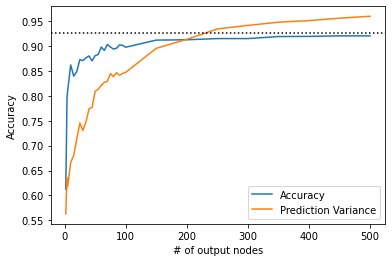

In [14]:
import matplotlib.pyplot as plt
#for i in range(len(results)):
#  print(results[i][0])
#  print(acc_list[i])
#  plt.plot(results[i][0], acc_list[i])
#plt.plot(results[i][0], var_list[i])

line1=plt.plot(component_list, component_acc)
line2 = plt.plot(component_list, component_var)
#line2=plt.plot(component_list, var_list)
plt.axhline(y=0.925, color = 'k', linestyle = ':')
plt.xlabel("# of output nodes")
plt.ylabel("Accuracy")
plt.legend((line1[0], line2[0]), ('Accuracy', 'Prediction Variance'))
#plt.legend((line1[0]), ('Accuracy'))
plt.show()

In [16]:
#output to CSV file
ae_df = pd.DataFrame(list(zip(component_list, component_acc, component_var))
                      ,columns = ['Component', 'Accuracy', 'Prediction Variance'])
print(ae_df)
pd.DataFrame(ae_df).to_csv('AE_500_epochs_results.csv')

    Component  Accuracy  Prediction Variance
0           2  0.612695             0.562934
1           3  0.700950             0.603112
2           4  0.797013             0.635271
3           5  0.809572             0.617831
4          10  0.861847             0.666020
5          15  0.839443             0.680480
6          20  0.848608             0.713857
7          25  0.872709             0.745281
8          30  0.870672             0.730337
9          35  0.876103             0.747608
10         40  0.879837             0.773842
11         45  0.869993             0.776587
12         50  0.880516             0.808967
13         55  0.882892             0.813029
14         60  0.897828             0.820923
15         65  0.891039             0.827028
16         70  0.902919             0.828853
17         75  0.897828             0.844485
18         80  0.893754             0.838213
19         85  0.895451             0.846299
20         90  0.902240             0.841363
21        